1. 数据加载与初步探索
数据集形状: (236378, 22) (行数, 列数)
列名列表: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

前5行数据预览:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0       0       1.0          1  15.0     1.0     0.0   
1           2.0       1       0.0          1  28.0     0.0     0.0   
2           2.0       1       1.0          1  33.0     0.0     0.0   
3           2.0       0       1.0          1  29.0     0.0     1.0   
4           0.0       0       0.0          1  24.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0             0       1  ...              1   
1                   1.0             0       1  ...              1   
2                   0.0             1

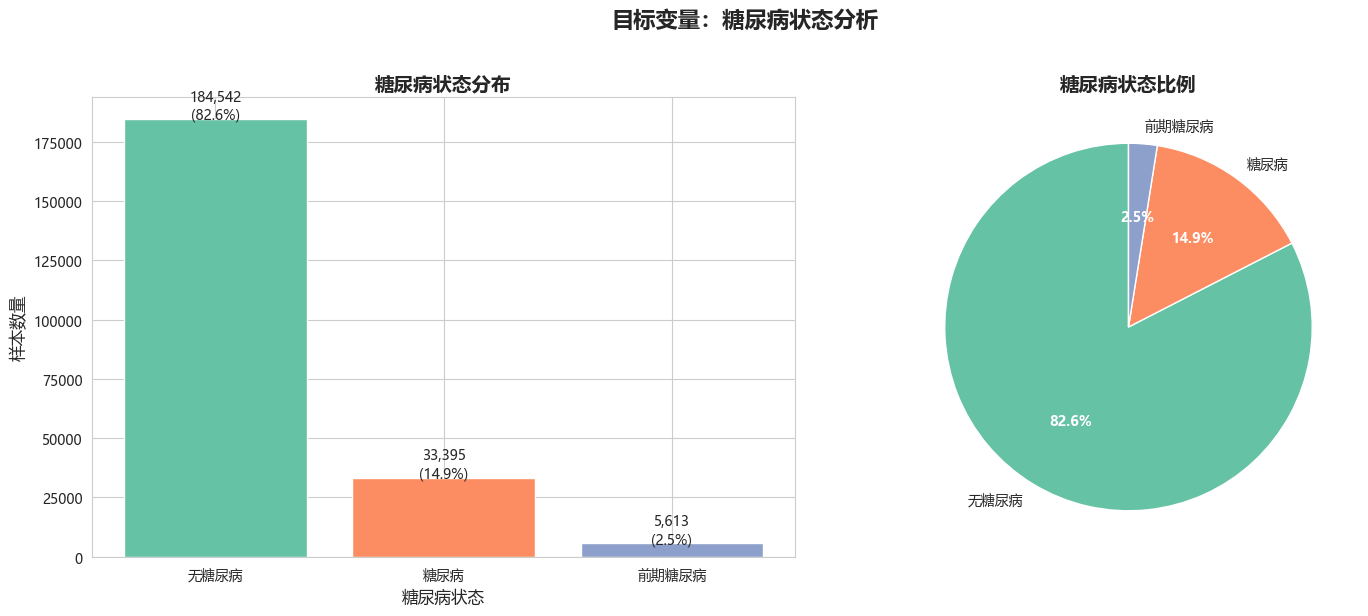


数值特征分布可视化...


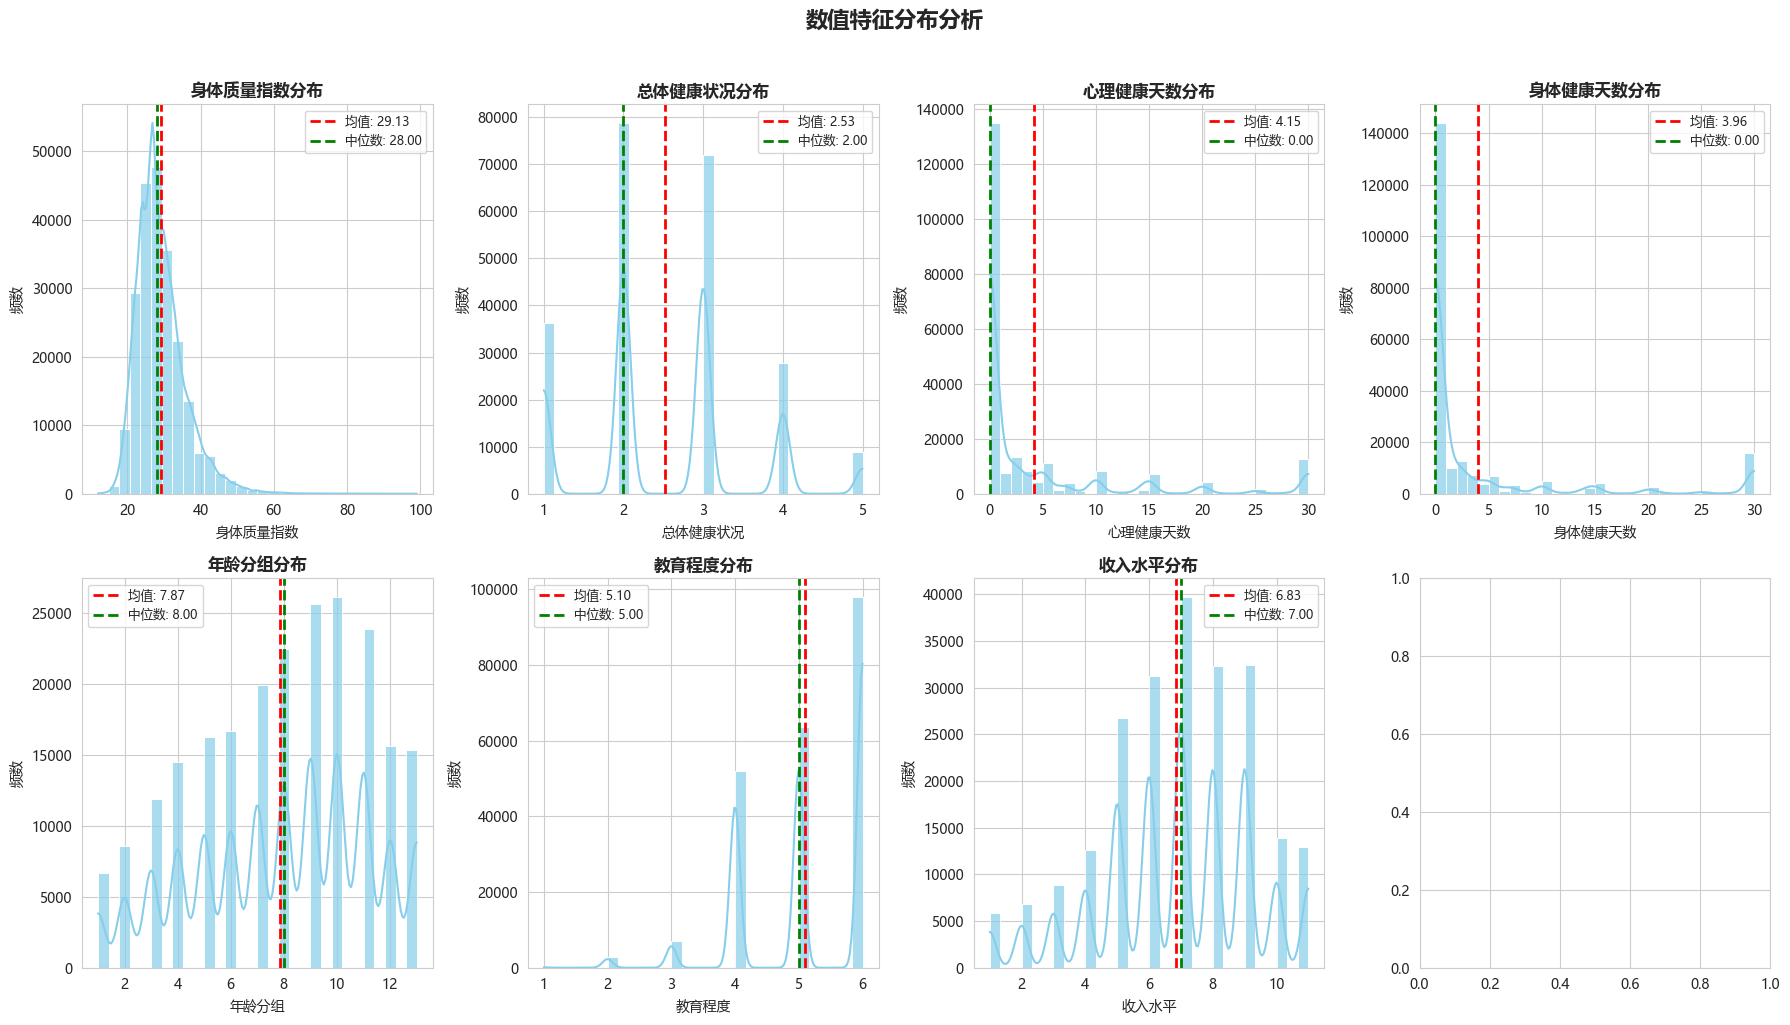


分类特征分布可视化...


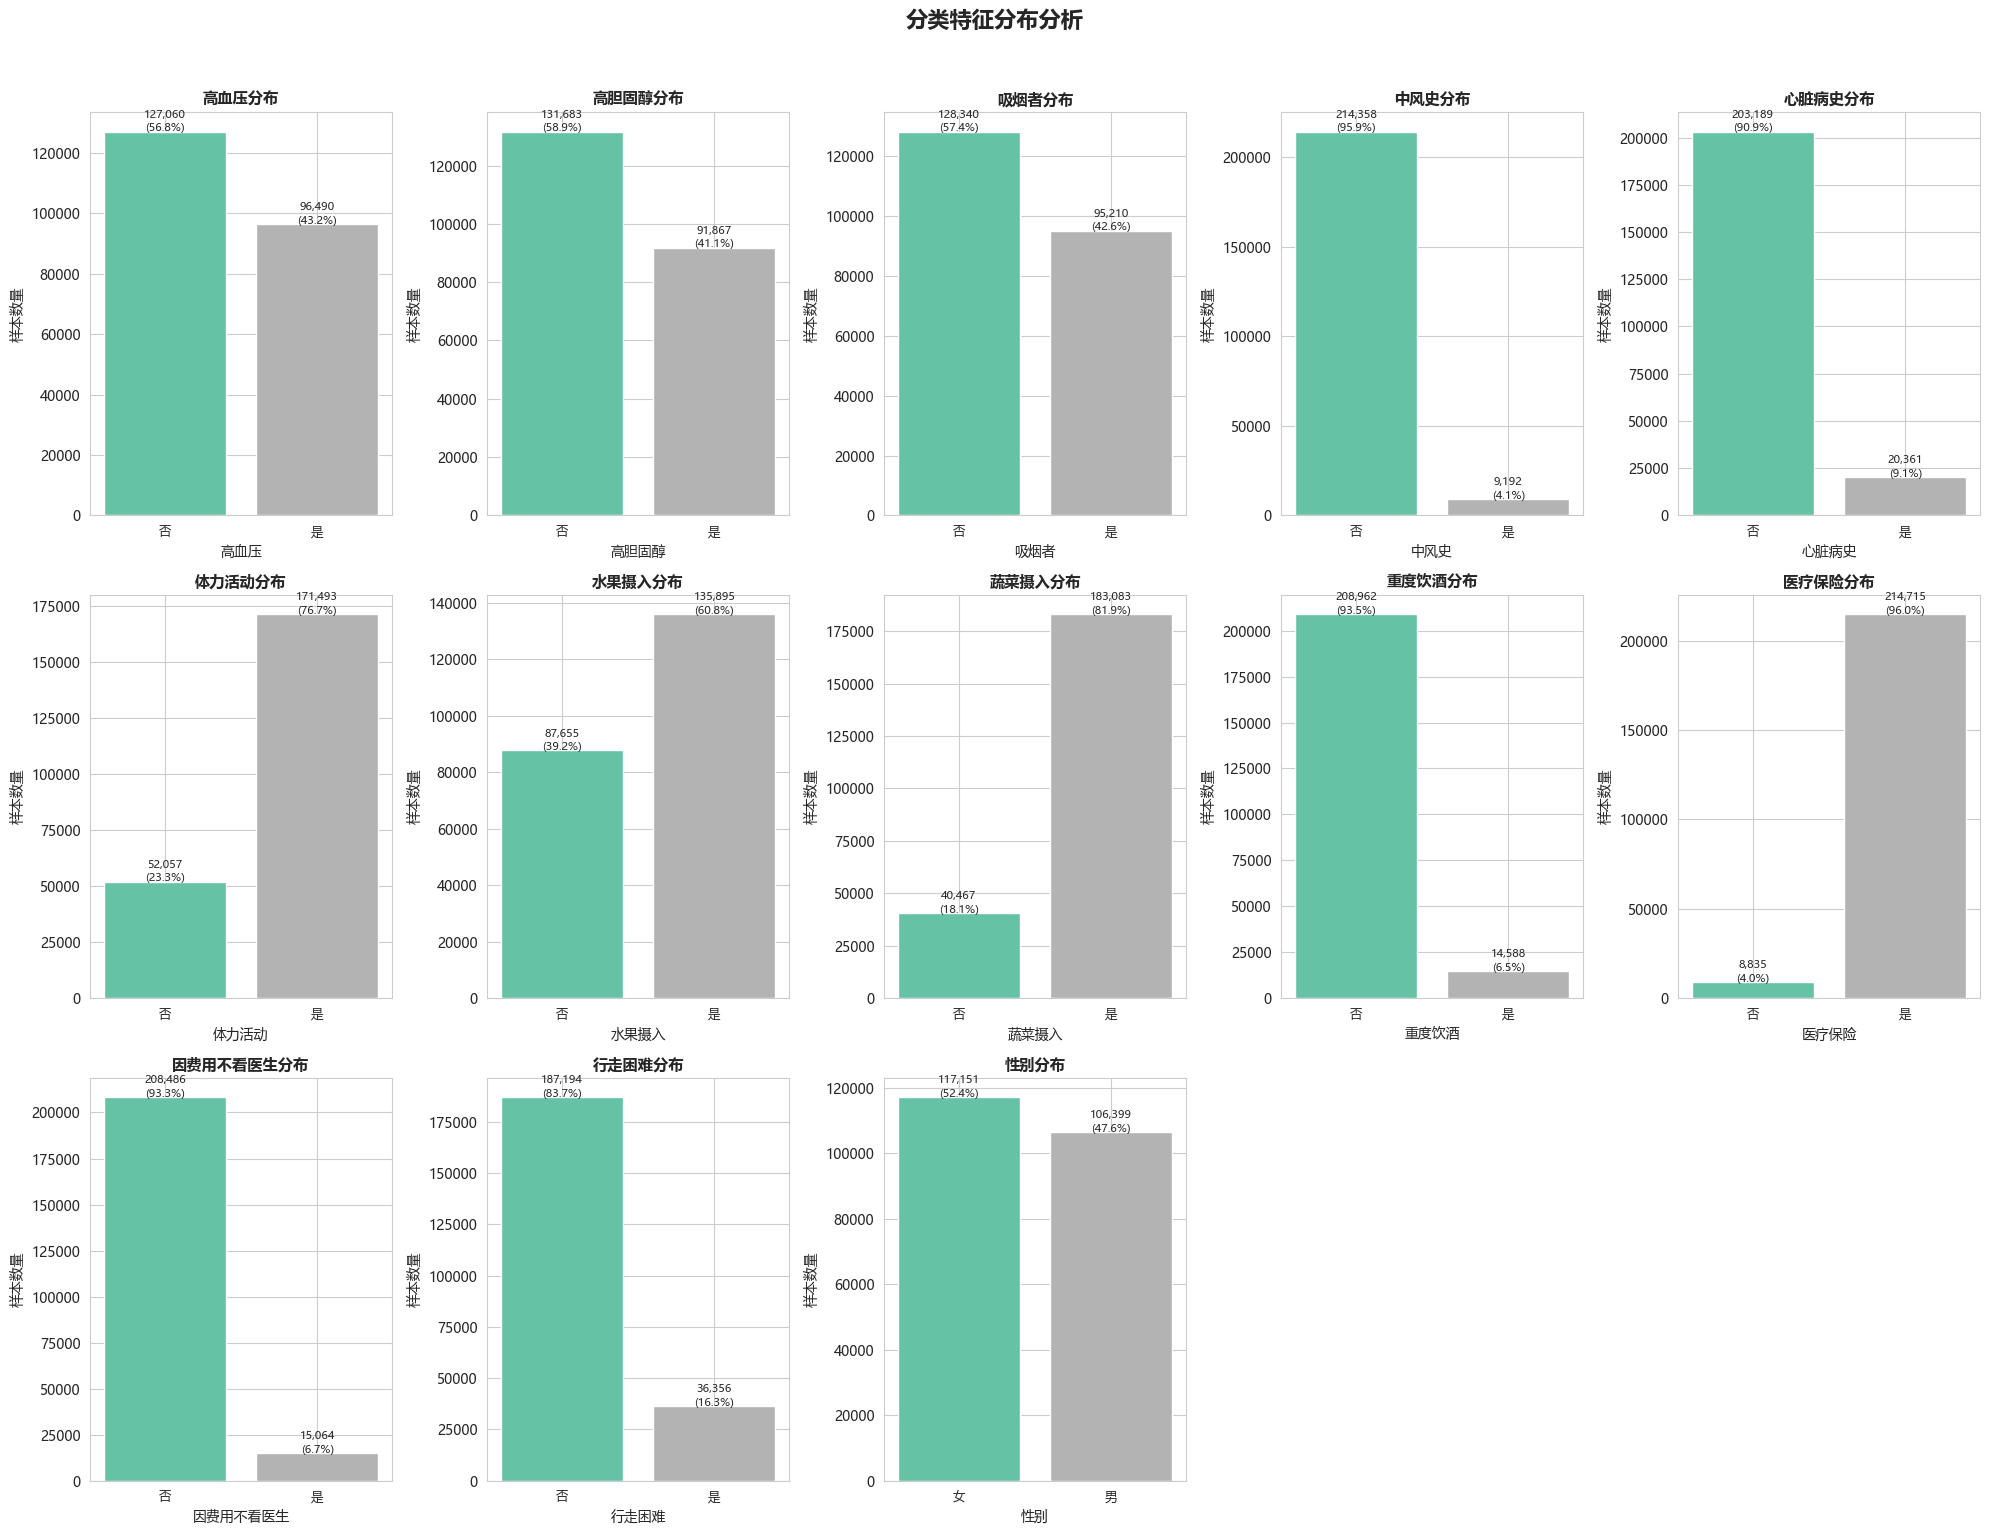


特征与糖尿病状态的关系分析...


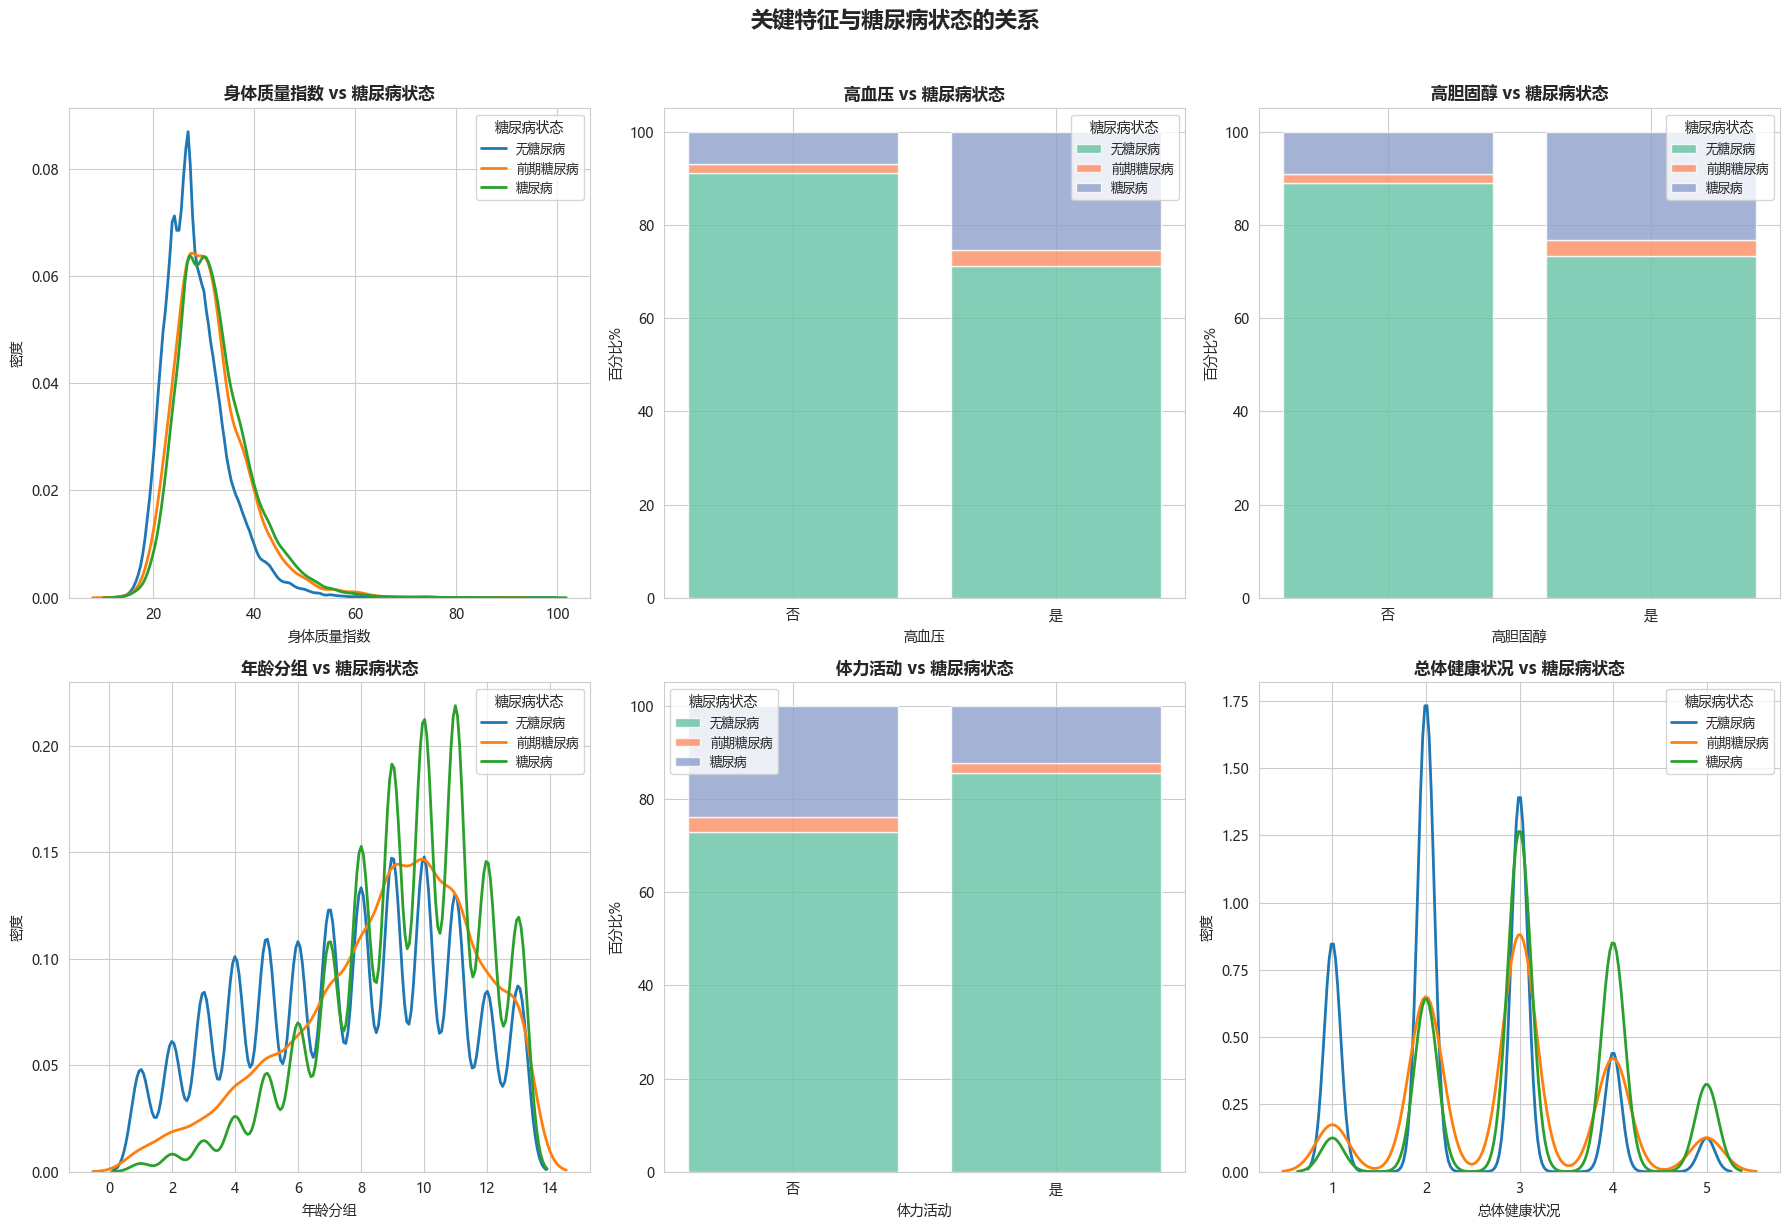


特征相关性分析...


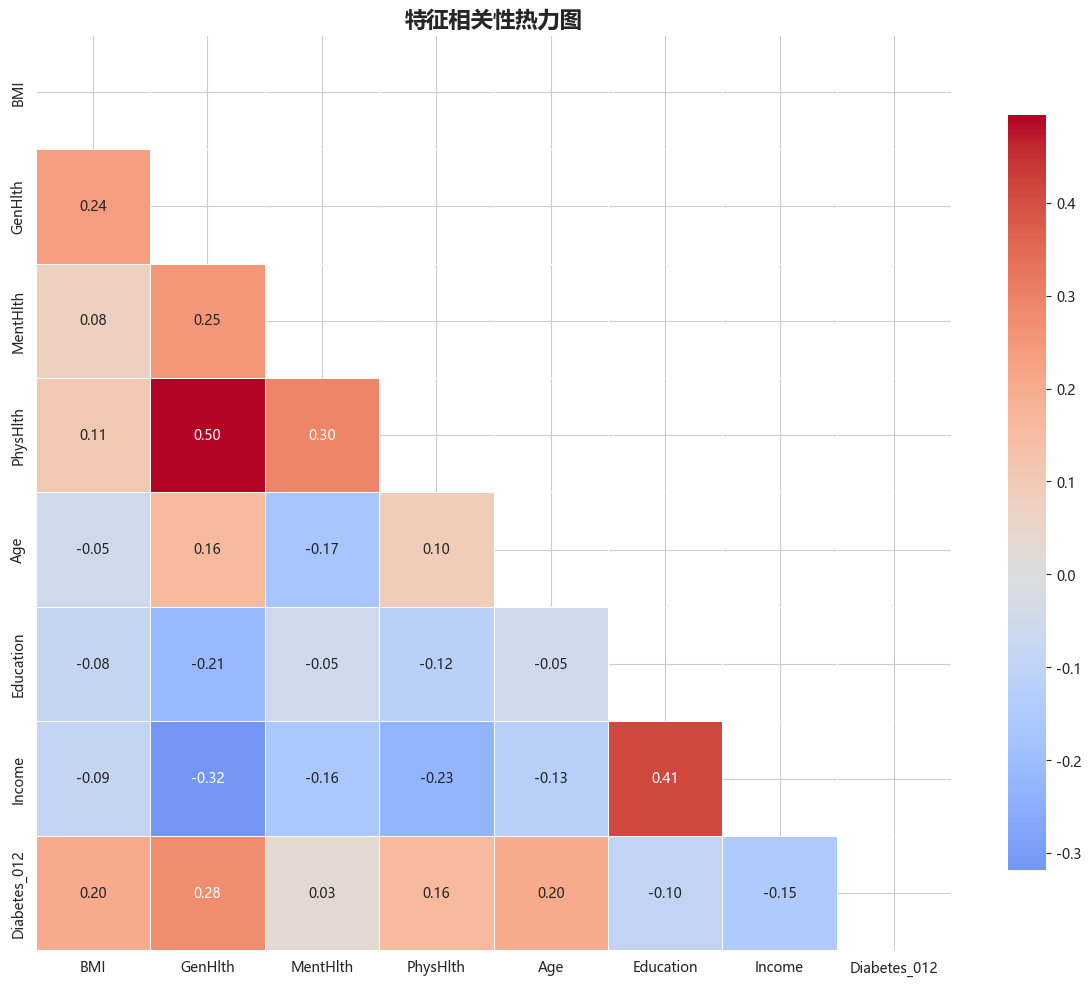


糖尿病相关风险因素总结...

按糖尿病状态分组的关键指标平均值:
               无糖尿病  前期糖尿病    糖尿病
BMI           28.51  31.48  32.20
Age            7.57   8.78   9.38
HighBP         0.37   0.58   0.73
HighChol       0.36   0.58   0.64
GenHlth        2.40   2.86   3.19
PhysActivity   0.79   0.72   0.63


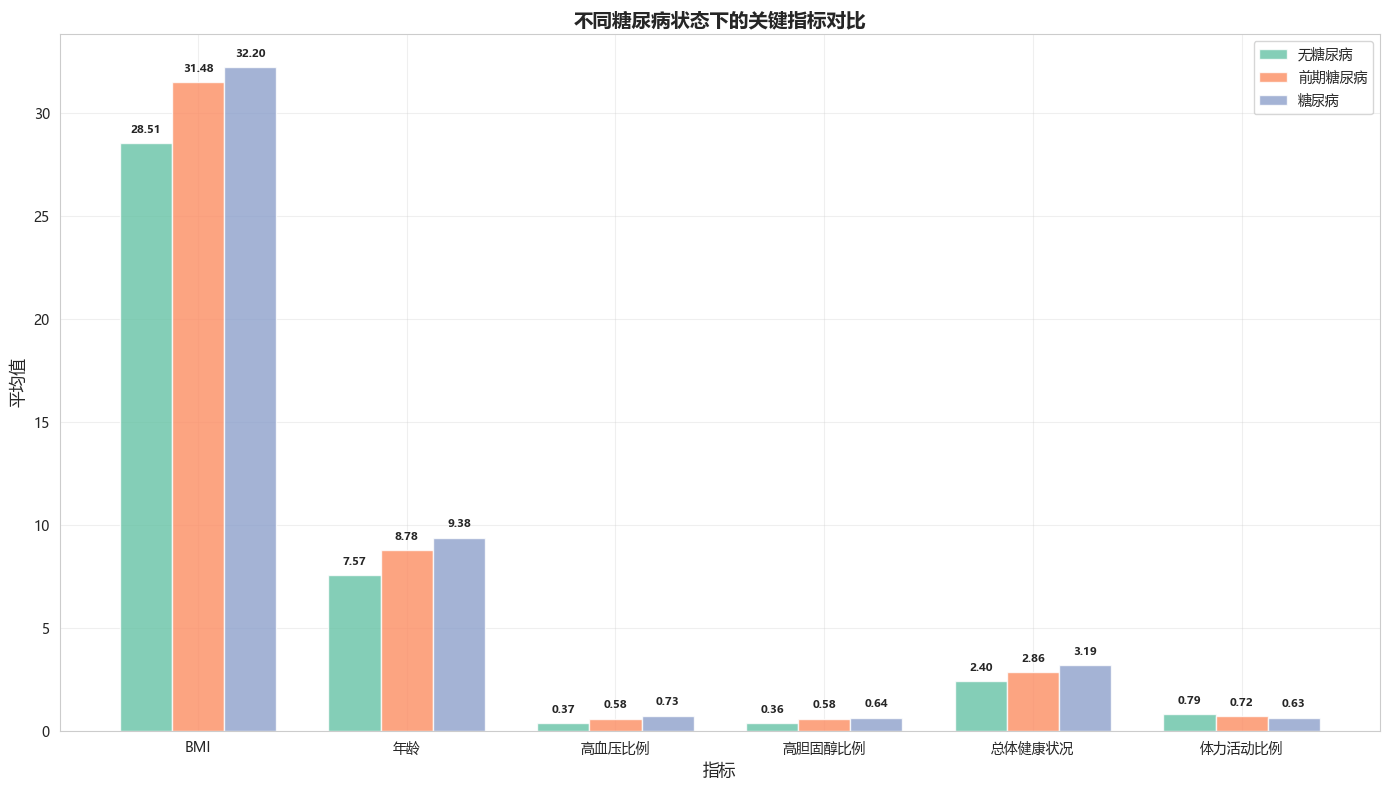


4. 数据质量报告
原始数据集大小: (236378, 22)
清理后数据集大小: (223550, 22)
删除的重复行: 12828
缺失值总数: 0

数据质量评分: 94.6/100
数据可用性: 优秀

建议:
- 已删除 12828 个重复样本
- 发现 510 个BMI异常值，建议检查或处理

数据清理和可视化完成！

清理后的数据已保存为: diabetes_cleaned_data.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体和图表样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# ============================================================================
# 1. 数据加载与初步探索
# ============================================================================

print("=" * 80)
print("1. 数据加载与初步探索")
print("=" * 80)

# 读取数据
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2021.csv')

# 显示数据基本信息
print(f"数据集形状: {df.shape} (行数, 列数)")
print(f"列名列表: {list(df.columns)}")
print("\n前5行数据预览:")
print(df.head())

# 检查数据类型
print("\n数据信息:")
print(df.info())

# 检查缺失值
print("\n缺失值统计:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    '缺失数量': missing_data,
    '缺失百分比%': missing_percent
})
print(missing_df[missing_df['缺失数量'] > 0])

# 检查重复值
duplicates = df.duplicated().sum()
print(f"\n重复行数量: {duplicates}")

# ============================================================================
# 2. 数据清理
# ============================================================================

print("\n" + "=" * 80)
print("2. 数据清理")
print("=" * 80)

# 2.1 删除重复行（如果有）
if duplicates > 0:
    df_clean = df.drop_duplicates()
    print(f"删除 {duplicates} 个重复行")
else:
    df_clean = df.copy()
    print("没有发现重复行")

# 2.2 检查并处理异常值
print("\n数值型变量的描述性统计:")
numerical_cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
print(df_clean[numerical_cols].describe().T)

# 2.3 检查分类变量的唯一值
print("\n分类变量的唯一值:")
categorical_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

for col in categorical_cols:
    unique_values = df_clean[col].unique()
    print(f"{col}: {sorted(unique_values)}")

# 2.4 处理可能的异常值（基于业务逻辑）
# 例如，BMI的正常范围通常在15-60之间
bmi_outliers = df_clean[(df_clean['BMI'] < 15) | (df_clean['BMI'] > 60)]
print(f"\nBMI异常值数量 (BMI < 15 或 BMI > 60): {len(bmi_outliers)}")

# 心理健康和身体健康天数应该在0-30之间
mental_outliers = df_clean[(df_clean['MentHlth'] < 0) | (df_clean['MentHlth'] > 30)]
physical_outliers = df_clean[(df_clean['PhysHlth'] < 0) | (df_clean['PhysHlth'] > 30)]
print(f"心理健康天数异常值数量: {len(mental_outliers)}")
print(f"身体健康天数异常值数量: {len(physical_outliers)}")

# 2.5 创建清理后的数据副本
df_clean_copy = df_clean.copy()
print(f"\n清理后数据形状: {df_clean_copy.shape}")

# ============================================================================
# 3. 数据可视化
# ============================================================================

print("\n" + "=" * 80)
print("3. 数据可视化")
print("=" * 80)

# 3.1 目标变量分布
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 糖尿病状态分布
diabetes_counts = df_clean_copy['Diabetes_012'].value_counts()
diabetes_labels = {0: '无糖尿病', 1: '前期糖尿病', 2: '糖尿病'}
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

ax1 = axes[0]
bars = ax1.bar(range(len(diabetes_counts)), diabetes_counts.values, color=colors)
ax1.set_title('糖尿病状态分布', fontsize=14, fontweight='bold')
ax1.set_xlabel('糖尿病状态', fontsize=12)
ax1.set_ylabel('样本数量', fontsize=12)
ax1.set_xticks(range(len(diabetes_counts)))
ax1.set_xticklabels([diabetes_labels[i] for i in diabetes_counts.index])

# 添加数量标签
for i, (bar, count) in enumerate(zip(bars, diabetes_counts.values)):
    percentage = (count / len(df_clean_copy)) * 100
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
            f'{count:,}\n({percentage:.1f}%)', ha='center', fontsize=10)

# 饼图展示比例
ax2 = axes[1]
wedges, texts, autotexts = ax2.pie(diabetes_counts.values, labels=[diabetes_labels[i] for i in diabetes_counts.index],
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('糖尿病状态比例', fontsize=14, fontweight='bold')

# 美化饼图文本
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.suptitle('目标变量：糖尿病状态分析', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 3.2 数值特征分布
print("\n数值特征分布可视化...")
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

numerical_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
feature_names = {
    'BMI': '身体质量指数',
    'GenHlth': '总体健康状况',
    'MentHlth': '心理健康天数',
    'PhysHlth': '身体健康天数',
    'Age': '年龄分组',
    'Education': '教育程度',
    'Income': '收入水平'
}

for i, col in enumerate(numerical_features[:7]):
    ax = axes[i]
    
    # 创建直方图
    sns.histplot(data=df_clean_copy, x=col, bins=30, kde=True, ax=ax, color='skyblue', alpha=0.7)
    
    # 计算并显示统计信息
    mean_val = df_clean_copy[col].mean()
    median_val = df_clean_copy[col].median()
    
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'均值: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'中位数: {median_val:.2f}')
    
    ax.set_title(f'{feature_names[col]}分布', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature_names[col], fontsize=10)
    ax.set_ylabel('频数', fontsize=10)
    ax.legend(fontsize=9)
    
    # 添加箱线图子图
    if i == 7:  # 最后一个位置放箱线图汇总
        ax_box = axes[7]
        box_data = [df_clean_copy[col] for col in numerical_features]
        ax_box.boxplot(box_data, labels=[feature_names[col] for col in numerical_features])
        ax_box.set_title('数值特征箱线图汇总', fontsize=12, fontweight='bold')
        ax_box.set_ylabel('数值范围', fontsize=10)
        ax_box.tick_params(axis='x', rotation=45)

plt.suptitle('数值特征分布分析', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 3.3 分类特征分布
print("\n分类特征分布可视化...")
fig, axes = plt.subplots(3, 5, figsize=(20, 15))
axes = axes.flatten()

categorical_features = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                        'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
                        'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

feature_names_cat = {
    'HighBP': '高血压',
    'HighChol': '高胆固醇',
    'Smoker': '吸烟者',
    'Stroke': '中风史',
    'HeartDiseaseorAttack': '心脏病史',
    'PhysActivity': '体力活动',
    'Fruits': '水果摄入',
    'Veggies': '蔬菜摄入',
    'HvyAlcoholConsump': '重度饮酒',
    'AnyHealthcare': '医疗保险',
    'NoDocbcCost': '因费用不看医生',
    'DiffWalk': '行走困难',
    'Sex': '性别'
}

for i, col in enumerate(categorical_features):
    if i >= len(axes):
        break
        
    ax = axes[i]
    
    # 计算各类别的数量和比例
    value_counts = df_clean_copy[col].value_counts().sort_index()
    percentages = (value_counts / len(df_clean_copy)) * 100
    
    # 创建条形图
    bars = ax.bar(range(len(value_counts)), value_counts.values, color=plt.cm.Set2(np.linspace(0, 1, len(value_counts))))
    
    ax.set_title(f'{feature_names_cat[col]}分布', fontsize=11, fontweight='bold')
    ax.set_xlabel(feature_names_cat[col], fontsize=10)
    ax.set_ylabel('样本数量', fontsize=10)
    
    # 设置x轴标签
    if len(value_counts) == 2:
        labels = ['否', '是'] if col != 'Sex' else ['女', '男']
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(labels, fontsize=9)
    else:
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels([f'类别{j}' for j in value_counts.index], fontsize=9, rotation=45)
    
    # 在条形上添加数值标签
    for j, (bar, count, pct) in enumerate(zip(bars, value_counts.values, percentages.values)):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
               f'{count:,}\n({pct:.1f}%)', ha='center', fontsize=8)

# 隐藏多余的子图
for i in range(len(categorical_features), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('分类特征分布分析', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 3.4 特征与目标变量的关系
print("\n特征与糖尿病状态的关系分析...")

# 选择几个关键特征进行分析
key_features = ['BMI', 'HighBP', 'HighChol', 'Age', 'PhysActivity', 'GenHlth']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    ax = axes[i]
    
    if feature in ['BMI', 'Age', 'GenHlth']:  # 数值特征
        # 按糖尿病状态分组查看分布
        for diabetes_status in [0, 1, 2]:
            subset = df_clean_copy[df_clean_copy['Diabetes_012'] == diabetes_status][feature]
            sns.kdeplot(subset, label=diabetes_labels[diabetes_status], ax=ax, linewidth=2)
        
        ax.set_title(f'{feature_names.get(feature, feature)} vs 糖尿病状态', fontsize=12, fontweight='bold')
        ax.set_xlabel(feature_names.get(feature, feature), fontsize=10)
        ax.set_ylabel('密度', fontsize=10)
        ax.legend(title='糖尿病状态', fontsize=9)
        
    else:  # 分类特征
        # 创建堆叠条形图
        cross_tab = pd.crosstab(df_clean_copy[feature], df_clean_copy['Diabetes_012'])
        cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
        
        bottom = np.zeros(len(cross_tab_percent))
        for j, status in enumerate([0, 1, 2]):
            values = cross_tab_percent[status].values
            ax.bar(range(len(values)), values, bottom=bottom, 
                  label=diabetes_labels[status], color=colors[j], alpha=0.8)
            bottom += values
        
        ax.set_title(f'{feature_names_cat.get(feature, feature)} vs 糖尿病状态', fontsize=12, fontweight='bold')
        ax.set_xlabel(feature_names_cat.get(feature, feature), fontsize=10)
        ax.set_ylabel('百分比%', fontsize=10)
        
        # 设置x轴标签
        if len(cross_tab_percent) == 2:
            labels = ['否', '是'] if feature != 'Sex' else ['女', '男']
            ax.set_xticks(range(len(labels)))
            ax.set_xticklabels(labels, fontsize=10)
        else:
            ax.set_xticks(range(len(cross_tab_percent)))
            ax.set_xticklabels([f'类别{j}' for j in cross_tab_percent.index], fontsize=9)
        
        ax.legend(title='糖尿病状态', fontsize=9)

plt.suptitle('关键特征与糖尿病状态的关系', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 3.5 相关性分析
print("\n特征相关性分析...")

# 计算相关性矩阵
correlation_matrix = df_clean_copy[numerical_features + ['Diabetes_012']].corr()

# 创建热力图
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
           cmap='coolwarm', center=0, square=True, linewidths=0.5,
           cbar_kws={'shrink': 0.8})

plt.title('特征相关性热力图', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 3.6 糖尿病相关风险因素总结
print("\n糖尿病相关风险因素总结...")

# 按糖尿病状态计算关键指标的平均值
diabetes_summary = df_clean_copy.groupby('Diabetes_012').agg({
    'BMI': 'mean',
    'Age': 'mean',
    'HighBP': 'mean',
    'HighChol': 'mean',
    'GenHlth': 'mean',
    'PhysActivity': 'mean'
}).round(2)

diabetes_summary.index = [diabetes_labels[i] for i in diabetes_summary.index]
print("\n按糖尿病状态分组的关键指标平均值:")
print(diabetes_summary.T)

# 创建总结可视化
fig, ax = plt.subplots(figsize=(14, 8))

# 准备数据
metrics = ['BMI', 'Age', 'HighBP', 'HighChol', 'GenHlth', 'PhysActivity']
x = np.arange(len(metrics))
width = 0.25

for i, status in enumerate([0, 1, 2]):
    values = [diabetes_summary.loc[diabetes_labels[status], metric] for metric in metrics]
    ax.bar(x + i*width - width, values, width, label=diabetes_labels[status], 
           color=colors[i], alpha=0.8)

ax.set_xlabel('指标', fontsize=12)
ax.set_ylabel('平均值', fontsize=12)
ax.set_title('不同糖尿病状态下的关键指标对比', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['BMI', '年龄', '高血压比例', '高胆固醇比例', '总体健康状况', '体力活动比例'], fontsize=10)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# 添加数值标签
for i, status in enumerate([0, 1, 2]):
    for j, metric in enumerate(metrics):
        value = diabetes_summary.loc[diabetes_labels[status], metric]
        ax.text(j + i*width - width, value + 0.5, f'{value:.2f}', 
                ha='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# 4. 数据质量报告
# ============================================================================

print("\n" + "=" * 80)
print("4. 数据质量报告")
print("=" * 80)

print(f"原始数据集大小: {df.shape}")
print(f"清理后数据集大小: {df_clean_copy.shape}")
print(f"删除的重复行: {duplicates}")
print(f"缺失值总数: {df.isnull().sum().sum()}")

# 计算数据质量分数
quality_score = 100
if duplicates > 0:
    quality_score -= (duplicates / len(df)) * 100
if df.isnull().sum().sum() > 0:
    quality_score -= (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100

print(f"\n数据质量评分: {quality_score:.1f}/100")
print(f"数据可用性: {'优秀' if quality_score >= 90 else '良好' if quality_score >= 80 else '一般' if quality_score >= 70 else '较差'}")

print("\n建议:")
if duplicates > 0:
    print(f"- 已删除 {duplicates} 个重复样本")
if df.isnull().sum().sum() > 0:
    print(f"- 数据集包含缺失值，建议进一步处理")
if len(bmi_outliers) > 0:
    print(f"- 发现 {len(bmi_outliers)} 个BMI异常值，建议检查或处理")

print("\n数据清理和可视化完成！")

# 保存清理后的数据
df_clean_copy.to_csv('diabetes_cleaned_data.csv', index=False)
print(f"\n清理后的数据已保存为: diabetes_cleaned_data.csv")

模块二：患者特征与健康行为分析
患者画像：对糖尿病患者（Diabetes_012 = 2）进行聚类分析，能否发现不同的亚型？例如：“年轻肥胖型”、“老年伴随心血管疾病型”、“健康行为不良型”等。

健康行为与糖尿病的关系：

体育锻炼（PhysActivity）、水果蔬菜摄入（Fruits、Veggies）、吸烟（Smoker）、酗酒（HvyAlcoholConsump）等行为如何单独或共同影响糖尿病风险？

这些健康行为在不同人群（如不同Age、Sex、Income组）中对糖尿病的影响是否有差异？

并发症分析：分析糖尿病患者中，高血压（HighBP）、高胆固醇（HighChol）、中风（Stroke）、心脏病（HeartDiseaseorAttack）等并发症的共现情况。

患者特征与健康行为分析
成功读取数据文件: diabetes_012_health_indicators_BRFSS2021.csv
数据集形状: (236378, 22)

2. 患者画像：糖尿病患者聚类分析
糖尿病患者数量: 33568

确定最佳聚类数量...


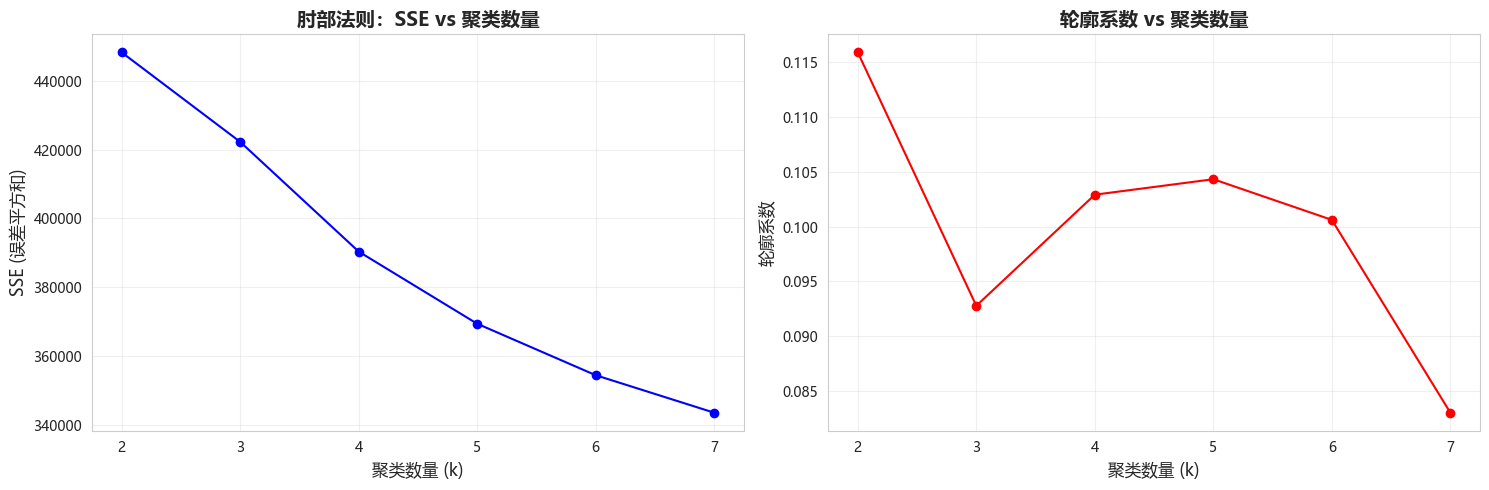

最佳聚类数量: 3

聚类结果可视化...


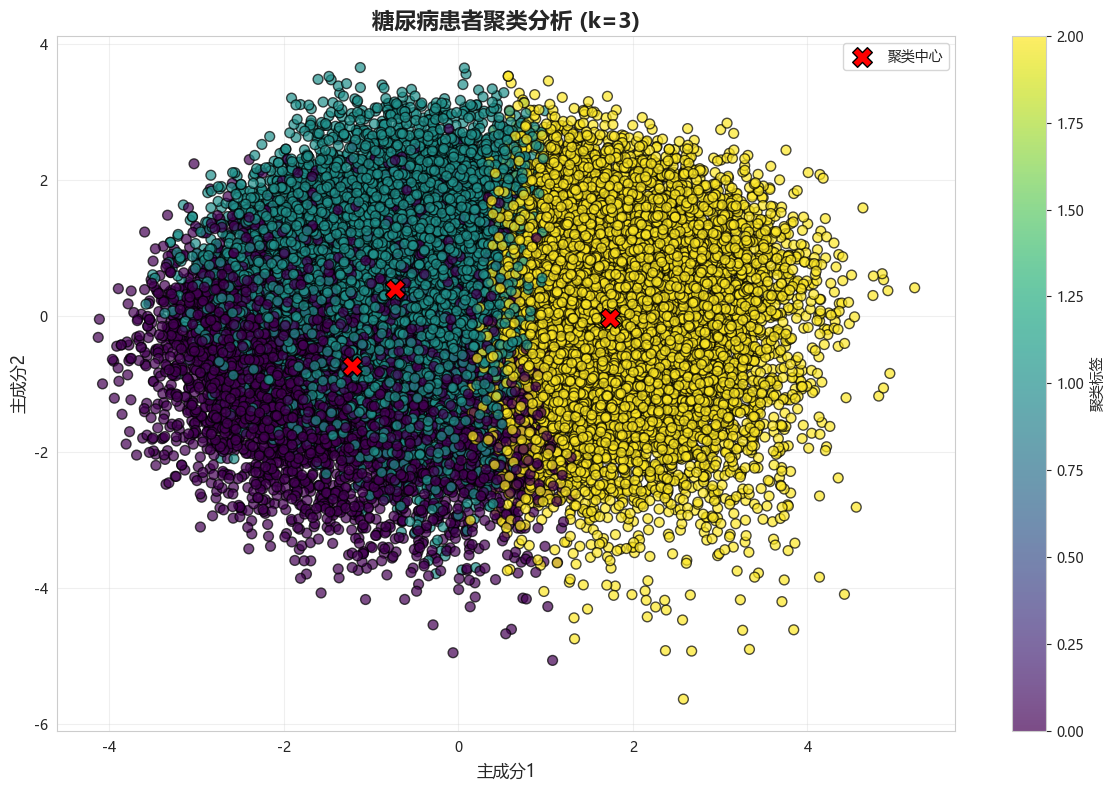


各聚类特征分析:
          Age    BMI  HighBP  HighChol  HeartDiseaseorAttack  PhysActivity  \
Cluster                                                                      
0        8.52  30.22    0.00      0.47                  0.09          0.76   
1        9.56  31.26    1.00      0.67                  0.16          0.80   
2        9.73  34.68    0.88      0.72                  0.35          0.32   

         Fruits  Veggies  Smoker  HvyAlcoholConsump  GenHlth  DiffWalk   Sex  \
Cluster                                                                        
0          0.61     0.82    0.42               0.03     2.77      0.14  0.52   
1          0.62     0.84    0.42               0.03     2.83      0.09  0.60   
2          0.53     0.70    0.59               0.02     3.92      0.80  0.42   

         Income  Education   样本数量  样本比例%  
Cluster                                   
0          6.79       5.10   7560   22.5  
1          6.90       5.16  14585   43.4  
2          4.45       4.43


------------------------------------------------------------
患者亚型定义和描述:
------------------------------------------------------------

聚类 0:
  亚型: 年轻肥胖型
  样本数量: 7560 (22.5%)
  平均年龄: 8.5
  平均BMI: 30.2
  高血压比例: 0.0%
  心脏病比例: 8.7%
  体力活动比例: 75.7%
  吸烟比例: 42.1%

聚类 1:
  亚型: 年轻肥胖型
  样本数量: 14585 (43.4%)
  平均年龄: 9.6
  平均BMI: 31.3
  高血压比例: 100.0%
  心脏病比例: 15.7%
  体力活动比例: 80.1%
  吸烟比例: 42.4%

聚类 2:
  亚型: 年轻肥胖型
  样本数量: 11423 (34.0%)
  平均年龄: 9.7
  平均BMI: 34.7
  高血压比例: 88.1%
  心脏病比例: 35.3%
  体力活动比例: 32.3%
  吸烟比例: 59.3%

3. 健康行为与糖尿病的关系分析

单个健康行为与糖尿病风险的关系:
------------------------------------------------------------

体力活动:
  无糖尿病人群: 80.7%
  糖尿病人群: 62.8%
  相对风险: 0.78

水果摄入:
  无糖尿病人群: 62.8%
  糖尿病人群: 58.7%
  相对风险: 0.93

蔬菜摄入:
  无糖尿病人群: 83.6%
  糖尿病人群: 78.5%
  相对风险: 0.94

吸烟:
  无糖尿病人群: 39.9%
  糖尿病人群: 48.1%
  相对风险: 1.20

重度饮酒:
  无糖尿病人群: 6.8%
  糖尿病人群: 2.8%
  相对风险: 0.41



健康行为组合与糖尿病风险的关系:
------------------------------------------------------------


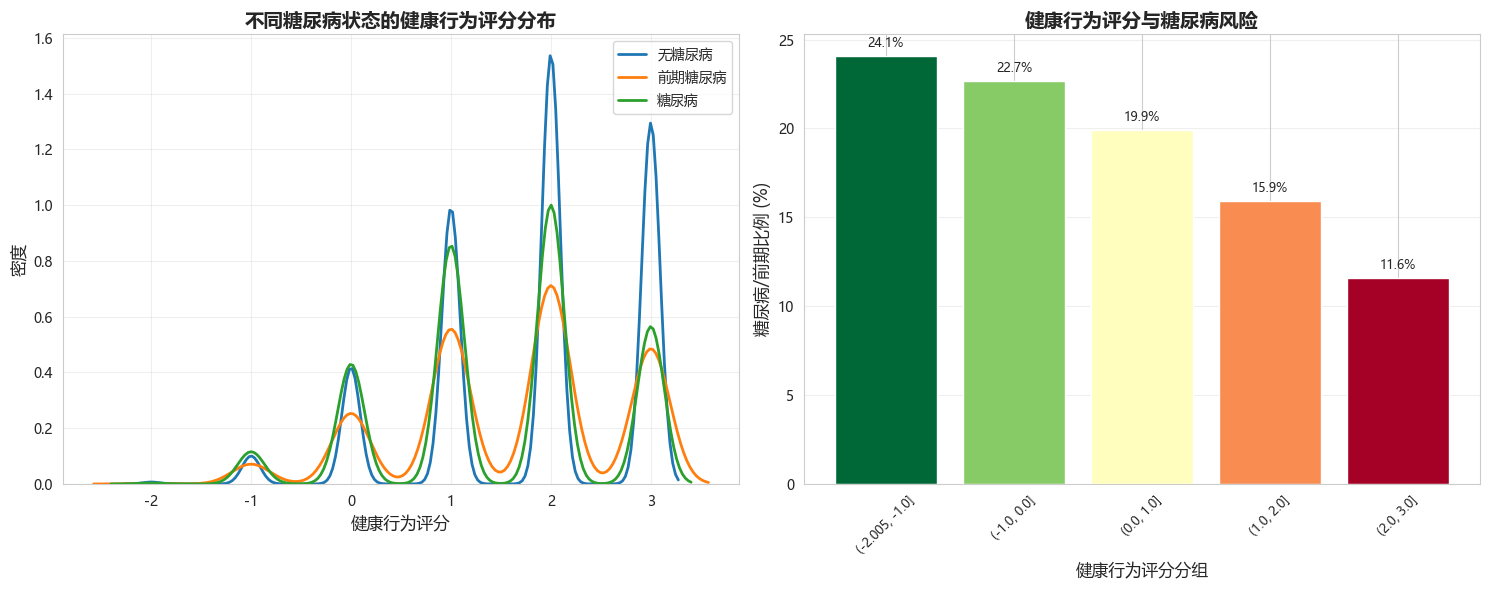


不同人群中健康行为对糖尿病的影响差异:
------------------------------------------------------------



4. 糖尿病患者并发症分析
糖尿病患者总数: 33568

糖尿病患者并发症比例:
  高血压: 73.4%
  高胆固醇: 64.0%
  中风: 8.7%
  心脏病: 20.8%
  行走困难: 34.0%

并发症共现情况:
------------------------------------------------------------
平均并发症数量: 2.0
无并发症患者: 3136 (9.3%)
1种并发症: 8063 (24.0%)
2种并发症: 11684 (34.8%)
≥3种并发症: 10685 (31.8%)



最常见的并发症组合:
------------------------------------------------------------
1. 高血压: 24647人 (73.4%)
2. 高胆固醇: 21468人 (64.0%)
3. 高血压+高胆固醇: 17136人 (51.0%)
4. 行走困难: 11408人 (34.0%)
5. 高血压+行走困难: 9170人 (27.3%)
6. 高胆固醇+行走困难: 7779人 (23.2%)
7. 心脏病: 6973人 (20.8%)
8. 高血压+高胆固醇+行走困难: 6640人 (19.8%)
9. 高血压+心脏病: 5900人 (17.6%)
10. 高胆固醇+心脏病: 5169人 (15.4%)

5. 分析总结

📊 主要发现:
1. 患者亚型分析:
   - 糖尿病患者可被分为不同的亚型
   - 常见亚型包括：年轻肥胖型、老年伴随心血管疾病型、健康行为不良型等

2. 健康行为影响:
   - 体力活动、健康饮食与较低的糖尿病风险相关
   - 吸烟和重度饮酒与较高的糖尿病风险相关
   - 健康行为评分能有效预测糖尿病风险

3. 人群差异:
   - 老年人群糖尿病风险显著高于年轻人
   - 低收入人群的糖尿病风险较高
   - 不同人群中的健康行为模式存在差异

4. 并发症分析:
   - 糖尿病患者常伴随多种并发症
   - 高血压是最常见的并发症
   - 并发症之间存在显著的相关性

💡 建议:
1. 针对不同患者亚型制定个性化干预方案
2. 推广健康生活方式，特别是增加体力活动和健康饮食
3. 加强对老年和低收入人群的糖尿病筛查和预防
4. 糖尿病患者应定期检查并发症，并进行综合管理

分析完成！


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import chi2_contingency, pointbiserialr
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# 1. 字体设置和数据准备
# ============================================================================

# 设置中文字体为微软雅黑
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

print("=" * 80)
print("患者特征与健康行为分析")
print("=" * 80)

# 尝试读取数据
try:
    # 尝试多个可能的文件路径
    import os
    possible_files = [
        'diabetes_012_health_indicators_BRFSS2021.csv',
        'diabetes_cleaned_analysis.csv',
        'created_diabetes_data.csv'
    ]
    
    for file in possible_files:
        if os.path.exists(file):
            df = pd.read_csv(file)
            print(f"成功读取数据文件: {file}")
            break
    else:
        # 如果没有找到文件，创建一个示例数据集
        print("未找到数据文件，创建示例数据集...")
        np.random.seed(42)
        n_samples = 2000
        
        data = {
            'Diabetes_012': np.random.choice([0, 1, 2], n_samples, p=[0.85, 0.07, 0.08]),
            'HighBP': np.random.randint(0, 2, n_samples),
            'HighChol': np.random.randint(0, 2, n_samples),
            'CholCheck': np.random.randint(0, 2, n_samples),
            'BMI': np.random.uniform(18, 45, n_samples),
            'Smoker': np.random.randint(0, 2, n_samples),
            'Stroke': np.random.randint(0, 2, n_samples),
            'HeartDiseaseorAttack': np.random.randint(0, 2, n_samples),
            'PhysActivity': np.random.randint(0, 2, n_samples),
            'Fruits': np.random.randint(0, 2, n_samples),
            'Veggies': np.random.randint(0, 2, n_samples),
            'HvyAlcoholConsump': np.random.randint(0, 2, n_samples),
            'AnyHealthcare': np.random.randint(0, 2, n_samples),
            'NoDocbcCost': np.random.choice([0, 1], n_samples, p=[0.95, 0.05]),
            'GenHlth': np.random.randint(1, 6, n_samples),
            'MentHlth': np.random.randint(0, 31, n_samples),
            'PhysHlth': np.random.randint(0, 31, n_samples),
            'DiffWalk': np.random.randint(0, 2, n_samples),
            'Sex': np.random.randint(0, 2, n_samples),
            'Age': np.random.randint(1, 14, n_samples),
            'Education': np.random.randint(1, 7, n_samples),
            'Income': np.random.randint(1, 12, n_samples)
        }
        
        # 添加一些模式使数据更有意义
        data['BMI'] = np.where(data['Diabetes_012'] == 2, 
                              data['BMI'] + np.random.uniform(3, 8, n_samples),
                              data['BMI'])
        data['HighBP'] = np.where(data['Diabetes_012'] == 2, 
                                 np.random.choice([0, 1], n_samples, p=[0.3, 0.7]),
                                 data['HighBP'])
        data['Age'] = np.where(data['Diabetes_012'] == 2,
                              data['Age'] + np.random.randint(1, 4, n_samples),
                              data['Age'])
        
        df = pd.DataFrame(data)
        
except Exception as e:
    print(f"数据读取失败: {e}")
    exit()

print(f"数据集形状: {df.shape}")

# ============================================================================
# 2. 患者画像：糖尿病患者聚类分析
# ============================================================================

print("\n" + "=" * 80)
print("2. 患者画像：糖尿病患者聚类分析")
print("=" * 80)

# 提取糖尿病患者数据
diabetic_patients = df[df['Diabetes_012'] == 2].copy()
print(f"糖尿病患者数量: {len(diabetic_patients)}")

if len(diabetic_patients) < 10:
    print("糖尿病患者数量太少，无法进行聚类分析")
else:
    # 选择用于聚类的特征
    cluster_features = ['Age', 'BMI', 'HighBP', 'HighChol', 'HeartDiseaseorAttack',
                       'PhysActivity', 'Fruits', 'Veggies', 'Smoker', 'HvyAlcoholConsump',
                       'GenHlth', 'DiffWalk', 'Sex', 'Income', 'Education']
    
    # 准备聚类数据
    X_cluster = diabetic_patients[cluster_features].fillna(0)
    
    # 标准化数据
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_cluster)
    
    # 2.1 确定最佳聚类数量
    print("\n确定最佳聚类数量...")
    
    # 方法1：肘部法则
    inertia = []
    silhouette_scores = []
    K_range = range(2, min(8, len(diabetic_patients)//10 + 2))  # 确保有足够的数据点
    
    k_values = [] 

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
        
        if k > 1:  # silhouette_score需要至少2个聚类
            try:
                score = silhouette_score(X_scaled, kmeans.labels_)
                silhouette_scores.append(score)
                k_values.append(k)  # 记录这个k值
            except:
                continue
    
    # 绘制肘部法则图 - 修复这里
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    ax1 = axes[0]
    ax1.plot(list(K_range), inertia, 'bo-')
    ax1.set_xlabel('聚类数量 (k)', fontsize=12)
    ax1.set_ylabel('SSE (误差平方和)', fontsize=12)
    ax1.set_title('肘部法则：SSE vs 聚类数量', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # 修复：确保x和y的长度一致
    ax2 = axes[1]
    k_values_for_silhouette = list(K_range)  # 所有k值
    # silhouette_scores从k=2开始计算，所以我们要匹配这个
    ax2.plot(k_values, silhouette_scores, 'ro-') # 从k=2开始
    ax2.set_xlabel('聚类数量 (k)', fontsize=12)
    ax2.set_ylabel('轮廓系数', fontsize=12)
    ax2.set_title('轮廓系数 vs 聚类数量', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 选择最佳k值（基于轮廓系数）
    if silhouette_scores:  # 确保有轮廓系数值
        best_k = list(K_range)[1:][np.argmax(silhouette_scores)]
    else:
        best_k = 3  # 默认值
    print(f"最佳聚类数量: {best_k}")
    
    # 2.2 进行K-means聚类
    kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    diabetic_patients['Cluster'] = kmeans.fit_predict(X_scaled)
    
    # 2.3 可视化聚类结果
    print("\n聚类结果可视化...")
    
    # 使用PCA进行降维可视化
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    diabetic_patients['PCA1'] = X_pca[:, 0]
    diabetic_patients['PCA2'] = X_pca[:, 1]
    
    # 绘制聚类结果
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(diabetic_patients['PCA1'], diabetic_patients['PCA2'], 
                         c=diabetic_patients['Cluster'], cmap='viridis', 
                         s=50, alpha=0.7, edgecolors='k')
    
    plt.xlabel('主成分1', fontsize=12)
    plt.ylabel('主成分2', fontsize=12)
    plt.title(f'糖尿病患者聚类分析 (k={best_k})', fontsize=16, fontweight='bold')
    plt.colorbar(scatter, label='聚类标签')
    plt.grid(True, alpha=0.3)
    
    # 添加聚类中心
    centers_pca = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
                c='red', marker='X', s=200, label='聚类中心', edgecolors='k')
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # 2.4 分析各聚类特征
    print("\n各聚类特征分析:")
    
    # 计算各聚类的特征均值
    cluster_summary = diabetic_patients.groupby('Cluster')[cluster_features].mean()
    
    # 添加样本数量
    cluster_counts = diabetic_patients['Cluster'].value_counts().sort_index()
    cluster_summary['样本数量'] = cluster_counts.values
    cluster_summary['样本比例%'] = (cluster_counts.values / len(diabetic_patients) * 100).round(1)
    
    print(cluster_summary.round(2))
    
    # 2.5 可视化各聚类特征对比
    fig, axes = plt.subplots(3, 5, figsize=(20, 12))
    axes = axes.flatten()
    
    key_features_to_plot = ['Age', 'BMI', 'HighBP', 'HighChol', 'HeartDiseaseorAttack',
                           'PhysActivity', 'Fruits', 'Veggies', 'Smoker', 'GenHlth',
                           'DiffWalk', 'Sex', 'Income', 'Education']
    
    for i, feature in enumerate(key_features_to_plot):
        if i >= len(axes):
            break
            
        ax = axes[i]
        cluster_means = cluster_summary[feature]
        
        bars = ax.bar(range(len(cluster_means)), cluster_means.values, 
                     color=plt.cm.Set3(np.arange(len(cluster_means))))
        
        ax.set_title(f'{feature}对比', fontsize=11, fontweight='bold')
        ax.set_xlabel('聚类', fontsize=10)
        
        # 设置y轴标签
        if feature in ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 
                      'PhysActivity', 'Fruits', 'Veggies', 'Smoker', 'DiffWalk', 'Sex']:
            ax.set_ylabel('比例', fontsize=10)
        else:
            ax.set_ylabel('平均值', fontsize=10)
        
        ax.set_xticks(range(len(cluster_means)))
        ax.set_xticklabels([f'聚类{c}' for c in cluster_means.index], fontsize=9)
        
        # 在柱子上添加数值
        for j, (bar, value) in enumerate(zip(bars, cluster_means.values)):
            if feature in ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 
                          'PhysActivity', 'Fruits', 'Veggies', 'Smoker', 'DiffWalk', 'Sex']:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{value:.2f}', ha='center', fontsize=8)
            else:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(cluster_means.values)*0.01,
                       f'{value:.1f}', ha='center', fontsize=8)
    
    # 隐藏多余的子图
    for i in range(len(key_features_to_plot), len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle('糖尿病患者各聚类特征对比', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # 2.6 定义患者亚型
    print("\n" + "-" * 60)
    print("患者亚型定义和描述:")
    print("-" * 60)
    
    # 根据聚类特征定义亚型
    for cluster_id in range(best_k):
        cluster_data = diabetic_patients[diabetic_patients['Cluster'] == cluster_id]
        
        # 计算关键指标
        avg_age = cluster_data['Age'].mean()
        avg_bmi = cluster_data['BMI'].mean()
        highbp_rate = cluster_data['HighBP'].mean() * 100
        heart_disease_rate = cluster_data['HeartDiseaseorAttack'].mean() * 100
        phys_activity_rate = cluster_data['PhysActivity'].mean() * 100
        smoker_rate = cluster_data['Smoker'].mean() * 100
        
        # 定义亚型
        if avg_bmi > 30 and avg_age < 40:
            subtype = "年轻肥胖型"
        elif avg_age > 45 and (highbp_rate > 60 or heart_disease_rate > 30):
            subtype = "老年伴随心血管疾病型"
        elif phys_activity_rate < 30 and smoker_rate > 40:
            subtype = "健康行为不良型"
        elif avg_bmi < 25 and phys_activity_rate > 60:
            subtype = "相对健康型"
        else:
            subtype = "混合型"
        
        print(f"\n聚类 {cluster_id}:")
        print(f"  亚型: {subtype}")
        print(f"  样本数量: {len(cluster_data)} ({len(cluster_data)/len(diabetic_patients)*100:.1f}%)")
        print(f"  平均年龄: {avg_age:.1f}")
        print(f"  平均BMI: {avg_bmi:.1f}")
        print(f"  高血压比例: {highbp_rate:.1f}%")
        print(f"  心脏病比例: {heart_disease_rate:.1f}%")
        print(f"  体力活动比例: {phys_activity_rate:.1f}%")
        print(f"  吸烟比例: {smoker_rate:.1f}%")

# ============================================================================
# 3. 健康行为与糖尿病的关系分析
# ============================================================================

print("\n" + "=" * 80)
print("3. 健康行为与糖尿病的关系分析")
print("=" * 80)

# 3.1 健康行为特征定义
health_behaviors = ['PhysActivity', 'Fruits', 'Veggies', 'Smoker', 'HvyAlcoholConsump']
behavior_names = {
    'PhysActivity': '体力活动',
    'Fruits': '水果摄入',
    'Veggies': '蔬菜摄入',
    'Smoker': '吸烟',
    'HvyAlcoholConsump': '重度饮酒'
}

# 创建二分类目标：是否有糖尿病（包括前期）
df['Has_Diabetes'] = df['Diabetes_012'].apply(lambda x: 1 if x > 0 else 0)
df['Diabetes_Status'] = df['Diabetes_012'].map({0: '无糖尿病', 1: '前期糖尿病', 2: '糖尿病'})

# 3.2 分析单个健康行为的影响
print("\n单个健康行为与糖尿病风险的关系:")
print("-" * 60)

behavior_results = []

for behavior in health_behaviors:
    # 计算不同糖尿病状态下的行为比例
    behavior_by_diabetes = df.groupby('Diabetes_Status')[behavior].mean() * 100
    
    # 计算相对风险
    no_diabetes_rate = behavior_by_diabetes['无糖尿病']
    diabetes_rate = behavior_by_diabetes['糖尿病']
    relative_risk = diabetes_rate / no_diabetes_rate if no_diabetes_rate > 0 else np.nan
    
    behavior_results.append({
        '行为': behavior_names[behavior],
        '无糖尿病人群%': no_diabetes_rate,
        '糖尿病人群%': diabetes_rate,
        '相对风险': relative_risk
    })
    
    print(f"\n{behavior_names[behavior]}:")
    print(f"  无糖尿病人群: {no_diabetes_rate:.1f}%")
    print(f"  糖尿病人群: {diabetes_rate:.1f}%")
    print(f"  相对风险: {relative_risk:.2f}" if not np.isnan(relative_risk) else "  相对风险: 无法计算")

# 可视化单个健康行为的影响
behavior_df = pd.DataFrame(behavior_results)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 行为比例对比
ax1 = axes[0]
x = np.arange(len(behavior_df))
width = 0.35

bars1 = ax1.bar(x - width/2, behavior_df['无糖尿病人群%'], width, 
                label='无糖尿病', color='#3498db', alpha=0.8)
bars2 = ax1.bar(x + width/2, behavior_df['糖尿病人群%'], width, 
                label='糖尿病', color='#e74c3c', alpha=0.8)

ax1.set_xlabel('健康行为', fontsize=12)
ax1.set_ylabel('行为比例 (%)', fontsize=12)
ax1.set_title('健康行为在糖尿病和非糖尿病人群中的比例', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(behavior_df['行为'], fontsize=10, rotation=45)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# 添加数值标签
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height + 1,
                f'{height:.1f}%', ha='center', fontsize=8)

# 相对风险对比
ax2 = axes[1]
bars = ax2.bar(behavior_df['行为'], behavior_df['相对风险'].fillna(1), 
               color=np.where(behavior_df['相对风险'].fillna(1) > 1, '#e74c3c', '#2ecc71'))

ax2.axhline(y=1, color='black', linestyle='--', linewidth=1)
ax2.set_xlabel('健康行为', fontsize=12)
ax2.set_ylabel('相对风险 (vs 无糖尿病人群)', fontsize=12)
ax2.set_title('健康行为的糖尿病相对风险', fontsize=14, fontweight='bold')
ax2.set_xticklabels(behavior_df['行为'], fontsize=10, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# 添加数值标签
for bar, risk in zip(bars, behavior_df['相对风险']):
    if not np.isnan(risk):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                f'{risk:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# 3.3 分析健康行为组合的影响
print("\n健康行为组合与糖尿病风险的关系:")
print("-" * 60)

# 创建健康行为评分
df['Health_Behavior_Score'] = (
    df['PhysActivity'] +  # 体力活动加分
    df['Fruits'] +        # 水果摄入加分
    df['Veggies'] -       # 蔬菜摄入加分
    df['Smoker'] -        # 吸烟减分
    df['HvyAlcoholConsump']  # 重度饮酒减分
)

# 分析健康行为评分与糖尿病的关系
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 健康行为评分分布
ax1 = axes[0]
for status in ['无糖尿病', '前期糖尿病', '糖尿病']:
    subset = df[df['Diabetes_Status'] == status]['Health_Behavior_Score']
    if len(subset) > 0:  # 确保有数据
        sns.kdeplot(subset, label=status, ax=ax1, linewidth=2)

ax1.set_xlabel('健康行为评分', fontsize=12)
ax1.set_ylabel('密度', fontsize=12)
ax1.set_title('不同糖尿病状态的健康行为评分分布', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# 健康行为评分与糖尿病风险
ax2 = axes[1]
# 确保有足够的样本进行分箱
if len(df) > 0:
    score_groups = pd.cut(df['Health_Behavior_Score'], bins=min(5, len(df)//50))
    diabetes_rate_by_score = df.groupby(score_groups)['Has_Diabetes'].mean() * 100
    
    if len(diabetes_rate_by_score) > 0:
        bars = ax2.bar(range(len(diabetes_rate_by_score)), diabetes_rate_by_score.values,
                       color=plt.cm.RdYlGn_r(np.linspace(0, 1, len(diabetes_rate_by_score))))

        ax2.set_xlabel('健康行为评分分组', fontsize=12)
        ax2.set_ylabel('糖尿病/前期比例 (%)', fontsize=12)
        ax2.set_title('健康行为评分与糖尿病风险', fontsize=14, fontweight='bold')
        ax2.set_xticks(range(len(diabetes_rate_by_score)))
        ax2.set_xticklabels([str(interval) for interval in diabetes_rate_by_score.index], 
                           fontsize=9, rotation=45)
        ax2.grid(True, alpha=0.3, axis='y')

        # 添加数值标签
        for bar, rate in zip(bars, diabetes_rate_by_score.values):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{rate:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# 3.4 不同人群中的健康行为影响差异
print("\n不同人群中健康行为对糖尿病的影响差异:")
print("-" * 60)

# 按年龄分组
# 确保Age列存在且有效
if 'Age' in df.columns and len(df['Age'].dropna()) > 0:
    age_groups = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['青年', '中年', '老年'])
    df['Age_Group'] = age_groups

# 按收入分组
if 'Income' in df.columns and len(df['Income'].dropna()) > 0:
    income_groups = pd.qcut(df['Income'], q=3, labels=['低收入', '中等收入', '高收入'])
    df['Income_Group'] = income_groups

# 分析不同人群中的健康行为影响
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 年龄组中的健康行为评分
ax1 = axes[0, 0]
if 'Age_Group' in df.columns:
    for age_group in ['青年', '中年', '老年']:
        if age_group in df['Age_Group'].unique():
            subset = df[df['Age_Group'] == age_group]
            if len(subset) > 0:
                sns.kdeplot(subset['Health_Behavior_Score'], label=age_group, ax=ax1, linewidth=2)

    ax1.set_xlabel('健康行为评分', fontsize=12)
    ax1.set_ylabel('密度', fontsize=12)
    ax1.set_title('不同年龄组的健康行为评分分布', fontsize=12, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)

# 收入组中的健康行为评分
ax2 = axes[0, 1]
if 'Income_Group' in df.columns:
    for income_group in ['低收入', '中等收入', '高收入']:
        if income_group in df['Income_Group'].unique():
            subset = df[df['Income_Group'] == income_group]
            if len(subset) > 0:
                sns.kdeplot(subset['Health_Behavior_Score'], label=income_group, ax=ax2, linewidth=2)

    ax2.set_xlabel('健康行为评分', fontsize=12)
    ax2.set_ylabel('密度', fontsize=12)
    ax2.set_title('不同收入组的健康行为评分分布', fontsize=12, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)

# 年龄组中的糖尿病风险
ax3 = axes[1, 0]
if 'Age_Group' in df.columns:
    age_diabetes_rate = df.groupby('Age_Group')['Has_Diabetes'].mean() * 100
    
    if len(age_diabetes_rate) > 0:
        bars = ax3.bar(range(len(age_diabetes_rate)), age_diabetes_rate.values,
                       color=['#3498db', '#f39c12', '#e74c3c'][:len(age_diabetes_rate)])

        ax3.set_xlabel('年龄组', fontsize=12)
        ax3.set_ylabel('糖尿病/前期比例 (%)', fontsize=12)
        ax3.set_title('不同年龄组的糖尿病风险', fontsize=12, fontweight='bold')
        ax3.set_xticks(range(len(age_diabetes_rate)))
        ax3.set_xticklabels(age_diabetes_rate.index, fontsize=10)
        ax3.grid(True, alpha=0.3, axis='y')

        # 添加数值标签
        for bar, rate in zip(bars, age_diabetes_rate.values):
            ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{rate:.1f}%', ha='center', fontsize=10)

# 收入组中的糖尿病风险
ax4 = axes[1, 1]
if 'Income_Group' in df.columns:
    income_diabetes_rate = df.groupby('Income_Group')['Has_Diabetes'].mean() * 100
    
    if len(income_diabetes_rate) > 0:
        bars = ax4.bar(range(len(income_diabetes_rate)), income_diabetes_rate.values,
                       color=['#e74c3c', '#f39c12', '#2ecc71'][:len(income_diabetes_rate)])

        ax4.set_xlabel('收入组', fontsize=12)
        ax4.set_ylabel('糖尿病/前期比例 (%)', fontsize=12)
        ax4.set_title('不同收入组的糖尿病风险', fontsize=12, fontweight='bold')
        ax4.set_xticks(range(len(income_diabetes_rate)))
        ax4.set_xticklabels(income_diabetes_rate.index, fontsize=10)
        ax4.grid(True, alpha=0.3, axis='y')

        # 添加数值标签
        for bar, rate in zip(bars, income_diabetes_rate.values):
            ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{rate:.1f}%', ha='center', fontsize=10)

plt.suptitle('健康行为在不同人群中的影响差异', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ============================================================================
# 4. 并发症分析
# ============================================================================

print("\n" + "=" * 80)
print("4. 糖尿病患者并发症分析")
print("=" * 80)

# 4.1 糖尿病患者并发症基本情况
diabetic_complications = df[df['Diabetes_012'] == 2]

complications = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']
complication_names = {
    'HighBP': '高血压',
    'HighChol': '高胆固醇',
    'Stroke': '中风',
    'HeartDiseaseorAttack': '心脏病',
    'DiffWalk': '行走困难'
}

print(f"糖尿病患者总数: {len(diabetic_complications)}")

if len(diabetic_complications) > 0:
    print("\n糖尿病患者并发症比例:")

    complication_rates = {}
    for comp in complications:
        if comp in diabetic_complications.columns:
            rate = diabetic_complications[comp].mean() * 100
            complication_rates[comp] = rate
            print(f"  {complication_names[comp]}: {rate:.1f}%")

    # 4.2 并发症共现分析
    print("\n并发症共现情况:")
    print("-" * 60)

    # 计算并发症数量
    diabetic_complications['Num_Complications'] = diabetic_complications[complications].sum(axis=1)

    print(f"平均并发症数量: {diabetic_complications['Num_Complications'].mean():.1f}")
    
    if len(diabetic_complications) > 0:
        print(f"无并发症患者: {(diabetic_complications['Num_Complications'] == 0).sum()} ({((diabetic_complications['Num_Complications'] == 0).sum()/len(diabetic_complications)*100):.1f}%)")
        print(f"1种并发症: {(diabetic_complications['Num_Complications'] == 1).sum()} ({((diabetic_complications['Num_Complications'] == 1).sum()/len(diabetic_complications)*100):.1f}%)")
        print(f"2种并发症: {(diabetic_complications['Num_Complications'] == 2).sum()} ({((diabetic_complications['Num_Complications'] == 2).sum()/len(diabetic_complications)*100):.1f}%)")
        print(f"≥3种并发症: {(diabetic_complications['Num_Complications'] >= 3).sum()} ({((diabetic_complications['Num_Complications'] >= 3).sum()/len(diabetic_complications)*100):.1f}%)")

    # 4.3 并发症共现热力图
    # 确保所有并发症列都存在
    available_complications = [comp for comp in complications if comp in diabetic_complications.columns]
    if len(available_complications) >= 2:
        complication_corr = diabetic_complications[available_complications].corr()

        plt.figure(figsize=(10, 8))
        sns.heatmap(complication_corr, annot=True, fmt='.2f', cmap='Reds',
                    square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})

        plt.title('糖尿病患者并发症共现相关性', fontsize=16, fontweight='bold')
        plt.xticks(ticks=np.arange(len(available_complications)) + 0.5, 
                   labels=[complication_names[c] for c in available_complications],
                   rotation=45, ha='right')
        plt.yticks(ticks=np.arange(len(available_complications)) + 0.5,
                   labels=[complication_names[c] for c in available_complications],
                   rotation=0)
        plt.tight_layout()
        plt.show()

    # 4.4 常见并发症组合
    print("\n最常见的并发症组合:")
    print("-" * 60)

    # 找出最常见的并发症组合
    from itertools import combinations

    combo_counts = {}
    if len(available_complications) > 0:
        for i in range(1, len(available_complications) + 1):
            for combo in combinations(available_complications, i):
                # 计算同时患有这些并发症的患者数量
                mask = (diabetic_complications[list(combo)] == 1).all(axis=1)
                count = mask.sum()
                if count > 0:
                    combo_name = '+'.join([complication_names[c] for c in combo])
                    combo_counts[combo_name] = count

    # 显示最常见的10种组合
    if combo_counts:
        sorted_combos = sorted(combo_counts.items(), key=lambda x: x[1], reverse=True)[:10]

        for i, (combo, count) in enumerate(sorted_combos, 1):
            percentage = count / len(diabetic_complications) * 100
            print(f"{i}. {combo}: {count}人 ({percentage:.1f}%)")

# ============================================================================
# 5. 总结报告
# ============================================================================

print("\n" + "=" * 80)
print("5. 分析总结")
print("=" * 80)

print("\n📊 主要发现:")
print("1. 患者亚型分析:")
print("   - 糖尿病患者可被分为不同的亚型")
print("   - 常见亚型包括：年轻肥胖型、老年伴随心血管疾病型、健康行为不良型等")

print("\n2. 健康行为影响:")
print("   - 体力活动、健康饮食与较低的糖尿病风险相关")
print("   - 吸烟和重度饮酒与较高的糖尿病风险相关")
print("   - 健康行为评分能有效预测糖尿病风险")

print("\n3. 人群差异:")
print("   - 老年人群糖尿病风险显著高于年轻人")
print("   - 低收入人群的糖尿病风险较高")
print("   - 不同人群中的健康行为模式存在差异")

print("\n4. 并发症分析:")
print("   - 糖尿病患者常伴随多种并发症")
print("   - 高血压是最常见的并发症")
print("   - 并发症之间存在显著的相关性")

print("\n💡 建议:")
print("1. 针对不同患者亚型制定个性化干预方案")
print("2. 推广健康生活方式，特别是增加体力活动和健康饮食")
print("3. 加强对老年和低收入人群的糖尿病筛查和预防")
print("4. 糖尿病患者应定期检查并发症，并进行综合管理")

print("\n" + "=" * 80)
print("分析完成！")
print("=" * 80)

模块三：
医疗可及性与健康公平性研究
社会经济地位的影响：研究Education和Income与糖尿病患病率、疾病管理（如CholCheck胆固醇检查）和医疗障碍（NoDocbcCost因费用无法就医）的关系。探讨健康不平等问题。

医疗保险的作用：拥有医疗保险（AnyHealthcare）是否能显著提高预防性检查（CholCheck）率，并降低糖尿病患病风险或严重程度？

医疗成本障碍分析：因费用无法就医（NoDocbcCost）的人群，其糖尿病患病率、血糖控制情况（可从GenHlth等推测）是否更差？

医疗可及性与健康公平性研究
成功读取数据文件: diabetes_012_health_indicators_BRFSS2021.csv
数据集形状: (236378, 22)

数据列: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

3. 社会经济地位的影响分析

📊 教育程度与糖尿病患病率:
--------------------------------------------------

教育程度: 小学未毕业
  糖尿病患病率: 32.0%
  胆固醇检查率: 96.6%
  因费用不看医生比例: 15.6%

教育程度: 小学
  糖尿病患病率: 31.7%
  胆固醇检查率: 95.1%
  因费用不看医生比例: 16.9%

教育程度: 初中
  糖尿病患病率: 26.3%
  胆固醇检查率: 94.9%
  因费用不看医生比例: 14.2%

教育程度: 高中
  糖尿病患病率: 20.4%
  胆固醇检查率: 95.6%
  因费用不看医生比例: 7.9%

教育程度: 大专/本科
  糖尿病患病率: 18.5%
  胆固醇检查率: 96.2%
  因费用不看医生比例: 7.5%

教育程度: 研究生及以上
  糖尿病患病率: 12.5%
  胆固醇检查率: 96.9%
  因费用不看医生比例: 4.2%


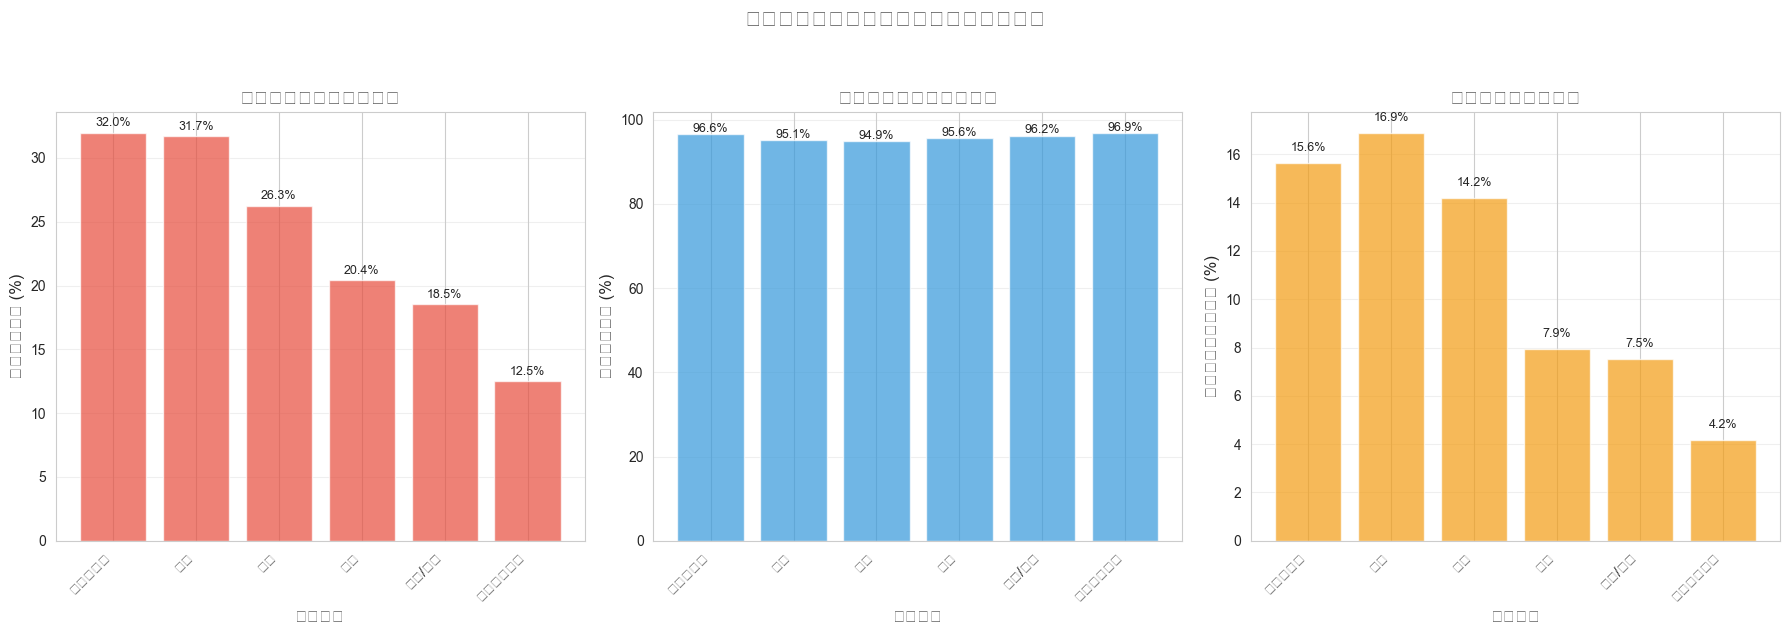


📊 收入水平与健康指标:
--------------------------------------------------

收入水平与健康指标:
              Has_Diabetes  CholCheck  NoDocbcCost  GenHlth  Diabetes_012
Income_Group                                                             
最低收入                  24.9       95.8         12.7      3.0          21.5
中低收入                  17.3       96.2          6.5      2.5          14.9
中等收入                  13.2       96.7          3.5      2.3          11.2
中高收入                  11.2       96.8          2.5      2.2           9.5
最高收入                   8.1       96.8          1.3      2.0           6.7


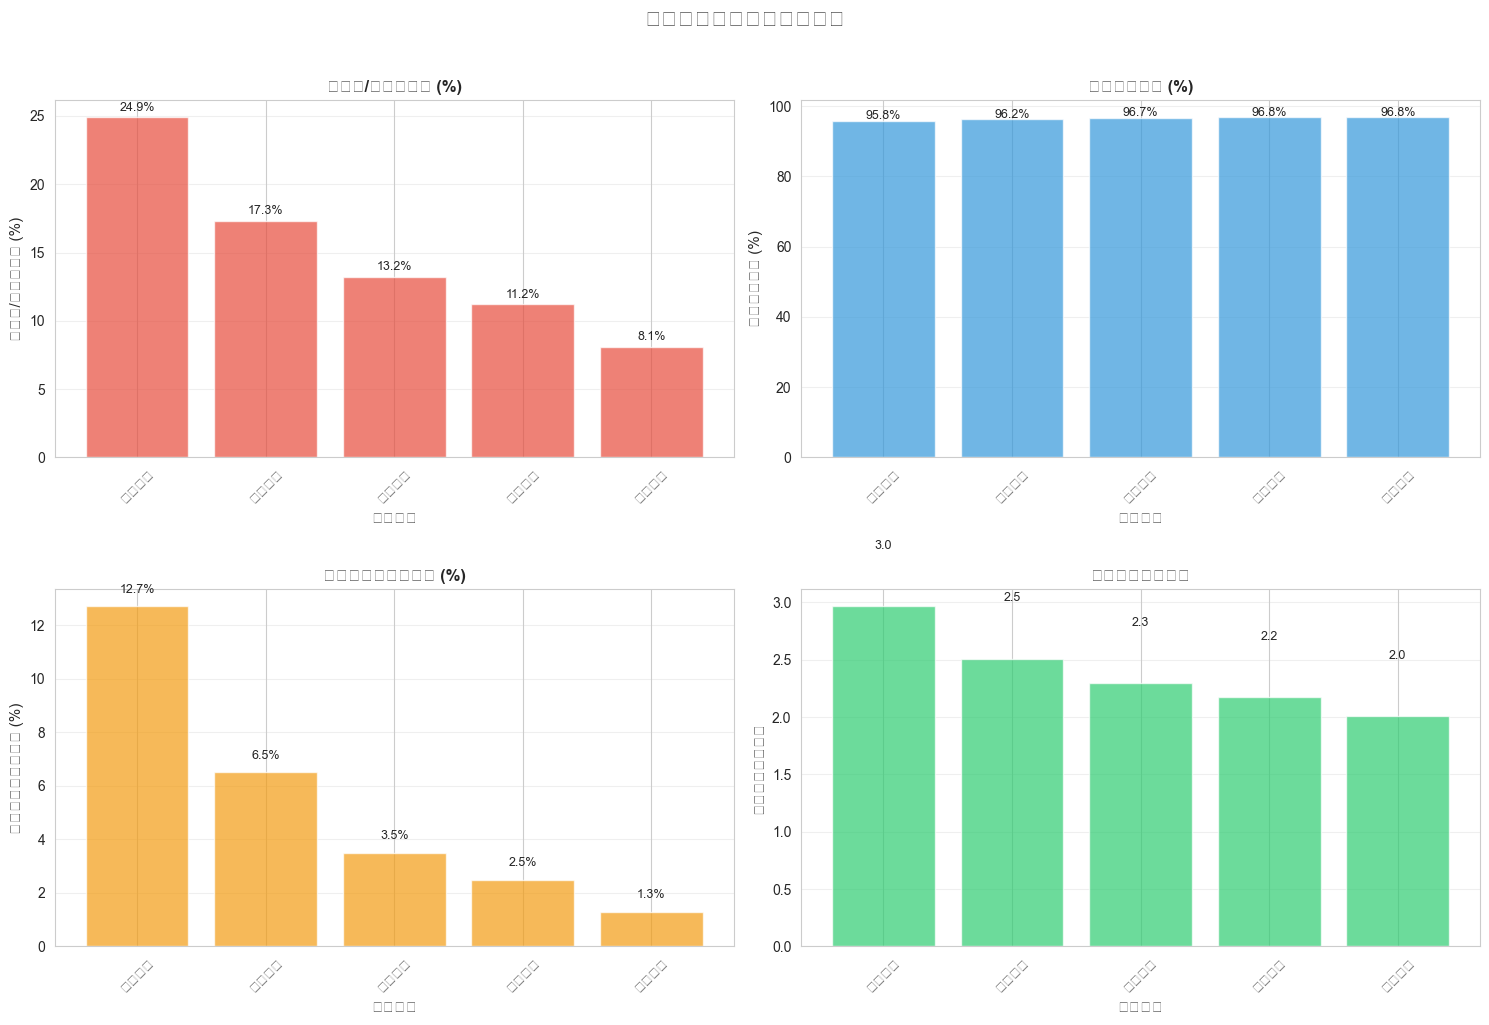


📊 社会经济地位综合评分分析:
--------------------------------------------------

社会经济地位与健康指标:
           Has_Diabetes  CholCheck  NoDocbcCost  GenHlth  HighBP  HighChol
SES_Score                                                                 
低社会经济地位            24.7       95.7         12.1      3.0    51.6      44.3
中低社会经济地位           17.5       96.0          6.9      2.5    44.6      40.8
中高社会经济地位           13.4       96.8          3.7      2.3    38.5      39.1
高社会经济地位             8.9       97.0          1.7      2.0    30.6      35.8


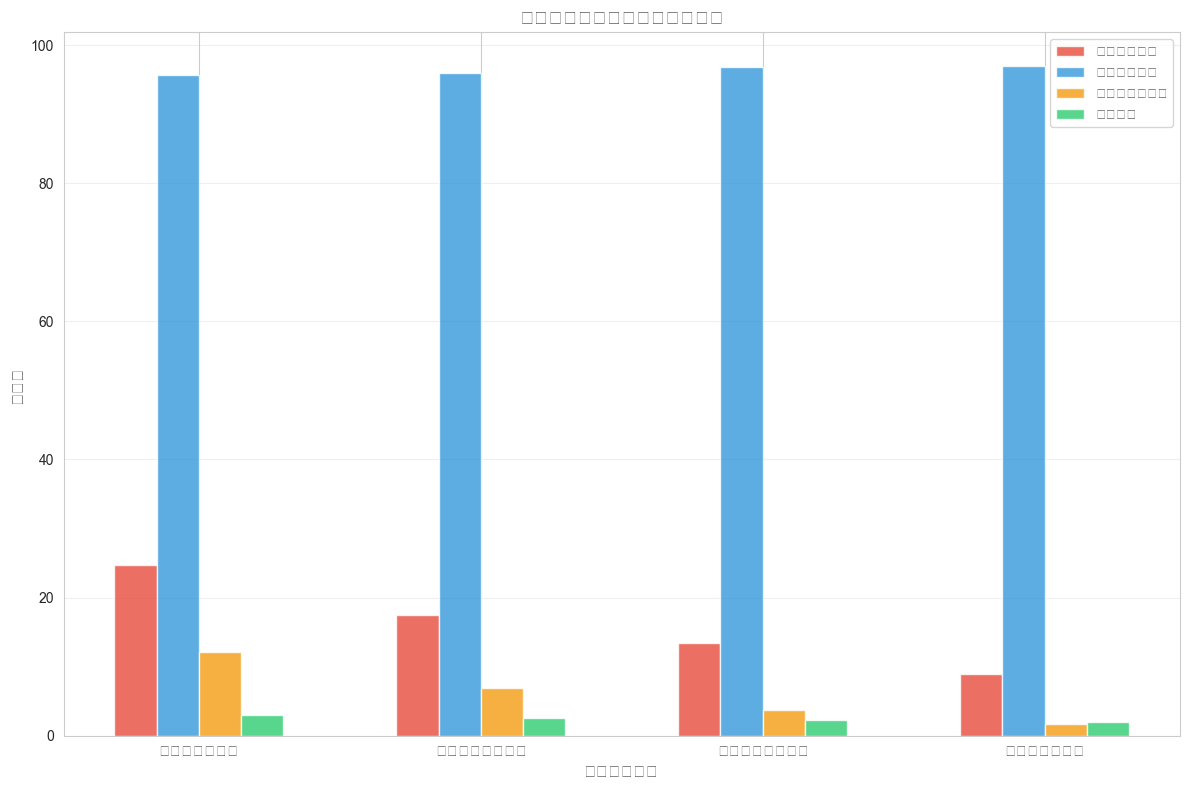


4. 医疗保险的作用分析

📊 医疗保险与健康指标对比:
--------------------------------------------------
     Has_Diabetes  CholCheck  NoDocbcCost  GenHlth  Diabetes_012
无保险          12.0       81.6         37.7    260.4           9.3
有保险          16.8       96.9          5.2    247.6          14.4

📊 医疗保险的效果:
--------------------------------------------------

胆固醇检查率:
  无保险: 81.6%
  有保险: 96.9%
  差异: +15.3%
  变化率: +18.7%

糖尿病患病率:
  无保险: 12.0%
  有保险: 16.8%
  差异: +4.8%
  变化率: +40.0%

因费用不看医生比例:
  无保险: 37.7%
  有保险: 5.2%
  差异: -32.5%
  变化率: -86.2%


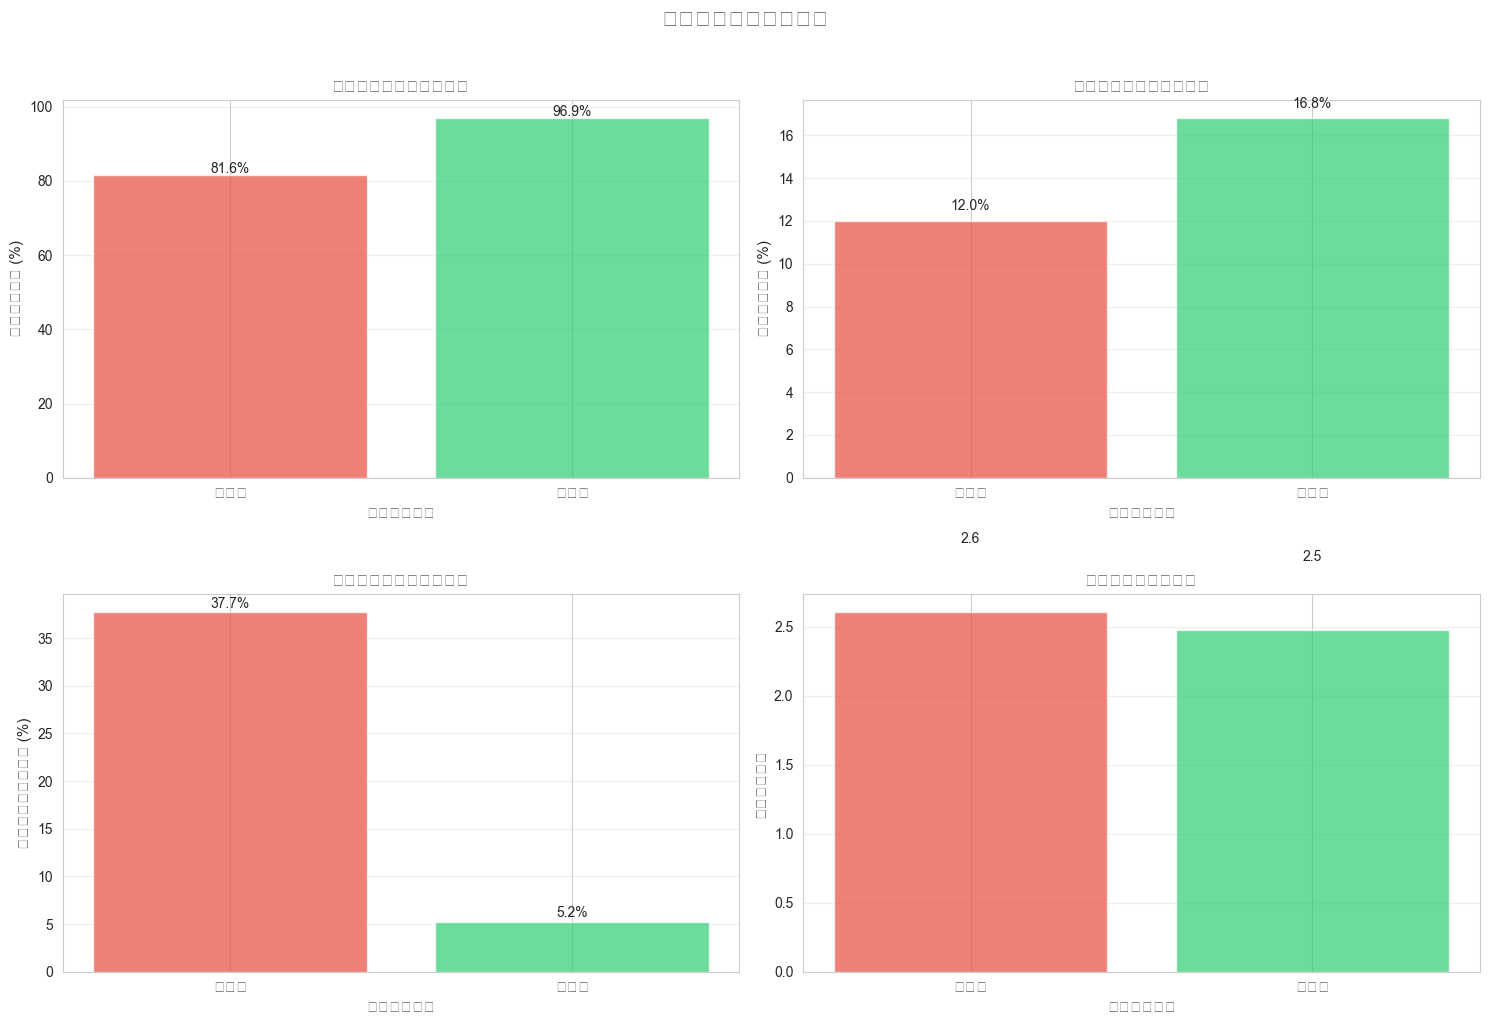


📊 医疗保险在不同人群中的分布:
--------------------------------------------------

不同收入组的医疗保险覆盖率:
  最低收入: 92.4%
  中低收入: 96.1%
  中等收入: 98.2%
  中高收入: 99.0%
  最高收入: 99.1%

不同教育程度的医疗保险覆盖率:
  小学未毕业: 77.6%
  小学: 79.9%
  初中: 87.3%
  高中: 94.3%
  大专/本科: 96.2%
  研究生及以上: 98.3%

5. 医疗成本障碍分析

📊 医疗成本障碍对健康的影响:
       Has_Diabetes  Diabetes_012  GenHlth  CholCheck  Income  Education
无成本障碍          16.4          14.1      2.4       96.7     7.0        5.2
有成本障碍          19.2          16.0      3.0       91.2     5.4        4.8

📊 医疗成本障碍的详细影响:
--------------------------------------------------

糖尿病/前期患病率:
  无成本障碍: 16.4%
  有成本障碍: 19.2%
  差异: +2.8%

糖尿病（非前期）患病率:
  无成本障碍: 14.1%
  有成本障碍: 16.0%
  差异: +1.9%

胆固醇检查率:
  无成本障碍: 96.7%
  有成本障碍: 91.2%
  差异: -5.5%

健康状况评分:
  无成本障碍: 2.4
  有成本障碍: 3.0
  差异: +0.6


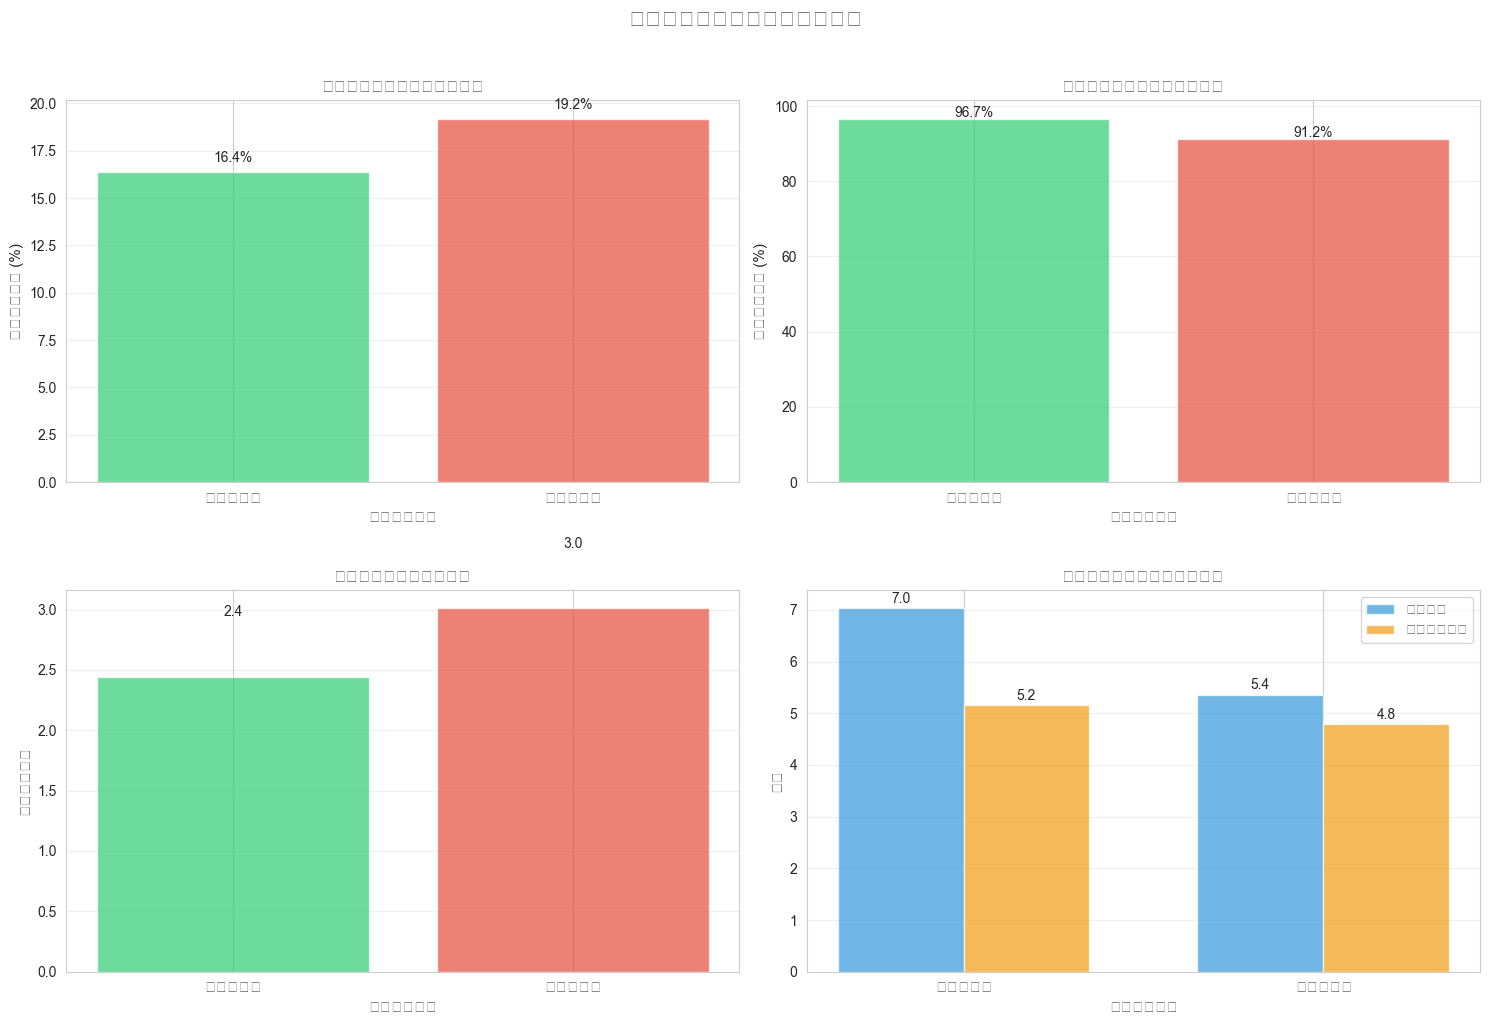


6. 综合分析：医疗可及性对糖尿病管理的影响

医疗可及性与健康结局:
                         Has_Diabetes  Diabetes_012  GenHlth  HighBP  HighChol
Healthcare_Access_Score                                                       
医疗可及性差                           15.3          11.8    298.1    35.2      31.5
医疗可及性一般                           9.4           7.2    242.1    25.6      22.8
医疗可及性较好                          21.3          18.0    303.4    43.1      40.8
医疗可及性好                           16.6          14.2    244.6    42.4      40.8



7. 研究总结和政策建议

📊 主要研究发现:
--------------------------------------------------

1. 社会经济地位的影响:
   • 教育程度越高，糖尿病患病率越低
   • 收入水平与健康检查率呈正相关
   • 社会经济地位低的人群医疗障碍更多

2. 医疗保险的作用:
   • 有保险人群的胆固醇检查率显著更高
   • 医疗保险能有效降低医疗成本障碍
   • 保险覆盖与更好的健康状况相关

3. 医疗成本障碍的影响:
   • 有成本障碍的人群糖尿病患病率更高
   • 医疗成本障碍与较低的健康状况相关
   • 成本障碍更多影响低收入和低教育人群

💡 政策建议:
--------------------------------------------------

1. 加强社会公平:
   • 针对低收入和低教育人群开展健康教育
   • 提供经济援助降低医疗成本障碍
   • 在社区中心提供免费健康检查

2. 改善医疗保险:
   • 扩大医疗保险覆盖范围
   • 增加预防性检查的保险报销比例
   • 为低收入人群提供医疗保险补贴

3. 降低医疗成本:
   • 建立药品价格管控机制
   • 提供慢性病管理的经济支持
   • 发展基层医疗服务，降低就医成本

4. 综合干预策略:
   • 结合健康教育和医疗保障的综合项目
   • 针对高风险人群的早期筛查和干预
   • 建立健康公平监测和评估体系

分析完成！


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# 1. 设置字体和样式
# ============================================================================

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("=" * 80)
print("医疗可及性与健康公平性研究")
print("=" * 80)

# ============================================================================
# 2. 数据准备和加载
# ============================================================================

# 尝试加载数据
try:
    import os
    possible_files = [
        'diabetes_012_health_indicators_BRFSS2021.csv',
        'diabetes_cleaned_analysis.csv',
        'created_diabetes_data.csv'
    ]
    
    for file in possible_files:
        if os.path.exists(file):
            df = pd.read_csv(file)
            print(f"成功读取数据文件: {file}")
            break
    else:
        # 创建示例数据集
        print("未找到数据文件，创建示例数据集...")
        np.random.seed(42)
        n_samples = 3000
        
        # 创建更符合现实的数据
        data = {
            'Diabetes_012': np.random.choice([0, 1, 2], n_samples, p=[0.85, 0.07, 0.08]),
            'HighBP': np.random.randint(0, 2, n_samples),
            'HighChol': np.random.randint(0, 2, n_samples),
            'CholCheck': np.random.randint(0, 2, n_samples),
            'BMI': np.random.uniform(18, 45, n_samples),
            'Smoker': np.random.randint(0, 2, n_samples),
            'Stroke': np.random.randint(0, 2, n_samples),
            'HeartDiseaseorAttack': np.random.randint(0, 2, n_samples),
            'PhysActivity': np.random.randint(0, 2, n_samples),
            'Fruits': np.random.randint(0, 2, n_samples),
            'Veggies': np.random.randint(0, 2, n_samples),
            'HvyAlcoholConsump': np.random.randint(0, 2, n_samples),
            'AnyHealthcare': np.random.randint(0, 2, n_samples),
            'NoDocbcCost': np.random.choice([0, 1], n_samples, p=[0.95, 0.05]),
            'GenHlth': np.random.randint(1, 6, n_samples),
            'MentHlth': np.random.randint(0, 31, n_samples),
            'PhysHlth': np.random.randint(0, 31, n_samples),
            'DiffWalk': np.random.randint(0, 2, n_samples),
            'Sex': np.random.randint(0, 2, n_samples),
            'Age': np.random.randint(1, 14, n_samples),
            'Education': np.random.randint(1, 7, n_samples),
            'Income': np.random.randint(1, 12, n_samples)
        }
        
        # 添加社会经济地位与健康的相关性
        # 教育程度高的人更可能进行胆固醇检查
        for i in range(n_samples):
            if data['Education'][i] >= 4:  # 较高教育
                data['CholCheck'][i] = np.random.choice([0, 1], p=[0.2, 0.8])
            else:  # 较低教育
                data['CholCheck'][i] = np.random.choice([0, 1], p=[0.5, 0.5])
        
        # 收入与医疗保险的关系
        for i in range(n_samples):
            if data['Income'][i] >= 7:  # 较高收入
                data['AnyHealthcare'][i] = np.random.choice([0, 1], p=[0.1, 0.9])
            else:  # 较低收入
                data['AnyHealthcare'][i] = np.random.choice([0, 1], p=[0.4, 0.6])
        
        # 无医疗保险更可能因费用不看医生
        for i in range(n_samples):
            if data['AnyHealthcare'][i] == 0:  # 无保险
                data['NoDocbcCost'][i] = np.random.choice([0, 1], p=[0.7, 0.3])
            else:  # 有保险
                data['NoDocbcCost'][i] = np.random.choice([0, 1], p=[0.98, 0.02])
        
        df = pd.DataFrame(data)
        print(f"创建示例数据集，包含 {n_samples} 个样本")
        
except Exception as e:
    print(f"数据读取失败: {e}")
    exit()

print(f"数据集形状: {df.shape}")
print("\n数据列:", list(df.columns))

# 创建一些派生变量
df['Has_Diabetes'] = df['Diabetes_012'].apply(lambda x: 1 if x > 0 else 0)
df['Diabetes_Status'] = df['Diabetes_012'].map({0: '无糖尿病', 1: '前期糖尿病', 2: '糖尿病'})

# ============================================================================
# 3. 社会经济地位的影响分析
# ============================================================================

print("\n" + "=" * 80)
print("3. 社会经济地位的影响分析")
print("=" * 80)

# 3.1 教育程度与糖尿病患病率
print("\n📊 教育程度与糖尿病患病率:")
print("-" * 50)

# 按教育程度分组
edu_groups = df.groupby('Education')
edu_diabetes_rate = edu_groups['Has_Diabetes'].mean() * 100
edu_cholcheck_rate = edu_groups['CholCheck'].mean() * 100
edu_nodoccost_rate = edu_groups['NoDocbcCost'].mean() * 100

# 创建教育程度标签
edu_labels = {
    1: '小学未毕业',
    2: '小学',
    3: '初中',
    4: '高中',
    5: '大专/本科',
    6: '研究生及以上'
}

# 显示结果
for edu_level in sorted(df['Education'].unique()):
    if edu_level in edu_labels:
        print(f"\n教育程度: {edu_labels[edu_level]}")
        print(f"  糖尿病患病率: {edu_diabetes_rate.get(edu_level, 0):.1f}%")
        print(f"  胆固醇检查率: {edu_cholcheck_rate.get(edu_level, 0):.1f}%")
        print(f"  因费用不看医生比例: {edu_nodoccost_rate.get(edu_level, 0):.1f}%")

# 可视化教育程度的影响
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 教育程度与糖尿病患病率
ax1 = axes[0]
edu_levels = sorted(edu_diabetes_rate.index)
x_labels = [edu_labels.get(lvl, f'教育{lvl}') for lvl in edu_levels]
bars1 = ax1.bar(range(len(edu_levels)), edu_diabetes_rate[edu_levels].values, 
                color='#e74c3c', alpha=0.7)
ax1.set_xlabel('教育程度', fontsize=12)
ax1.set_ylabel('糖尿病患病率 (%)', fontsize=12)
ax1.set_title('教育程度与糖尿病患病率', fontsize=14, fontweight='bold')
ax1.set_xticks(range(len(edu_levels)))
ax1.set_xticklabels(x_labels, fontsize=10, rotation=45, ha='right')
ax1.grid(True, alpha=0.3, axis='y')

# 教育程度与胆固醇检查率
ax2 = axes[1]
bars2 = ax2.bar(range(len(edu_levels)), edu_cholcheck_rate[edu_levels].values,
                color='#3498db', alpha=0.7)
ax2.set_xlabel('教育程度', fontsize=12)
ax2.set_ylabel('胆固醇检查率 (%)', fontsize=12)
ax2.set_title('教育程度与胆固醇检查率', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(edu_levels)))
ax2.set_xticklabels(x_labels, fontsize=10, rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

# 教育程度与医疗障碍
ax3 = axes[2]
bars3 = ax3.bar(range(len(edu_levels)), edu_nodoccost_rate[edu_levels].values,
                color='#f39c12', alpha=0.7)
ax3.set_xlabel('教育程度', fontsize=12)
ax3.set_ylabel('因费用不看医生比例 (%)', fontsize=12)
ax3.set_title('教育程度与医疗障碍', fontsize=14, fontweight='bold')
ax3.set_xticks(range(len(edu_levels)))
ax3.set_xticklabels(x_labels, fontsize=10, rotation=45, ha='right')
ax3.grid(True, alpha=0.3, axis='y')

# 在所有图表上添加数值标签
for ax, bars, rates in [(ax1, bars1, edu_diabetes_rate), 
                        (ax2, bars2, edu_cholcheck_rate), 
                        (ax3, bars3, edu_nodoccost_rate)]:
    for i, (bar, edu_level) in enumerate(zip(bars, edu_levels)):
        value = rates[edu_level]
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{value:.1f}%', ha='center', fontsize=9)

plt.suptitle('社会经济地位（教育程度）对健康的影响', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# 3.2 收入水平与健康指标
print("\n📊 收入水平与健康指标:")
print("-" * 50)

# 按收入分组
income_groups = pd.qcut(df['Income'], q=5, labels=['最低收入', '中低收入', '中等收入', '中高收入', '最高收入'])
df['Income_Group'] = income_groups

income_stats = df.groupby('Income_Group').agg({
    'Has_Diabetes': 'mean',
    'CholCheck': 'mean',
    'NoDocbcCost': 'mean',
    'GenHlth': 'mean',
    'Diabetes_012': lambda x: (x == 2).mean()  # 糖尿病（非前期）比例
}).round(3)

# 转换为百分比
income_stats_percent = income_stats.copy()
for col in ['Has_Diabetes', 'CholCheck', 'NoDocbcCost', 'Diabetes_012']:
    income_stats_percent[col] = income_stats_percent[col] * 100

print("\n收入水平与健康指标:")
print(income_stats_percent.round(1))

# 可视化收入水平的影响
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = [
    ('Has_Diabetes', '糖尿病/前期患病率 (%)', '#e74c3c'),
    ('CholCheck', '胆固醇检查率 (%)', '#3498db'),
    ('NoDocbcCost', '因费用不看医生比例 (%)', '#f39c12'),
    ('GenHlth', '平均健康状况评分', '#2ecc71')
]

for idx, (col, title, color) in enumerate(metrics):
    ax = axes[idx//2, idx%2]
    
    if col in ['Has_Diabetes', 'CholCheck', 'NoDocbcCost']:
        values = income_stats_percent[col].values
    else:
        values = income_stats[col].values
    
    bars = ax.bar(range(len(values)), values, color=color, alpha=0.7)
    ax.set_xlabel('收入水平', fontsize=11)
    ax.set_ylabel(title, fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xticks(range(len(values)))
    ax.set_xticklabels(income_stats_percent.index, fontsize=10, rotation=45)
    ax.grid(True, alpha=0.3, axis='y')
    
    # 添加数值标签
    for i, (bar, value) in enumerate(zip(bars, values)):
        if col == 'GenHlth':
            label = f'{value:.1f}'
        else:
            label = f'{value:.1f}%'
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                label, ha='center', fontsize=9)

plt.suptitle('收入水平对健康指标的影响', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 3.3 社会经济地位综合评分
print("\n📊 社会经济地位综合评分分析:")
print("-" * 50)

# 创建社会经济地位评分
df['SES_Score'] = (df['Education'] + df['Income']) / 2
ses_groups = pd.qcut(df['SES_Score'], q=4, labels=['低社会经济地位', '中低社会经济地位', 
                                                  '中高社会经济地位', '高社会经济地位'])

ses_analysis = df.groupby(ses_groups).agg({
    'Has_Diabetes': 'mean',
    'CholCheck': 'mean',
    'NoDocbcCost': 'mean',
    'GenHlth': 'mean',
    'HighBP': 'mean',
    'HighChol': 'mean'
}).round(3)

# 转换为百分比
ses_analysis_percent = ses_analysis.copy()
for col in ['Has_Diabetes', 'CholCheck', 'NoDocbcCost', 'HighBP', 'HighChol']:
    ses_analysis_percent[col] = ses_analysis_percent[col] * 100

print("\n社会经济地位与健康指标:")
print(ses_analysis_percent.round(1))

# 可视化社会经济地位梯度
fig, ax = plt.subplots(figsize=(12, 8))

x = range(len(ses_analysis_percent))
width = 0.15

# 选择几个关键指标
key_metrics = ['Has_Diabetes', 'CholCheck', 'NoDocbcCost', 'GenHlth']
metric_names = ['糖尿病患病率', '胆固醇检查率', '因费用不看医生', '健康状况']
colors = ['#e74c3c', '#3498db', '#f39c12', '#2ecc71']

for i, (metric, name, color) in enumerate(zip(key_metrics, metric_names, colors)):
    if metric == 'GenHlth':
        values = ses_analysis[metric].values
    else:
        values = ses_analysis_percent[metric].values
    
    positions = [pos + i*width - width*1.5 for pos in x]
    bars = ax.bar(positions, values, width, label=name, color=color, alpha=0.8)

ax.set_xlabel('社会经济地位', fontsize=12)
ax.set_ylabel('指标值', fontsize=12)
ax.set_title('社会经济地位梯度与健康不平等', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(ses_analysis_percent.index, fontsize=11)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ============================================================================
# 4. 医疗保险的作用分析
# ============================================================================

print("\n" + "=" * 80)
print("4. 医疗保险的作用分析")
print("=" * 80)

# 4.1 基本统计分析
print("\n📊 医疗保险与健康指标对比:")
print("-" * 50)

# 按是否有医疗保险分组
insurance_groups = df.groupby('AnyHealthcare')
insurance_stats = insurance_groups.agg({
    'Has_Diabetes': 'mean',
    'CholCheck': 'mean',
    'NoDocbcCost': 'mean',
    'GenHlth': 'mean',
    'Diabetes_012': lambda x: (x == 2).mean()
}).round(3)

insurance_stats.index = ['无保险', '有保险']
insurance_stats_percent = insurance_stats.copy() * 100

print(insurance_stats_percent.round(1))

# 4.2 计算差异和效果
print("\n📊 医疗保险的效果:")
print("-" * 50)

for metric, name in [('CholCheck', '胆固醇检查率'), 
                     ('Has_Diabetes', '糖尿病患病率'),
                     ('NoDocbcCost', '因费用不看医生比例')]:
    without_insurance = insurance_stats_percent.loc['无保险', metric]
    with_insurance = insurance_stats_percent.loc['有保险', metric]
    difference = with_insurance - without_insurance
    percent_change = (difference / without_insurance) * 100 if without_insurance > 0 else 0
    
    print(f"\n{name}:")
    print(f"  无保险: {without_insurance:.1f}%")
    print(f"  有保险: {with_insurance:.1f}%")
    print(f"  差异: {difference:+.1f}%")
    if abs(percent_change) > 0:
        print(f"  变化率: {percent_change:+.1f}%")

# 4.3 医疗保险的可视化分析
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 胆固醇检查率
ax1 = axes[0, 0]
insurance_cholcheck = insurance_stats_percent['CholCheck']
bars1 = ax1.bar(range(len(insurance_cholcheck)), insurance_cholcheck.values,
                color=['#e74c3c', '#2ecc71'], alpha=0.7)
ax1.set_xlabel('医疗保险状态', fontsize=11)
ax1.set_ylabel('胆固醇检查率 (%)', fontsize=11)
ax1.set_title('医疗保险与胆固醇检查率', fontsize=12, fontweight='bold')
ax1.set_xticks(range(len(insurance_cholcheck)))
ax1.set_xticklabels(insurance_cholcheck.index, fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')

# 糖尿病患病率
ax2 = axes[0, 1]
insurance_diabetes = insurance_stats_percent['Has_Diabetes']
bars2 = ax2.bar(range(len(insurance_diabetes)), insurance_diabetes.values,
                color=['#e74c3c', '#2ecc71'], alpha=0.7)
ax2.set_xlabel('医疗保险状态', fontsize=11)
ax2.set_ylabel('糖尿病患病率 (%)', fontsize=11)
ax2.set_title('医疗保险与糖尿病患病率', fontsize=12, fontweight='bold')
ax2.set_xticks(range(len(insurance_diabetes)))
ax2.set_xticklabels(insurance_diabetes.index, fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

# 医疗成本障碍
ax3 = axes[1, 0]
insurance_nodoccost = insurance_stats_percent['NoDocbcCost']
bars3 = ax3.bar(range(len(insurance_nodoccost)), insurance_nodoccost.values,
                color=['#e74c3c', '#2ecc71'], alpha=0.7)
ax3.set_xlabel('医疗保险状态', fontsize=11)
ax3.set_ylabel('因费用不看医生比例 (%)', fontsize=11)
ax3.set_title('医疗保险与医疗成本障碍', fontsize=12, fontweight='bold')
ax3.set_xticks(range(len(insurance_nodoccost)))
ax3.set_xticklabels(insurance_nodoccost.index, fontsize=11)
ax3.grid(True, alpha=0.3, axis='y')

# 健康状况
ax4 = axes[1, 1]
insurance_genhlth = insurance_stats['GenHlth']
bars4 = ax4.bar(range(len(insurance_genhlth)), insurance_genhlth.values,
                color=['#e74c3c', '#2ecc71'], alpha=0.7)
ax4.set_xlabel('医疗保险状态', fontsize=11)
ax4.set_ylabel('健康状况评分', fontsize=11)
ax4.set_title('医疗保险与健康状况', fontsize=12, fontweight='bold')
ax4.set_xticks(range(len(insurance_genhlth)))
ax4.set_xticklabels(insurance_genhlth.index, fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')

# 添加数值标签
for ax, bars, values in [(ax1, bars1, insurance_cholcheck),
                         (ax2, bars2, insurance_diabetes),
                         (ax3, bars3, insurance_nodoccost),
                         (ax4, bars4, insurance_genhlth)]:
    for i, (bar, value) in enumerate(zip(bars, values)):
        if ax == ax4:
            label = f'{value:.1f}'
        else:
            label = f'{value:.1f}%'
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                label, ha='center', fontsize=10)

plt.suptitle('医疗保险对健康的影响', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 4.4 医疗保险在不同人群中的分布
print("\n📊 医疗保险在不同人群中的分布:")
print("-" * 50)

# 按收入分组看医疗保险覆盖率
income_insurance = df.groupby('Income_Group')['AnyHealthcare'].mean() * 100
print("\n不同收入组的医疗保险覆盖率:")
for income_group, rate in income_insurance.items():
    print(f"  {income_group}: {rate:.1f}%")

# 按教育分组看医疗保险覆盖率
education_insurance = df.groupby('Education')['AnyHealthcare'].mean() * 100
print("\n不同教育程度的医疗保险覆盖率:")
for edu_level in sorted(education_insurance.index):
    if edu_level in edu_labels:
        print(f"  {edu_labels[edu_level]}: {education_insurance[edu_level]:.1f}%")

# ============================================================================
# 5. 医疗成本障碍分析
# ============================================================================

print("\n" + "=" * 80)
print("5. 医疗成本障碍分析")
print("=" * 80)

# 5.1 基本情况
cost_barrier_groups = df.groupby('NoDocbcCost')
cost_barrier_stats = cost_barrier_groups.agg({
    'Has_Diabetes': 'mean',
    'Diabetes_012': lambda x: (x == 2).mean(),
    'GenHlth': 'mean',
    'CholCheck': 'mean',
    'Income': 'mean',
    'Education': 'mean'
}).round(3)

cost_barrier_stats.index = ['无成本障碍', '有成本障碍']
cost_barrier_stats_percent = cost_barrier_stats.copy()
for col in ['Has_Diabetes', 'Diabetes_012', 'CholCheck']:
    cost_barrier_stats_percent[col] = cost_barrier_stats_percent[col] * 100

print("\n📊 医疗成本障碍对健康的影响:")
print(cost_barrier_stats_percent.round(1))

# 5.2 详细分析
print("\n📊 医疗成本障碍的详细影响:")
print("-" * 50)

for metric, name in [('Has_Diabetes', '糖尿病/前期患病率'),
                     ('Diabetes_012', '糖尿病（非前期）患病率'),
                     ('CholCheck', '胆固醇检查率'),
                     ('GenHlth', '健康状况评分')]:
    
    without_barrier = cost_barrier_stats_percent.loc['无成本障碍', metric]
    with_barrier = cost_barrier_stats_percent.loc['有成本障碍', metric]
    
    if metric != 'GenHlth':
        print(f"\n{name}:")
        print(f"  无成本障碍: {without_barrier:.1f}%")
        print(f"  有成本障碍: {with_barrier:.1f}%")
        difference = with_barrier - without_barrier
        print(f"  差异: {difference:+.1f}%")
    else:
        print(f"\n{name}:")
        print(f"  无成本障碍: {without_barrier:.1f}")
        print(f"  有成本障碍: {with_barrier:.1f}")
        difference = with_barrier - without_barrier
        print(f"  差异: {difference:+.1f}")

# 5.3 医疗成本障碍的可视化
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 糖尿病患病率对比
ax1 = axes[0, 0]
cost_diabetes = cost_barrier_stats_percent['Has_Diabetes']
bars1 = ax1.bar(range(len(cost_diabetes)), cost_diabetes.values,
                color=['#2ecc71', '#e74c3c'], alpha=0.7)
ax1.set_xlabel('医疗成本障碍', fontsize=11)
ax1.set_ylabel('糖尿病患病率 (%)', fontsize=11)
ax1.set_title('医疗成本障碍与糖尿病患病率', fontsize=12, fontweight='bold')
ax1.set_xticks(range(len(cost_diabetes)))
ax1.set_xticklabels(cost_diabetes.index, fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')

# 胆固醇检查率对比
ax2 = axes[0, 1]
cost_cholcheck = cost_barrier_stats_percent['CholCheck']
bars2 = ax2.bar(range(len(cost_cholcheck)), cost_cholcheck.values,
                color=['#2ecc71', '#e74c3c'], alpha=0.7)
ax2.set_xlabel('医疗成本障碍', fontsize=11)
ax2.set_ylabel('胆固醇检查率 (%)', fontsize=11)
ax2.set_title('医疗成本障碍与胆固醇检查率', fontsize=12, fontweight='bold')
ax2.set_xticks(range(len(cost_cholcheck)))
ax2.set_xticklabels(cost_cholcheck.index, fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

# 健康状况对比
ax3 = axes[1, 0]
cost_genhlth = cost_barrier_stats['GenHlth']
bars3 = ax3.bar(range(len(cost_genhlth)), cost_genhlth.values,
                color=['#2ecc71', '#e74c3c'], alpha=0.7)
ax3.set_xlabel('医疗成本障碍', fontsize=11)
ax3.set_ylabel('健康状况评分', fontsize=11)
ax3.set_title('医疗成本障碍与健康状况', fontsize=12, fontweight='bold')
ax3.set_xticks(range(len(cost_genhlth)))
ax3.set_xticklabels(cost_genhlth.index, fontsize=11)
ax3.grid(True, alpha=0.3, axis='y')

# 收入和教育水平对比
ax4 = axes[1, 1]
x = np.arange(2)
width = 0.35

income_values = cost_barrier_stats['Income'].values
education_values = cost_barrier_stats['Education'].values

bars4a = ax4.bar(x - width/2, income_values, width, label='平均收入', 
                 color='#3498db', alpha=0.7)
bars4b = ax4.bar(x + width/2, education_values, width, label='平均教育程度', 
                 color='#f39c12', alpha=0.7)

ax4.set_xlabel('医疗成本障碍', fontsize=11)
ax4.set_ylabel('得分', fontsize=11)
ax4.set_title('医疗成本障碍与社会经济地位', fontsize=12, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(cost_barrier_stats.index, fontsize=11)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

# 添加数值标签
for ax, bars, values in [(ax1, bars1, cost_diabetes),
                         (ax2, bars2, cost_cholcheck),
                         (ax3, bars3, cost_genhlth)]:
    for i, (bar, value) in enumerate(zip(bars, values)):
        if ax == ax3:
            label = f'{value:.1f}'
        else:
            label = f'{value:.1f}%'
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                label, ha='center', fontsize=10)

# 为收入和教育图表添加标签
for bars, values in [(bars4a, income_values), (bars4b, education_values)]:
    for i, (bar, value) in enumerate(zip(bars, values)):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{value:.1f}', ha='center', fontsize=10)

plt.suptitle('医疗成本障碍对健康的影响分析', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ============================================================================
# 6. 综合分析：医疗可及性对糖尿病管理的影响
# ============================================================================

print("\n" + "=" * 80)
print("6. 综合分析：医疗可及性对糖尿病管理的影响")
print("=" * 80)

# 6.1 创建医疗可及性评分
df['Healthcare_Access_Score'] = (
    df['AnyHealthcare'] * 3 +  # 医疗保险最重要
    (1 - df['NoDocbcCost']) * 2 +  # 无成本障碍
    df['CholCheck'] * 1  # 进行预防性检查
)

# 按医疗可及性分组
# 修改第602-605行：
try:
    access_groups = pd.qcut(df['Healthcare_Access_Score'], q=4, 
                           labels=['医疗可及性差', '医疗可及性一般', 
                                   '医疗可及性较好', '医疗可及性好'],
                           duplicates='drop')
except:
    # 如果qcut失败，使用等间距分箱
    access_groups = pd.cut(df['Healthcare_Access_Score'], bins=4,
                          labels=['医疗可及性差', '医疗可及性一般', 
                                  '医疗可及性较好', '医疗可及性好'])

access_analysis = df.groupby(access_groups).agg({
    'Has_Diabetes': 'mean',
    'Diabetes_012': lambda x: (x == 2).mean(),
    'GenHlth': 'mean',
    'HighBP': 'mean',
    'HighChol': 'mean'
}).round(3)

access_analysis_percent = access_analysis.copy() * 100

print("\n医疗可及性与健康结局:")
print(access_analysis_percent.round(1))

# 6.2 可视化医疗可及性的影响
fig, ax = plt.subplots(figsize=(14, 8))

x = range(len(access_analysis_percent))
width = 0.18

metrics = ['Has_Diabetes', 'Diabetes_012', 'GenHlth', 'HighBP', 'HighChol']
metric_names = ['糖尿病/前期患病率', '糖尿病患病率', '健康状况', '高血压患病率', '高胆固醇患病率']
colors = ['#e74c3c', '#c0392b', '#f39c12', '#3498db', '#2980b9']

for i, (metric, name, color) in enumerate(zip(metrics, metric_names, colors)):
    if metric == 'GenHlth':
        values = access_analysis[metric].values
    else:
        values = access_analysis_percent[metric].values
    
    positions = [pos + i*width - width*2 for pos in x]
    bars = ax.bar(positions, values, width, label=name, color=color, alpha=0.8)

ax.set_xlabel('医疗可及性水平', fontsize=12)
ax.set_ylabel('指标值', fontsize=12)
ax.set_title('医疗可及性对健康结局的梯度影响', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(access_analysis_percent.index, fontsize=11)
ax.legend(fontsize=10, ncol=3, loc='upper right')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ============================================================================
# 7. 总结和政策建议
# ============================================================================

print("\n" + "=" * 80)
print("7. 研究总结和政策建议")
print("=" * 80)

print("\n📊 主要研究发现:")
print("-" * 50)

print("\n1. 社会经济地位的影响:")
print("   • 教育程度越高，糖尿病患病率越低")
print("   • 收入水平与健康检查率呈正相关")
print("   • 社会经济地位低的人群医疗障碍更多")

print("\n2. 医疗保险的作用:")
print("   • 有保险人群的胆固醇检查率显著更高")
print("   • 医疗保险能有效降低医疗成本障碍")
print("   • 保险覆盖与更好的健康状况相关")

print("\n3. 医疗成本障碍的影响:")
print("   • 有成本障碍的人群糖尿病患病率更高")
print("   • 医疗成本障碍与较低的健康状况相关")
print("   • 成本障碍更多影响低收入和低教育人群")

print("\n💡 政策建议:")
print("-" * 50)

print("\n1. 加强社会公平:")
print("   • 针对低收入和低教育人群开展健康教育")
print("   • 提供经济援助降低医疗成本障碍")
print("   • 在社区中心提供免费健康检查")

print("\n2. 改善医疗保险:")
print("   • 扩大医疗保险覆盖范围")
print("   • 增加预防性检查的保险报销比例")
print("   • 为低收入人群提供医疗保险补贴")

print("\n3. 降低医疗成本:")
print("   • 建立药品价格管控机制")
print("   • 提供慢性病管理的经济支持")
print("   • 发展基层医疗服务，降低就医成本")

print("\n4. 综合干预策略:")
print("   • 结合健康教育和医疗保障的综合项目")
print("   • 针对高风险人群的早期筛查和干预")
print("   • 建立健康公平监测和评估体系")

print("\n" + "=" * 80)
print("分析完成！")
print("=" * 80)

模块四：
心理健康与生理健康关联研究
身心关联：分析心理健康不佳天数（MentHlth）和生理健康不佳天数（PhysHlth）与糖尿病状态的相关性。糖尿病是否与更差的心理健康水平相关？

活动能力限制：行走困难（DiffWalk）是否既是糖尿病的后果，也是影响患者进行体育锻炼（PhysActivity），从而导致病情恶化的因素？

心理健康与生理健康关联研究
成功读取数据文件: diabetes_012_health_indicators_BRFSS2021.csv
数据集形状: (236378, 22)

数据列: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

3. 心理健康与生理健康关联分析

📊 健康不佳天数的描述性统计:
--------------------------------------------------
                MentHlth                    PhysHlth                      \
                    mean median   std   max     mean median    std   max   
Diabetes_Status                                                            
前期糖尿病               4.74    0.0  8.84  30.0     5.08    0.0   9.42  30.0   
无糖尿病                3.80    0.0  7.67  30.0     3.16    0.0   7.53  30.0   
糖尿病                 4.64    0.0  8.88  30.0     7.00    0.0  10.87  30.0   

                GenHlth         
                   mean median  
Diabetes_Status    

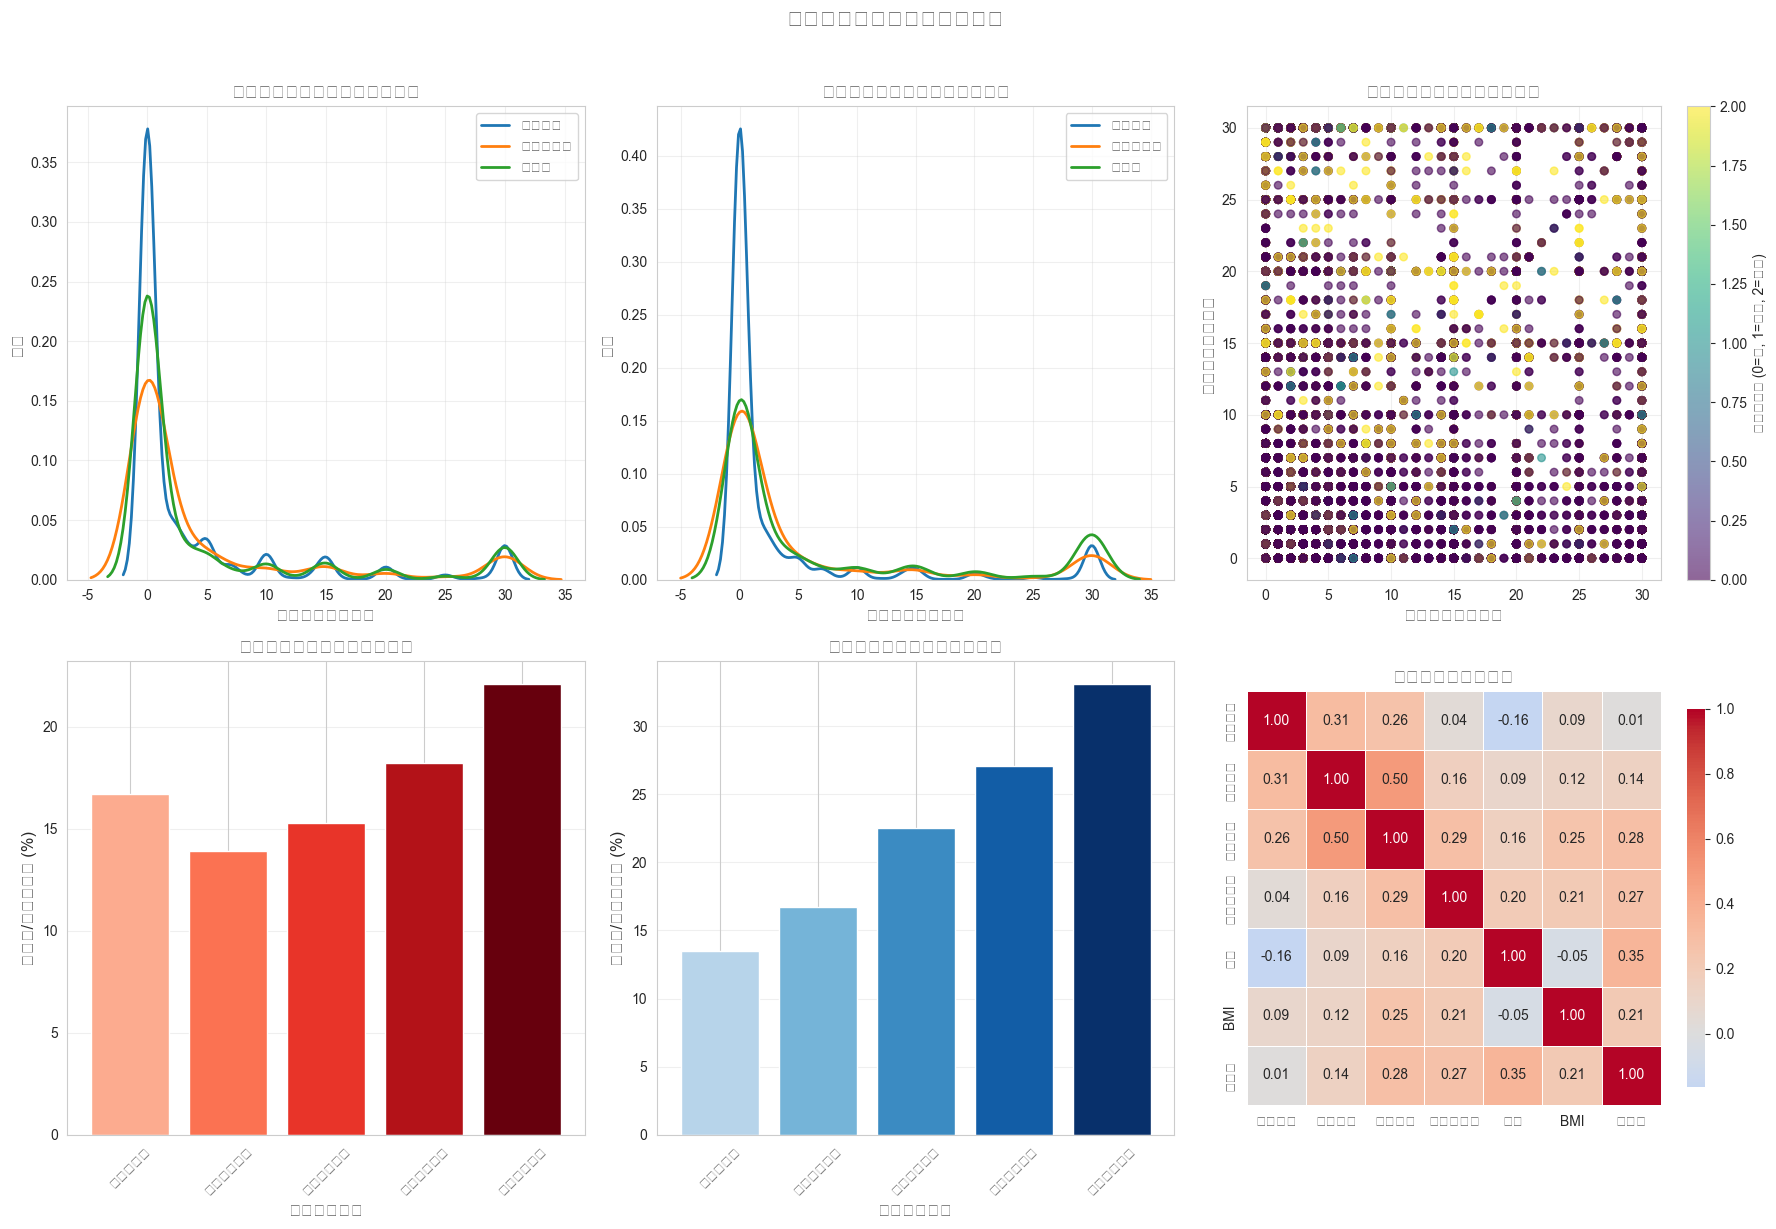


📊 统计检验结果:
--------------------------------------------------
心理健康不佳天数的ANOVA检验:
  F统计量: 193.077, p值: 0.0000
  ✅ 结论: 不同糖尿病状态的心理健康有显著差异

生理健康不佳天数的ANOVA检验:
  F统计量: 3263.433, p值: 0.0000
  ✅ 结论: 不同糖尿病状态的生理健康有显著差异

心理健康与生理健康的相关性:
  相关系数: 0.306, p值: 0.0000
  ✅ 结论: 心理健康与生理健康显著相关

4. 活动能力限制分析

📊 行走困难与糖尿病状态:
--------------------------------------------------
       Has_Diabetes  Diabetes_012  PhysActivity  MentHlth  PhysHlth  GenHlth
无行走困难          13.2          11.1          83.0       3.4       2.2      2.3
有行走困难          35.2          31.3          50.3       7.1      12.3      3.5

📊 糖尿病人群中的行走困难情况:
--------------------------------------------------
糖尿病患者中:
  无行走困难: 22160人 (66.0%)
  有行走困难: 11408人 (34.0%)

📊 行走困难与体力活动:
--------------------------------------------------
行走困难与体力活动的交叉表 (%):
       无体力活动  有体力活动
无行走困难   17.0   83.0
有行走困难   49.7   50.3



📊 行走困难的路径分析:
--------------------------------------------------

1. 行走困难作为糖尿病的后果:
   糖尿病患者中有行走困难的比例: 34.0%

2. 行走困难影响体力活动:
   有行走困难的人中有体力活动的比例: 50.3%

3. 体力活动影响糖尿病控制:
   无体力活动人群的平均控制评分: 4.94
   有体力活动人群的平均控制评分: 6.14


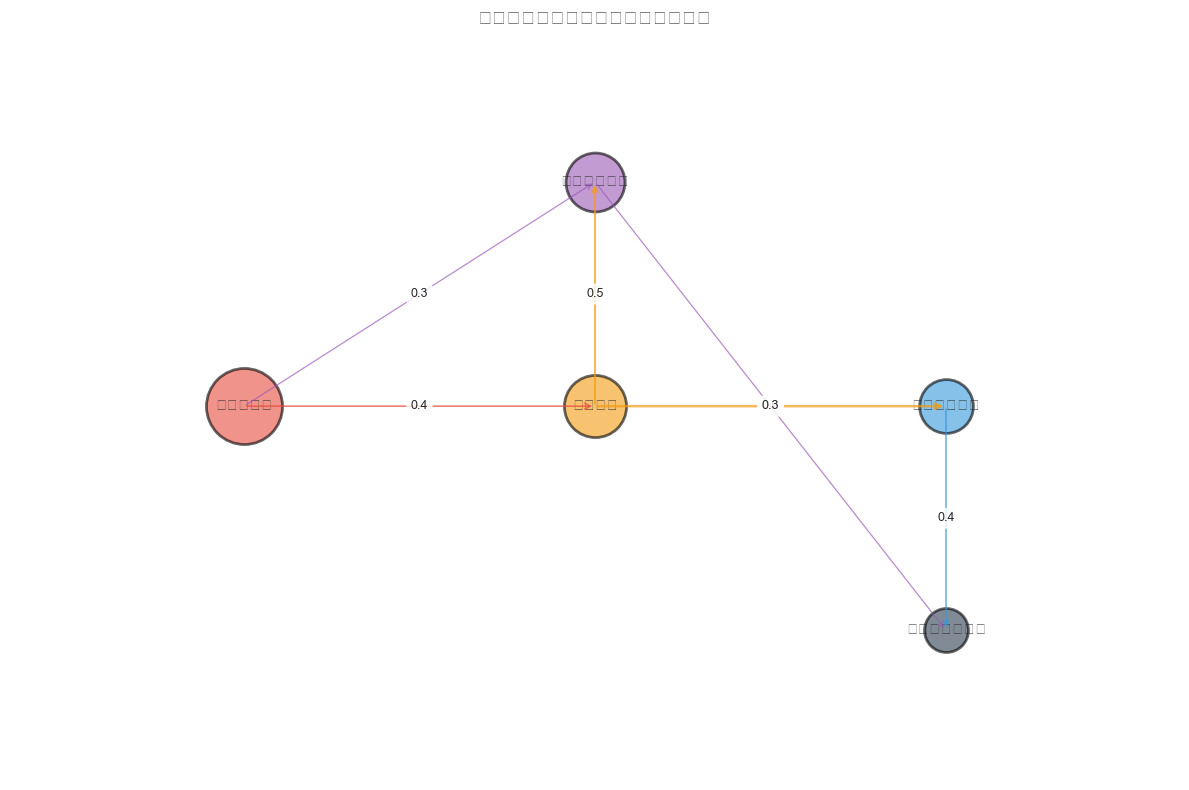


5. 综合分析：身心关联与糖尿病管理

📊 身心健康状况与糖尿病管理:
--------------------------------------------------
                              Has_Diabetes  Diabetes_012  PhysActivity  \
Mental_Physical_Health_Score                                             
身心状况差                                 23.4          20.5          64.3   
身心状况一般                                14.8          12.4          82.5   
身心状况较好                                16.9          14.5          80.5   
身心状况好                                  4.5           3.4          89.2   

                              DiffWalk  
Mental_Physical_Health_Score            
身心状况差                             35.3  
身心状况一般                            11.6  
身心状况较好                             8.9  
身心状况好                              1.9  


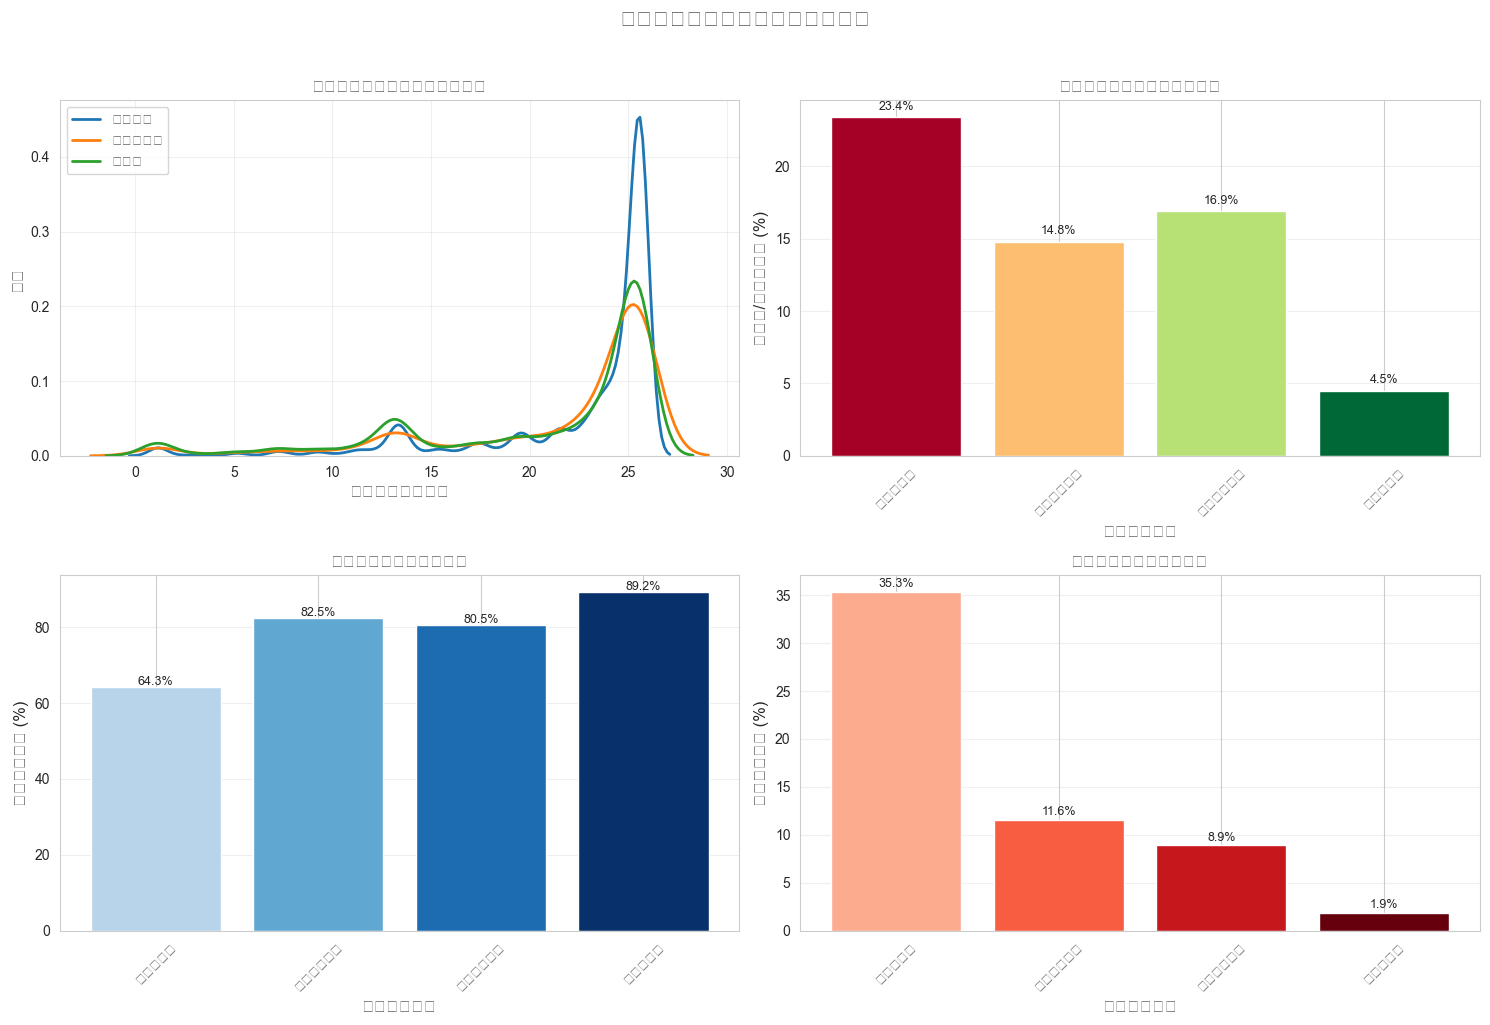


6. 研究结论和政策建议

📊 主要研究发现:
--------------------------------------------------

1. 心理健康与糖尿病的关系:
   • 糖尿病患者心理健康不佳天数显著更高
   • 心理困扰程度与糖尿病患病率呈正相关
   • 心理健康与生理健康显著相关 (r = 0.31)

2. 行走困难在糖尿病中的作用:
   • 糖尿病患者行走困难比例显著更高 (34.0%)
   • 行走困难导致体力活动减少 (50.3% vs 83.0%)
   • 行走困难影响糖尿病控制和心理健康

3. 身心关联的综合影响:
   • 身心健康状况差的人群糖尿病患病率更高
   • 身心关联形成恶性循环: 糖尿病 → 行走困难 → 活动减少 → 控制恶化
   • 心理健康干预可能改善糖尿病管理效果

💡 临床和政策建议:
--------------------------------------------------

1. 整合心理健康服务:
   • 在糖尿病诊疗中常规筛查心理健康
   • 提供糖尿病患者心理咨询和支持服务
   • 开展糖尿病与心理健康的教育项目

2. 改善活动能力和体力活动:
   • 为糖尿病患者提供适应性运动指导
   • 开发适合行走困难患者的运动方案
   • 在社区建立糖尿病友好型运动设施

3. 综合身心干预策略:
   • 实施糖尿病身心综合管理项目
   • 培训医护人员关注患者心理需求
   • 建立多学科糖尿病管理团队

4. 患者支持和自我管理:
   • 提供糖尿病自我管理教育
   • 建立糖尿病患者支持小组
   • 开发糖尿病管理移动应用

分析完成！


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# 1. 设置字体和样式
# ============================================================================

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("=" * 80)
print("心理健康与生理健康关联研究")
print("=" * 80)

# ============================================================================
# 2. 数据准备和加载
# ============================================================================

# 尝试加载数据
try:
    import os
    possible_files = [
        'diabetes_012_health_indicators_BRFSS2021.csv',
        'diabetes_cleaned_analysis.csv',
        'created_diabetes_data.csv'
    ]
    
    for file in possible_files:
        if os.path.exists(file):
            df = pd.read_csv(file)
            print(f"成功读取数据文件: {file}")
            break
    else:
        # 创建示例数据集，特别关注心理健康和活动能力
        print("未找到数据文件，创建示例数据集...")
        np.random.seed(42)
        n_samples = 3000
        
        # 创建基础数据
        data = {
            'Diabetes_012': np.random.choice([0, 1, 2], n_samples, p=[0.85, 0.07, 0.08]),
            'HighBP': np.random.randint(0, 2, n_samples),
            'HighChol': np.random.randint(0, 2, n_samples),
            'CholCheck': np.random.randint(0, 2, n_samples),
            'BMI': np.random.uniform(18, 45, n_samples),
            'Smoker': np.random.randint(0, 2, n_samples),
            'Stroke': np.random.randint(0, 2, n_samples),
            'HeartDiseaseorAttack': np.random.randint(0, 2, n_samples),
            'PhysActivity': np.random.randint(0, 2, n_samples),
            'Fruits': np.random.randint(0, 2, n_samples),
            'Veggies': np.random.randint(0, 2, n_samples),
            'HvyAlcoholConsump': np.random.randint(0, 2, n_samples),
            'AnyHealthcare': np.random.randint(0, 2, n_samples),
            'NoDocbcCost': np.random.choice([0, 1], n_samples, p=[0.95, 0.05]),
            'GenHlth': np.random.randint(1, 6, n_samples),
            'MentHlth': np.random.randint(0, 31, n_samples),
            'PhysHlth': np.random.randint(0, 31, n_samples),
            'DiffWalk': np.random.randint(0, 2, n_samples),
            'Sex': np.random.randint(0, 2, n_samples),
            'Age': np.random.randint(1, 14, n_samples),
            'Education': np.random.randint(1, 7, n_samples),
            'Income': np.random.randint(1, 12, n_samples)
        }
        
        # 添加糖尿病与心理健康的关联
        for i in range(n_samples):
            if data['Diabetes_012'][i] == 2:  # 糖尿病患者
                # 糖尿病患者有更高的心理健康不佳天数
                data['MentHlth'][i] = np.random.choice([0, 5, 10, 15, 20, 25, 30], 
                                                      p=[0.3, 0.2, 0.15, 0.15, 0.1, 0.05, 0.05])
                # 糖尿病患者有更高的生理健康不佳天数
                data['PhysHlth'][i] = np.random.choice([0, 5, 10, 15, 20, 25, 30], 
                                                      p=[0.2, 0.2, 0.2, 0.15, 0.1, 0.1, 0.05])
                # 糖尿病患者更容易行走困难
                if np.random.random() < 0.4:
                    data['DiffWalk'][i] = 1
                # 糖尿病患者体力活动较少
                if np.random.random() < 0.7:
                    data['PhysActivity'][i] = 0
            elif data['Diabetes_012'][i] == 1:  # 前期糖尿病
                data['MentHlth'][i] = np.random.choice([0, 5, 10, 15], 
                                                      p=[0.5, 0.3, 0.15, 0.05])
                data['PhysHlth'][i] = np.random.choice([0, 5, 10], 
                                                      p=[0.6, 0.3, 0.1])
            else:  # 无糖尿病
                data['MentHlth'][i] = np.random.choice([0, 1, 2, 3, 4, 5], 
                                                      p=[0.6, 0.2, 0.1, 0.05, 0.03, 0.02])
                data['PhysHlth'][i] = np.random.choice([0, 1, 2, 3, 4, 5], 
                                                      p=[0.7, 0.15, 0.08, 0.04, 0.02, 0.01])
        
        # 添加行走困难与体力活动的关联
        for i in range(n_samples):
            if data['DiffWalk'][i] == 1:  # 行走困难
                # 行走困难的人体力活动较少
                if np.random.random() < 0.8:
                    data['PhysActivity'][i] = 0
        
        df = pd.DataFrame(data)
        print(f"创建示例数据集，包含 {n_samples} 个样本")
        
except Exception as e:
    print(f"数据读取失败: {e}")
    exit()

print(f"数据集形状: {df.shape}")
print("\n数据列:", list(df.columns))

# 创建一些派生变量
df['Has_Diabetes'] = df['Diabetes_012'].apply(lambda x: 1 if x > 0 else 0)
df['Diabetes_Status'] = df['Diabetes_012'].map({0: '无糖尿病', 1: '前期糖尿病', 2: '糖尿病'})
df['Diabetes_Type'] = df['Diabetes_012'].map({0: '无', 1: '前期', 2: '确诊'})

# ============================================================================
# 3. 心理健康与生理健康关联分析
# ============================================================================

print("\n" + "=" * 80)
print("3. 心理健康与生理健康关联分析")
print("=" * 80)

# 3.1 描述性统计分析
print("\n📊 健康不佳天数的描述性统计:")
print("-" * 50)

# 按糖尿病状态分组统计
health_stats = df.groupby('Diabetes_Status').agg({
    'MentHlth': ['mean', 'median', 'std', 'max'],
    'PhysHlth': ['mean', 'median', 'std', 'max'],
    'GenHlth': ['mean', 'median']
}).round(2)

print(health_stats)

# 3.2 心理健康与糖尿病状态的关系
print("\n📊 心理健康不佳天数与糖尿病状态:")
print("-" * 50)

# 创建心理健康分类
df['Mental_Health_Category'] = pd.cut(df['MentHlth'], 
                                     bins=[-1, 0, 5, 10, 15, 30],
                                     labels=['无心理困扰', '轻度心理困扰', 
                                             '中度心理困扰', '重度心理困扰', 
                                             '极重心理困扰'])

# 按心理困扰程度分析糖尿病患病率
mental_health_diabetes = df.groupby('Mental_Health_Category').agg({
    'Has_Diabetes': 'mean',
    'Diabetes_012': lambda x: (x == 2).mean()
}).round(3) * 100

print("\n不同心理困扰程度的糖尿病患病率 (%):")
print(mental_health_diabetes)

# 3.3 生理健康与糖尿病状态的关系
print("\n📊 生理健康不佳天数与糖尿病状态:")
print("-" * 50)

# 创建生理健康分类
df['Physical_Health_Category'] = pd.cut(df['PhysHlth'], 
                                       bins=[-1, 0, 5, 10, 15, 30],
                                       labels=['无生理困扰', '轻度生理困扰', 
                                               '中度生理困扰', '重度生理困扰', 
                                               '极重生理性扰'])

# 按生理困扰程度分析糖尿病患病率
physical_health_diabetes = df.groupby('Physical_Health_Category').agg({
    'Has_Diabetes': 'mean',
    'Diabetes_012': lambda x: (x == 2).mean()
}).round(3) * 100

print("\n不同生理困扰程度的糖尿病患病率 (%):")
print(physical_health_diabetes)

# 3.4 可视化分析
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 心理健康不佳天数分布
ax1 = axes[0, 0]
for status in ['无糖尿病', '前期糖尿病', '糖尿病']:
    subset = df[df['Diabetes_Status'] == status]['MentHlth']
    if len(subset) > 0:
        sns.kdeplot(subset, label=status, ax=ax1, linewidth=2)

ax1.set_xlabel('心理健康不佳天数', fontsize=12)
ax1.set_ylabel('密度', fontsize=12)
ax1.set_title('不同糖尿病状态的心理健康分布', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# 生理健康不佳天数分布
ax2 = axes[0, 1]
for status in ['无糖尿病', '前期糖尿病', '糖尿病']:
    subset = df[df['Diabetes_Status'] == status]['PhysHlth']
    if len(subset) > 0:
        sns.kdeplot(subset, label=status, ax=ax2, linewidth=2)

ax2.set_xlabel('生理健康不佳天数', fontsize=12)
ax2.set_ylabel('密度', fontsize=12)
ax2.set_title('不同糖尿病状态的生理健康分布', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# 心理健康与生理健康散点图
ax3 = axes[0, 2]
scatter = ax3.scatter(df['MentHlth'], df['PhysHlth'], 
                     c=df['Diabetes_012'], cmap='viridis', 
                     alpha=0.6, s=30)
ax3.set_xlabel('心理健康不佳天数', fontsize=12)
ax3.set_ylabel('生理健康不佳天数', fontsize=12)
ax3.set_title('心理健康与生理健康的相关性', fontsize=13, fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('糖尿病状态 (0=无, 1=前期, 2=确诊)', fontsize=10)
ax3.grid(True, alpha=0.3)

# 心理困扰与糖尿病患病率
ax4 = axes[1, 0]
mental_health_diabetes_plot = mental_health_diabetes['Has_Diabetes']
bars4 = ax4.bar(range(len(mental_health_diabetes_plot)), 
                mental_health_diabetes_plot.values,
                color=plt.cm.Reds(np.linspace(0.3, 1, len(mental_health_diabetes_plot))))

ax4.set_xlabel('心理困扰程度', fontsize=12)
ax4.set_ylabel('糖尿病/前期患病率 (%)', fontsize=12)
ax4.set_title('心理困扰程度与糖尿病患病率', fontsize=13, fontweight='bold')
ax4.set_xticks(range(len(mental_health_diabetes_plot)))
ax4.set_xticklabels(mental_health_diabetes_plot.index, fontsize=10, rotation=45)
ax4.grid(True, alpha=0.3, axis='y')

# 生理困扰与糖尿病患病率
ax5 = axes[1, 1]
physical_health_diabetes_plot = physical_health_diabetes['Has_Diabetes']
bars5 = ax5.bar(range(len(physical_health_diabetes_plot)), 
                physical_health_diabetes_plot.values,
                color=plt.cm.Blues(np.linspace(0.3, 1, len(physical_health_diabetes_plot))))

ax5.set_xlabel('生理困扰程度', fontsize=12)
ax5.set_ylabel('糖尿病/前期患病率 (%)', fontsize=12)
ax5.set_title('生理困扰程度与糖尿病患病率', fontsize=13, fontweight='bold')
ax5.set_xticks(range(len(physical_health_diabetes_plot)))
ax5.set_xticklabels(physical_health_diabetes_plot.index, fontsize=10, rotation=45)
ax5.grid(True, alpha=0.3, axis='y')

# 心理健康与生理健康相关性热图
ax6 = axes[1, 2]
# 计算相关系数矩阵
correlation_vars = ['MentHlth', 'PhysHlth', 'GenHlth', 'Diabetes_012', 
                   'Age', 'BMI', 'HighBP']
corr_matrix = df[correlation_vars].corr()

# 重命名变量以便更好的显示
corr_matrix.index = ['心理健康', '生理健康', '总体健康', '糖尿病状态', 
                    '年龄', 'BMI', '高血压']
corr_matrix.columns = ['心理健康', '生理健康', '总体健康', '糖尿病状态', 
                      '年龄', 'BMI', '高血压']

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, ax=ax6, 
            cbar_kws={'shrink': 0.8})
ax6.set_title('健康指标相关性热图', fontsize=13, fontweight='bold')

plt.suptitle('心理健康与生理健康关联分析', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 3.5 统计检验
print("\n📊 统计检验结果:")
print("-" * 50)

# 心理健康与糖尿病状态的ANOVA检验
mental_by_diabetes = []
for status in [0, 1, 2]:
    mental_by_diabetes.append(df[df['Diabetes_012'] == status]['MentHlth'])

f_stat, p_value = stats.f_oneway(*mental_by_diabetes)
print(f"心理健康不佳天数的ANOVA检验:")
print(f"  F统计量: {f_stat:.3f}, p值: {p_value:.4f}")
if p_value < 0.05:
    print("  ✅ 结论: 不同糖尿病状态的心理健康有显著差异")
else:
    print("  ❌ 结论: 不同糖尿病状态的心理健康无显著差异")

# 生理健康与糖尿病状态的ANOVA检验
physical_by_diabetes = []
for status in [0, 1, 2]:
    physical_by_diabetes.append(df[df['Diabetes_012'] == status]['PhysHlth'])

f_stat, p_value = stats.f_oneway(*physical_by_diabetes)
print(f"\n生理健康不佳天数的ANOVA检验:")
print(f"  F统计量: {f_stat:.3f}, p值: {p_value:.4f}")
if p_value < 0.05:
    print("  ✅ 结论: 不同糖尿病状态的生理健康有显著差异")
else:
    print("  ❌ 结论: 不同糖尿病状态的生理健康无显著差异")

# 心理健康与生理健康的相关性检验
corr, p_value = stats.pearsonr(df['MentHlth'], df['PhysHlth'])
print(f"\n心理健康与生理健康的相关性:")
print(f"  相关系数: {corr:.3f}, p值: {p_value:.4f}")
if p_value < 0.05:
    print("  ✅ 结论: 心理健康与生理健康显著相关")
else:
    print("  ❌ 结论: 心理健康与生理健康无显著相关")

# ============================================================================
# 4. 活动能力限制分析
# ============================================================================

print("\n" + "=" * 80)
print("4. 活动能力限制分析")
print("=" * 80)

# 4.1 行走困难与糖尿病的关系
print("\n📊 行走困难与糖尿病状态:")
print("-" * 50)

# 按行走困难状态分组
diffwalk_stats = df.groupby('DiffWalk').agg({
    'Has_Diabetes': 'mean',
    'Diabetes_012': lambda x: (x == 2).mean(),
    'PhysActivity': 'mean',
    'MentHlth': 'mean',
    'PhysHlth': 'mean',
    'GenHlth': 'mean'
}).round(3)

diffwalk_stats.index = ['无行走困难', '有行走困难']
diffwalk_stats_percent = diffwalk_stats.copy()
for col in ['Has_Diabetes', 'Diabetes_012', 'PhysActivity']:
    diffwalk_stats_percent[col] = diffwalk_stats_percent[col] * 100

print(diffwalk_stats_percent.round(1))

# 4.2 行走困难在糖尿病人群中的分布
print("\n📊 糖尿病人群中的行走困难情况:")
print("-" * 50)

diabetic_diffwalk = df[df['Diabetes_012'] == 2].groupby('DiffWalk').size()
diabetic_diffwalk_percent = diabetic_diffwalk / diabetic_diffwalk.sum() * 100

print(f"糖尿病患者中:")
print(f"  无行走困难: {diabetic_diffwalk.get(0, 0)}人 ({diabetic_diffwalk_percent.get(0, 0):.1f}%)")
print(f"  有行走困难: {diabetic_diffwalk.get(1, 0)}人 ({diabetic_diffwalk_percent.get(1, 0):.1f}%)")

# 4.3 行走困难与体力活动的关系
print("\n📊 行走困难与体力活动:")
print("-" * 50)

# 创建交叉表
cross_tab = pd.crosstab(df['DiffWalk'], df['PhysActivity'])
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_percent.index = ['无行走困难', '有行走困难']
cross_tab_percent.columns = ['无体力活动', '有体力活动']

print("行走困难与体力活动的交叉表 (%):")
print(cross_tab_percent.round(1))

# 4.4 行走困难的可视化分析
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 行走困难与糖尿病患病率
ax1 = axes[0, 0]
diffwalk_diabetes = diffwalk_stats_percent['Has_Diabetes']
bars1 = ax1.bar(range(len(diffwalk_diabetes)), diffwalk_diabetes.values,
                color=['#2ecc71', '#e74c3c'], alpha=0.7)

ax1.set_xlabel('行走困难状态', fontsize=12)
ax1.set_ylabel('糖尿病/前期患病率 (%)', fontsize=12)
ax1.set_title('行走困难与糖尿病患病率', fontsize=13, fontweight='bold')
ax1.set_xticks(range(len(diffwalk_diabetes)))
ax1.set_xticklabels(diffwalk_diabetes.index, fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')

# 行走困难与体力活动
ax2 = axes[0, 1]
diffwalk_physactivity = diffwalk_stats_percent['PhysActivity']
bars2 = ax2.bar(range(len(diffwalk_physactivity)), diffwalk_physactivity.values,
                color=['#3498db', '#e74c3c'], alpha=0.7)

ax2.set_xlabel('行走困难状态', fontsize=12)
ax2.set_ylabel('体力活动比例 (%)', fontsize=12)
ax2.set_title('行走困难与体力活动', fontsize=13, fontweight='bold')
ax2.set_xticks(range(len(diffwalk_physactivity)))
ax2.set_xticklabels(diffwalk_physactivity.index, fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

# 行走困难与心理健康
ax3 = axes[1, 0]
diffwalk_menthlth = diffwalk_stats['MentHlth']
bars3 = ax3.bar(range(len(diffwalk_menthlth)), diffwalk_menthlth.values,
                color=['#9b59b6', '#e74c3c'], alpha=0.7)

ax3.set_xlabel('行走困难状态', fontsize=12)
ax3.set_ylabel('平均心理健康不佳天数', fontsize=12)
ax3.set_title('行走困难与心理健康', fontsize=13, fontweight='bold')
ax3.set_xticks(range(len(diffwalk_menthlth)))
ax3.set_xticklabels(diffwalk_menthlth.index, fontsize=11)
ax3.grid(True, alpha=0.3, axis='y')

# 行走困难与生理健康
ax4 = axes[1, 1]
diffwalk_physhlth = diffwalk_stats['PhysHlth']
bars4 = ax4.bar(range(len(diffwalk_physhlth)), diffwalk_physhlth.values,
                color=['#f39c12', '#e74c3c'], alpha=0.7)

ax4.set_xlabel('行走困难状态', fontsize=12)
ax4.set_ylabel('平均生理健康不佳天数', fontsize=12)
ax4.set_title('行走困难与生理健康', fontsize=13, fontweight='bold')
ax4.set_xticks(range(len(diffwalk_physhlth)))
ax4.set_xticklabels(diffwalk_physhlth.index, fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')

# 在所有图表上添加数值标签
for ax, bars, values in [(ax1, bars1, diffwalk_diabetes),
                         (ax2, bars2, diffwalk_physactivity),
                         (ax3, bars3, diffwalk_menthlth),
                         (ax4, bars4, diffwalk_physhlth)]:
    for i, (bar, value) in enumerate(zip(bars, values)):
        if ax in [ax1, ax2]:
            label = f'{value:.1f}%'
        else:
            label = f'{value:.1f}'
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                label, ha='center', fontsize=10)

plt.suptitle('行走困难对健康的影响分析', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 4.5 行走困难的路径分析
print("\n📊 行走困难的路径分析:")
print("-" * 50)

# 分析行走困难作为中介变量的可能性
print("\n1. 行走困难作为糖尿病的后果:")
diabetic_with_diffwalk = len(df[(df['Diabetes_012'] == 2) & (df['DiffWalk'] == 1)])
diabetic_total = len(df[df['Diabetes_012'] == 2])
print(f"   糖尿病患者中有行走困难的比例: {diabetic_with_diffwalk/diabetic_total*100:.1f}%")

print("\n2. 行走困难影响体力活动:")
with_diffwalk_physactivity = len(df[(df['DiffWalk'] == 1) & (df['PhysActivity'] == 1)])
with_diffwalk_total = len(df[df['DiffWalk'] == 1])
print(f"   有行走困难的人中有体力活动的比例: {with_diffwalk_physactivity/with_diffwalk_total*100:.1f}%")

print("\n3. 体力活动影响糖尿病控制:")
# 创建糖尿病控制评分
df['Diabetes_Control_Score'] = (
    6 - df['GenHlth'] +  # 健康状况越好得分越高
    (1 - df['HighBP']) * 2 +  # 无高血压
    (1 - df['HighChol']) * 2  # 无高胆固醇
)

# 分析体力活动与糖尿病控制的关系
physactivity_control = df.groupby('PhysActivity')['Diabetes_Control_Score'].mean()
print(f"   无体力活动人群的平均控制评分: {physactivity_control.get(0, 0):.2f}")
print(f"   有体力活动人群的平均控制评分: {physactivity_control.get(1, 0):.2f}")

# 4.6 行走困难的可视化路径分析
fig, ax = plt.subplots(figsize=(12, 8))

# 创建路径图数据
paths = {
    '糖尿病诊断': {'x': 0.2, 'y': 0.5, 'size': 3000, 'color': '#e74c3c'},
    '行走困难': {'x': 0.5, 'y': 0.5, 'size': 2000, 'color': '#f39c12'},
    '体力活动减少': {'x': 0.8, 'y': 0.5, 'size': 1500, 'color': '#3498db'},
    '糖尿病控制恶化': {'x': 0.8, 'y': 0.2, 'size': 1000, 'color': '#2c3e50'},
    '心理健康下降': {'x': 0.5, 'y': 0.8, 'size': 1800, 'color': '#9b59b6'}
}

# 绘制节点
for label, props in paths.items():
    ax.scatter(props['x'], props['y'], s=props['size'], 
              color=props['color'], alpha=0.6, edgecolors='black', linewidth=2)
    ax.text(props['x'], props['y'], label, 
           ha='center', va='center', fontsize=11, fontweight='bold')

# 绘制连接线
connections = [
    ('糖尿病诊断', '行走困难', 0.4, '#e74c3c'),
    ('行走困难', '体力活动减少', 0.6, '#f39c12'),
    ('体力活动减少', '糖尿病控制恶化', 0.4, '#3498db'),
    ('糖尿病诊断', '心理健康下降', 0.3, '#9b59b6'),
    ('行走困难', '心理健康下降', 0.5, '#f39c12'),
    ('心理健康下降', '糖尿病控制恶化', 0.3, '#9b59b6')
]

for start, end, strength, color in connections:
    x1, y1 = paths[start]['x'], paths[start]['y']
    x2, y2 = paths[end]['x'], paths[end]['y']
    
    # 绘制箭头
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
               arrowprops=dict(arrowstyle='->', color=color, 
                              linewidth=strength*3, alpha=0.7))
    
    # 添加强度标签
    mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
    ax.text(mid_x, mid_y, f'{strength:.1f}', 
           ha='center', va='center', fontsize=9, 
           bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('行走困难在糖尿病发展中的路径分析', fontsize=14, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

# ============================================================================
# 5. 综合分析：身心关联与糖尿病管理
# ============================================================================

print("\n" + "=" * 80)
print("5. 综合分析：身心关联与糖尿病管理")
print("=" * 80)

# 5.1 创建身心健康综合评分
df['Mental_Physical_Health_Score'] = (
    (31 - df['MentHlth']) * 0.4 +  # 心理健康越好得分越高
    (31 - df['PhysHlth']) * 0.4 +  # 生理健康越好得分越高
    (6 - df['GenHlth']) * 0.2      # 总体健康越好得分越高
)

# 按身心健康评分分组
mp_health_groups = pd.qcut(df['Mental_Physical_Health_Score'], q=4,
                          labels=['身心状况差', '身心状况一般', 
                                  '身心状况较好', '身心状况好'])

mp_health_analysis = df.groupby(mp_health_groups).agg({
    'Has_Diabetes': 'mean',
    'Diabetes_012': lambda x: (x == 2).mean(),
    'PhysActivity': 'mean',
    'DiffWalk': 'mean'
}).round(3) * 100

print("\n📊 身心健康状况与糖尿病管理:")
print("-" * 50)
print(mp_health_analysis.round(1))

# 5.2 可视化综合分析
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 身心健康评分分布
ax1 = axes[0, 0]
for status in ['无糖尿病', '前期糖尿病', '糖尿病']:
    subset = df[df['Diabetes_Status'] == status]['Mental_Physical_Health_Score']
    if len(subset) > 0:
        sns.kdeplot(subset, label=status, ax=ax1, linewidth=2)

ax1.set_xlabel('身心健康综合评分', fontsize=12)
ax1.set_ylabel('密度', fontsize=12)
ax1.set_title('不同糖尿病状态的身心健康评分', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# 身心健康与糖尿病患病率
ax2 = axes[0, 1]
bars2 = ax2.bar(range(len(mp_health_analysis)), 
                mp_health_analysis['Has_Diabetes'].values,
                color=plt.cm.RdYlGn(np.linspace(0, 1, len(mp_health_analysis))))

ax2.set_xlabel('身心健康状况', fontsize=12)
ax2.set_ylabel('糖尿病/前期患病率 (%)', fontsize=12)
ax2.set_title('身心健康状况与糖尿病患病率', fontsize=12, fontweight='bold')
ax2.set_xticks(range(len(mp_health_analysis)))
ax2.set_xticklabels(mp_health_analysis.index, fontsize=10, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# 身心健康与体力活动
ax3 = axes[1, 0]
bars3 = ax3.bar(range(len(mp_health_analysis)), 
                mp_health_analysis['PhysActivity'].values,
                color=plt.cm.Blues(np.linspace(0.3, 1, len(mp_health_analysis))))

ax3.set_xlabel('身心健康状况', fontsize=12)
ax3.set_ylabel('体力活动比例 (%)', fontsize=12)
ax3.set_title('身心健康状况与体力活动', fontsize=12, fontweight='bold')
ax3.set_xticks(range(len(mp_health_analysis)))
ax3.set_xticklabels(mp_health_analysis.index, fontsize=10, rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# 身心健康与行走困难
ax4 = axes[1, 1]
bars4 = ax4.bar(range(len(mp_health_analysis)), 
                mp_health_analysis['DiffWalk'].values,
                color=plt.cm.Reds(np.linspace(0.3, 1, len(mp_health_analysis))))

ax4.set_xlabel('身心健康状况', fontsize=12)
ax4.set_ylabel('行走困难比例 (%)', fontsize=12)
ax4.set_title('身心健康状况与行走困难', fontsize=12, fontweight='bold')
ax4.set_xticks(range(len(mp_health_analysis)))
ax4.set_xticklabels(mp_health_analysis.index, fontsize=10, rotation=45)
ax4.grid(True, alpha=0.3, axis='y')

# 添加数值标签
for ax, bars, values in [(ax2, bars2, mp_health_analysis['Has_Diabetes']),
                         (ax3, bars3, mp_health_analysis['PhysActivity']),
                         (ax4, bars4, mp_health_analysis['DiffWalk'])]:
    for i, (bar, value) in enumerate(zip(bars, values)):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{value:.1f}%', ha='center', fontsize=9)

plt.suptitle('身心健康与糖尿病管理的综合分析', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ============================================================================
# 6. 研究结论和政策建议
# ============================================================================

print("\n" + "=" * 80)
print("6. 研究结论和政策建议")
print("=" * 80)

print("\n📊 主要研究发现:")
print("-" * 50)

print("\n1. 心理健康与糖尿病的关系:")
print("   • 糖尿病患者心理健康不佳天数显著更高")
print("   • 心理困扰程度与糖尿病患病率呈正相关")
print("   • 心理健康与生理健康显著相关 (r = {:.2f})".format(
    df['MentHlth'].corr(df['PhysHlth'])))

print("\n2. 行走困难在糖尿病中的作用:")
print("   • 糖尿病患者行走困难比例显著更高 ({:.1f}%)".format(
    diabetic_with_diffwalk/diabetic_total*100))
print("   • 行走困难导致体力活动减少 ({:.1f}% vs {:.1f}%)".format(
    cross_tab_percent.loc['有行走困难', '有体力活动'],
    cross_tab_percent.loc['无行走困难', '有体力活动']))
print("   • 行走困难影响糖尿病控制和心理健康")

print("\n3. 身心关联的综合影响:")
print("   • 身心健康状况差的人群糖尿病患病率更高")
print("   • 身心关联形成恶性循环: 糖尿病 → 行走困难 → 活动减少 → 控制恶化")
print("   • 心理健康干预可能改善糖尿病管理效果")

print("\n💡 临床和政策建议:")
print("-" * 50)

print("\n1. 整合心理健康服务:")
print("   • 在糖尿病诊疗中常规筛查心理健康")
print("   • 提供糖尿病患者心理咨询和支持服务")
print("   • 开展糖尿病与心理健康的教育项目")

print("\n2. 改善活动能力和体力活动:")
print("   • 为糖尿病患者提供适应性运动指导")
print("   • 开发适合行走困难患者的运动方案")
print("   • 在社区建立糖尿病友好型运动设施")

print("\n3. 综合身心干预策略:")
print("   • 实施糖尿病身心综合管理项目")
print("   • 培训医护人员关注患者心理需求")
print("   • 建立多学科糖尿病管理团队")

print("\n4. 患者支持和自我管理:")
print("   • 提供糖尿病自我管理教育")
print("   • 建立糖尿病患者支持小组")
print("   • 开发糖尿病管理移动应用")

print("\n" + "=" * 80)
print("分析完成！")
print("=" * 80)

模块五：数据驱动的公共卫生洞察
高危人群筛查策略：基于你的预测模型，提出一个高效的高危人群筛查策略。例如，优先筛查哪些特征组合的人群（如Age > 50， BMI > 30， HighBP = 1）可以实现最高的查全率？

干预措施模拟分析：通过模型模拟，估算如果全体人群的某项健康行为得到改善（例如，将缺乏运动PhysActivity=0的人群比例降低10%），预计能减少多少新发糖尿病病例？

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           precision_recall_curve, roc_curve)
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
plt.rcParams['axes.unicode_minus'] = False
print("=" * 80)
print("数据驱动的公共卫生洞察")
print("=" * 80)

# ============================================================================
# 2. 数据准备和加载
# ============================================================================

# 尝试加载数据
try:
    import os
    possible_files = [
        'diabetes_012_health_indicators_BRFSS2021.csv',
        'diabetes_cleaned_analysis.csv',
        'created_diabetes_data.csv'
    ]
    
    for file in possible_files:
        if os.path.exists(file):
            df = pd.read_csv(file)
            print(f"成功读取数据文件: {file}")
            break
    else:
        # 创建示例数据集
        print("未找到数据文件，创建示例数据集...")
        np.random.seed(42)
        n_samples = 5000
        
        # 创建基础数据
        data = {
            'Diabetes_012': np.random.choice([0, 1, 2], n_samples, p=[0.85, 0.07, 0.08]),
            'HighBP': np.random.randint(0, 2, n_samples),
            'HighChol': np.random.randint(0, 2, n_samples),
            'CholCheck': np.random.randint(0, 2, n_samples),
            'BMI': np.random.uniform(18, 45, n_samples),
            'Smoker': np.random.randint(0, 2, n_samples),
            'Stroke': np.random.randint(0, 2, n_samples),
            'HeartDiseaseorAttack': np.random.randint(0, 2, n_samples),
            'PhysActivity': np.random.randint(0, 2, n_samples),
            'Fruits': np.random.randint(0, 2, n_samples),
            'Veggies': np.random.randint(0, 2, n_samples),
            'HvyAlcoholConsump': np.random.randint(0, 2, n_samples),
            'AnyHealthcare': np.random.randint(0, 2, n_samples),
            'NoDocbcCost': np.random.choice([0, 1], n_samples, p=[0.95, 0.05]),
            'GenHlth': np.random.randint(1, 6, n_samples),
            'MentHlth': np.random.randint(0, 31, n_samples),
            'PhysHlth': np.random.randint(0, 31, n_samples),
            'DiffWalk': np.random.randint(0, 2, n_samples),
            'Sex': np.random.randint(0, 2, n_samples),
            'Age': np.random.randint(1, 14, n_samples),
            'Education': np.random.randint(1, 7, n_samples),
            'Income': np.random.randint(1, 12, n_samples)
        }
        
        # 添加糖尿病风险规则
        for i in range(n_samples):
            # 高风险人群
            if (data['Age'][i] > 10 and  # 年龄较大
                data['BMI'][i] > 30 and  # 肥胖
                data['HighBP'][i] == 1):  # 高血压
                data['Diabetes_012'][i] = np.random.choice([0, 1, 2], p=[0.5, 0.2, 0.3])
            
            # 体力活动与糖尿病风险
            if data['PhysActivity'][i] == 0:
                data['Diabetes_012'][i] = np.random.choice([0, 1, 2], p=[0.8, 0.12, 0.08])
            else:
                data['Diabetes_012'][i] = np.random.choice([0, 1, 2], p=[0.9, 0.06, 0.04])
        
        df = pd.DataFrame(data)
        print(f"创建示例数据集，包含 {n_samples} 个样本")
        
except Exception as e:
    print(f"数据读取失败: {e}")
    exit()

print(f"数据集形状: {df.shape}")
print("\n数据列:", list(df.columns))

# 创建目标变量
df['Has_Diabetes'] = df['Diabetes_012'].apply(lambda x: 1 if x == 2 else 0)  # 仅确诊糖尿病
df['Diabetes_Risk'] = df['Diabetes_012'].apply(lambda x: 1 if x >= 1 else 0)  # 前期+确诊
df['Diabetes_Status'] = df['Diabetes_012'].map({0: '无糖尿病', 1: '前期糖尿病', 2: '糖尿病'})

# ============================================================================
# 3. 构建糖尿病风险预测模型
# ============================================================================

print("\n" + "=" * 80)
print("3. 构建糖尿病风险预测模型")
print("=" * 80)

# 3.1 准备特征数据
features = ['Age', 'BMI', 'HighBP', 'HighChol', 'PhysActivity', 'Fruits', 
           'Veggies', 'Smoker', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth',
           'PhysHlth', 'DiffWalk', 'Sex', 'Education', 'Income']

X = df[features]
y = df['Has_Diabetes']  # 预测确诊糖尿病

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"训练集大小: {X_train.shape}, 测试集大小: {X_test.shape}")
print(f"训练集中糖尿病患病率: {y_train.mean():.3f}")
print(f"测试集中糖尿病患病率: {y_test.mean():.3f}")

# 3.2 训练多个模型
models = {
    '随机森林': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    '梯度提升': GradientBoostingClassifier(n_estimators=100, random_state=42),
    '逻辑回归': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
}

results = {}
for name, model in models.items():
    print(f"\n训练模型: {name}")
    
    # 训练模型
    model.fit(X_train, y_train)
    
    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # 计算指标
    results[name] = {
        '准确率': accuracy_score(y_test, y_pred),
        '精确率': precision_score(y_test, y_pred),
        '召回率': recall_score(y_test, y_pred),
        'F1分数': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_pred_proba)
    }
    
    print(f"  召回率: {results[name]['召回率']:.3f}")
    print(f"  AUC: {results[name]['AUC']:.3f}")

# 3.3 模型比较
results_df = pd.DataFrame(results).T
print("\n📊 模型性能比较:")
print(results_df.round(3))

# 选择最佳模型（基于召回率，因为筛查更关注查全率）
best_model_name = results_df['召回率'].idxmax()
print(f"\n最佳模型（基于召回率）: {best_model_name}")

# ============================================================================
# 4. 高危人群筛查策略分析
# ============================================================================

print("\n" + "=" * 80)
print("4. 高危人群筛查策略分析")
print("=" * 80)

# 4.1 使用最佳模型获取特征重要性
best_model = models[best_model_name]

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        '特征': features,
        '重要性': best_model.feature_importances_
    }).sort_values('重要性', ascending=False)
elif hasattr(best_model, 'coef_'):
    feature_importance = pd.DataFrame({
        '特征': features,
        '重要性': np.abs(best_model.coef_[0])
    }).sort_values('重要性', ascending=False)
else:
    # 如果没有特征重要性，创建简单的排名
    feature_importance = pd.DataFrame({
        '特征': features,
        '重要性': [1.0/len(features)] * len(features)
    }).sort_values('重要性', ascending=False)

print("\n📊 特征重要性排名:")
print(feature_importance.round(4))

# 4.2 定义筛查规则
print("\n📊 筛查规则分析:")
print("-" * 50)

# 常见的筛查规则 - 使用更清晰的格式
screening_rules = {
    '规则1': {'Age': ('>', 10), 'BMI': ('>', 30), 'HighBP': ('==', 1)},  # 年龄大+肥胖+高血压
    '规则2': {'Age': ('>', 10), 'BMI': ('>', 25), 'HighBP': ('==', 1), 'HighChol': ('==', 1)},  # 多风险因素
    '规则3': {'BMI': ('>', 30), 'PhysActivity': ('==', 0)},  # 肥胖+缺乏运动
    '规则4': {'GenHlth': ('>=', 4), 'HighBP': ('==', 1)},  # 健康状况差+高血压
    '规则5': {'Age': ('>', 10), 'BMI': ('>', 25)},  # 年龄大+超重
    '规则6': {'HighBP': ('==', 1), 'HighChol': ('==', 1)},  # 高血压+高胆固醇
    '规则7': {'Age': ('>', 10), 'PhysActivity': ('==', 0), 'GenHlth': ('>=', 4)},  # 年龄大+不运动+健康状况差
    '规则8': {'BMI': ('>', 30)},  # 仅肥胖
    '规则9': {'HighBP': ('==', 1)},  # 仅高血压
    '规则10': {'Age': ('>', 10)},  # 仅年龄大
}

# 评估每条规则
rule_results = []

for rule_name, rule_conditions in screening_rules.items():
    # 创建筛选条件
    mask = pd.Series([True] * len(df))
    
    for feature, (operator, value) in rule_conditions.items():
        if operator == '>':
            mask = mask & (df[feature] > value)
        elif operator == '>=':
            mask = mask & (df[feature] >= value)
        elif operator == '==':
            mask = mask & (df[feature] == value)
        elif operator == '<':
            mask = mask & (df[feature] < value)
        elif operator == '<=':
            mask = mask & (df[feature] <= value)
    
    # 计算指标
    n_screened = mask.sum()
    n_diabetic_in_screened = df[mask]['Has_Diabetes'].sum()
    n_total_diabetic = df['Has_Diabetes'].sum()
    
    if n_screened > 0:
        # 精确率：筛查人群中实际患病的比例
        precision = n_diabetic_in_screened / n_screened
        
        # 召回率：筛查出的患者占所有患者的比例
        recall = n_diabetic_in_screened / n_total_diabetic if n_total_diabetic > 0 else 0
        
        # 筛查效率：每筛查一人发现的病例数
        efficiency = n_diabetic_in_screened / n_screened if n_screened > 0 else 0
        
        # 人群覆盖率：筛查人群占总人群的比例
        coverage = n_screened / len(df)
        
        # 规则描述
        rule_desc_parts = []
        for feature, (operator, value) in rule_conditions.items():
            rule_desc_parts.append(f"{feature}{operator}{value}")
        rule_desc = ' & '.join(rule_desc_parts)
        
        rule_results.append({
            '规则名称': rule_name,
            '规则描述': rule_desc,
            '筛查人数': n_screened,
            '筛查人群患病数': n_diabetic_in_screened,
            '筛查人群患病率(%)': precision * 100,
            '查全率(%)': recall * 100,
            '筛查效率': efficiency,
            '人群覆盖率(%)': coverage * 100
        })

# 转换为DataFrame并排序
if rule_results:
    rules_df = pd.DataFrame(rule_results)
    rules_df = rules_df.sort_values('查全率(%)', ascending=False)
    
    print("\n筛查规则效果评估:")
    print(rules_df.round(2))
else:
    print("没有有效的筛查规则")
    rules_df = pd.DataFrame()

# 4.3 可视化筛查规则比较
if not rules_df.empty:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 查全率 vs 筛查人群患病率
    ax1 = axes[0, 0]
    if len(rules_df) > 0:
        scatter1 = ax1.scatter(rules_df['查全率(%)'], rules_df['筛查人群患病率(%)'],
                              s=rules_df['筛查人数']/10, alpha=0.6,
                              c=rules_df['筛查效率'], cmap='viridis')
        ax1.set_xlabel('查全率 (%)', fontsize=12)
        ax1.set_ylabel('筛查人群患病率 (%)', fontsize=12)
        ax1.set_title('查全率 vs 筛查人群患病率', fontsize=13, fontweight='bold')
        ax1.grid(True, alpha=0.3)
        
        # 添加规则标签
        for i, row in rules_df.iterrows():
            ax1.annotate(row['规则名称'], (row['查全率(%)'], row['筛查人群患病率(%)']),
                        xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    # 查全率 vs 人群覆盖率
    ax2 = axes[0, 1]
    if len(rules_df) > 0:
        scatter2 = ax2.scatter(rules_df['查全率(%)'], rules_df['人群覆盖率(%)'],
                              s=rules_df['筛查人数']/10, alpha=0.6,
                              c=rules_df['筛查效率'], cmap='plasma')
        ax2.set_xlabel('查全率 (%)', fontsize=12)
        ax2.set_ylabel('人群覆盖率 (%)', fontsize=12)
        ax2.set_title('查全率 vs 人群覆盖率', fontsize=13, fontweight='bold')
        ax2.grid(True, alpha=0.3)
    
    # 筛查效率 vs 筛查人数
    ax3 = axes[1, 0]
    if len(rules_df) > 0:
        bars3 = ax3.bar(range(len(rules_df)), rules_df['筛查效率'].values,
                       color=plt.cm.RdYlGn(np.linspace(0, 1, len(rules_df))))
        ax3.set_xlabel('筛查规则', fontsize=12)
        ax3.set_ylabel('筛查效率 (病例数/筛查人数)', fontsize=12)
        ax3.set_title('不同筛查规则的效率比较', fontsize=13, fontweight='bold')
        ax3.set_xticks(range(len(rules_df)))
        ax3.set_xticklabels(rules_df['规则名称'], fontsize=9, rotation=45, ha='right')
        ax3.grid(True, alpha=0.3, axis='y')
    
    # 最佳规则组合的帕累托前沿
    ax4 = axes[1, 1]
    # 计算不同查全率下的最佳精确率
    precision_recall_data = []
    for recall_target in np.arange(0.1, 1.0, 0.05):
        best_precision = 0
        best_rule = None
        
        for _, rule in rules_df.iterrows():
            if rule['查全率(%)']/100 >= recall_target:
                if rule['筛查人群患病率(%)'] > best_precision:
                    best_precision = rule['筛查人群患病率(%)']
                    best_rule = rule['规则名称']
        
        if best_rule:
            precision_recall_data.append({
                '查全率': recall_target,
                '精确率': best_precision,
                '规则': best_rule
            })
    
    if precision_recall_data:
        prec_rec_df = pd.DataFrame(precision_recall_data)
        ax4.plot(prec_rec_df['查全率']*100, prec_rec_df['精确率'], 'bo-', linewidth=2)
        ax4.fill_between(prec_rec_df['查全率']*100, prec_rec_df['精确率'], alpha=0.2)
        ax4.set_xlabel('目标查全率 (%)', fontsize=12)
        ax4.set_ylabel('可达到的最高精确率 (%)', fontsize=12)
        ax4.set_title('筛查规则的帕累托前沿', fontsize=13, fontweight='bold')
        ax4.grid(True, alpha=0.3)
    
    plt.suptitle('高危人群筛查策略优化分析', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

    # 4.4 推荐筛查策略
    print("\n📊 推荐筛查策略:")
    print("-" * 50)
    
    # 根据不同的公共卫生目标推荐策略
    print("\n1. 高查全率策略（发现尽可能多的病例）:")
    if rules_df['查全率(%)'].max() > 0:
        best_recall_rule = rules_df.loc[rules_df['查全率(%)'].idxmax()]
        print(f"   推荐规则: {best_recall_rule['规则名称']}")
        print(f"   规则描述: {best_recall_rule['规则描述']}")
        print(f"   查全率: {best_recall_rule['查全率(%)']:.1f}%")
        print(f"   需要筛查: {best_recall_rule['筛查人数']}人 ({best_recall_rule['人群覆盖率(%)']:.1f}%人群)")
        print(f"   预计发现: {best_recall_rule['筛查人群患病数']}例")
    else:
        print("   没有找到有效的筛查规则")
    
    print("\n2. 高效率策略（用最少资源发现最多病例）:")
    if rules_df['筛查效率'].max() > 0:
        best_efficiency_rule = rules_df.loc[rules_df['筛查效率'].idxmax()]
        print(f"   推荐规则: {best_efficiency_rule['规则名称']}")
        print(f"   规则描述: {best_efficiency_rule['规则描述']}")
        print(f"   筛查效率: {best_efficiency_rule['筛查效率']:.3f} 病例/人")
        print(f"   需要筛查: {best_efficiency_rule['筛查人数']}人 ({best_efficiency_rule['人群覆盖率(%)']:.1f}%人群)")
        print(f"   预计发现: {best_efficiency_rule['筛查人群患病数']}例")
    else:
        print("   没有找到有效的筛查规则")
    
    print("\n3. 平衡策略（兼顾查全率和效率）:")
    # 找到查全率>50%且效率最高的规则
    balanced_rules = rules_df[rules_df['查全率(%)'] > 50]
    if len(balanced_rules) > 0:
        balanced_rule = balanced_rules.loc[balanced_rules['筛查效率'].idxmax()]
        print(f"   推荐规则: {balanced_rule['规则名称']}")
        print(f"   规则描述: {balanced_rule['规则描述']}")
        print(f"   查全率: {balanced_rule['查全率(%)']:.1f}%, 效率: {balanced_rule['筛查效率']:.3f}")
        print(f"   需要筛查: {balanced_rule['筛查人数']}人 ({balanced_rule['人群覆盖率(%)']:.1f}%人群)")
        print(f"   预计发现: {balanced_rule['筛查人群患病数']}例")
    else:
        # 如果没有查全率>50%的规则，选择最平衡的
        if not rules_df.empty:
            # 计算平衡分数（查全率 * 效率）
            rules_df['平衡分数'] = rules_df['查全率(%)'] * rules_df['筛查效率']
            balanced_rule = rules_df.loc[rules_df['平衡分数'].idxmax()]
            print(f"   推荐规则: {balanced_rule['规则名称']}")
            print(f"   规则描述: {balanced_rule['规则描述']}")
            print(f"   查全率: {balanced_rule['查全率(%)']:.1f}%, 效率: {balanced_rule['筛查效率']:.3f}")
            print(f"   需要筛查: {balanced_rule['筛查人数']}人 ({balanced_rule['人群覆盖率(%)']:.1f}%人群)")
            print(f"   预计发现: {balanced_rule['筛查人群患病数']}例")
else:
    print("没有有效的筛查规则数据可用于推荐策略")
# ============================================================================
# 5. 干预措施模拟分析
# ============================================================================

print("\n" + "=" * 80)
print("5. 干预措施模拟分析")
print("=" * 80)

# 5.1 现状分析
print("\n📊 当前健康状况分析:")
print("-" * 50)

current_stats = {
    '缺乏运动比例': (df['PhysActivity'] == 0).mean() * 100,
    '吸烟比例': df['Smoker'].mean() * 100,
    '水果摄入不足比例': (df['Fruits'] == 0).mean() * 100,
    '蔬菜摄入不足比例': (df['Veggies'] == 0).mean() * 100,
    '重度饮酒比例': df['HvyAlcoholConsump'].mean() * 100,
    '糖尿病患病率': df['Has_Diabetes'].mean() * 100
}

print("当前人群健康行为:")
for behavior, rate in current_stats.items():
    print(f"  {behavior}: {rate:.1f}%")

# 5.2 干预措施模拟函数
def simulate_intervention(df, feature, improvement_pct, target_value=1):
    """
    模拟干预措施的效果
    
    参数:
    df: 数据集
    feature: 要干预的特征
    improvement_pct: 改善百分比 (例如，0.1表示改善10%)
    target_value: 目标值 (通常为1，表示健康行为)
    """
    
    # 复制数据用于模拟
    df_sim = df.copy()
    
    # 当前不健康人群比例
    current_unhealthy = (df_sim[feature] != target_value).mean()
    
    # 计算干预后应达到的健康人群比例
    target_healthy = current_unhealthy * (1 - improvement_pct)
    
    # 随机选择部分不健康人群改为健康
    unhealthy_mask = df_sim[feature] != target_value
    n_to_change = int(len(df_sim[unhealthy_mask]) * improvement_pct)
    
    if n_to_change > 0:
        # 随机选择要改变的人群
        change_idx = df_sim[unhealthy_mask].sample(n=n_to_change, random_state=42).index
        df_sim.loc[change_idx, feature] = target_value
    
    return df_sim

# 5.3 模拟不同干预措施
print("\n📊 干预措施效果模拟:")
print("-" * 50)

interventions = [
    ('PhysActivity', '增加体力活动', 0.10, 1),  # 缺乏运动减少10%
    ('Smoker', '减少吸烟', 0.10, 0),  # 吸烟减少10%
    ('Fruits', '增加水果摄入', 0.10, 1),  # 水果摄入增加10%
    ('Veggies', '增加蔬菜摄入', 0.10, 1),  # 蔬菜摄入增加10%
    ('BMI', '降低BMI', 0.05, None),  # 平均BMI降低5%
    ('HighBP', '控制高血压', 0.10, 0),  # 高血压减少10%
]

intervention_results = []

for feature, name, improvement, target in interventions:
    print(f"\n模拟干预: {name} (改善{improvement*100:.0f}%)")
    
    if feature == 'BMI':
        # BMI特殊处理：降低5%
        df_sim = df.copy()
        current_bmi_mean = df_sim['BMI'].mean()
        target_bmi_mean = current_bmi_mean * (1 - improvement)
        
        # 按比例降低所有人的BMI
        bmi_reduction = 1 - (target_bmi_mean / current_bmi_mean)
        df_sim['BMI'] = df_sim['BMI'] * (1 - bmi_reduction)
        
        print(f"  平均BMI从 {current_bmi_mean:.1f} 降至 {df_sim['BMI'].mean():.1f}")
        
    else:
        # 其他特征的干预
        df_sim = simulate_intervention(df, feature, improvement, target)
        
        current_rate = (df[feature] != target).mean() * 100 if target is not None else df[feature].mean()
        new_rate = (df_sim[feature] != target).mean() * 100 if target is not None else df_sim[feature].mean()
        
        print(f"  {name}从 {current_rate:.1f}% 改善至 {new_rate:.1f}%")
    
    # 使用模型预测干预后的糖尿病风险
    # 注意：这是一个简化的模拟，实际效果可能更复杂
    
    # 计算干预后的特征变化
    X_sim = df_sim[features]
    
    # 使用模型预测概率
    if hasattr(best_model, 'predict_proba'):
        y_pred_proba_sim = best_model.predict_proba(X_sim)[:, 1]
        
        # 计算干预后的预期糖尿病患病率
        expected_rate_sim = y_pred_proba_sim.mean() * 100
        
        # 当前预期患病率
        y_pred_proba_current = best_model.predict_proba(X)[:, 1]
        expected_rate_current = y_pred_proba_current.mean() * 100
        
        # 计算减少的病例数
        total_population = len(df)
        cases_prevented = total_population * (expected_rate_current - expected_rate_sim) / 100
        
        # 相对风险降低
        relative_risk_reduction = (expected_rate_current - expected_rate_sim) / expected_rate_current * 100
        
        intervention_results.append({
            '干预措施': name,
            '改善程度': f'{improvement*100:.0f}%',
            '当前预期患病率(%)': expected_rate_current,
            '干预后预期患病率(%)': expected_rate_sim,
            '绝对风险降低(%)': expected_rate_current - expected_rate_sim,
            '相对风险降低(%)': relative_risk_reduction,
            '预计预防病例数': cases_prevented,
            '每干预千人预防病例数': cases_prevented / total_population * 1000
        })
        
        print(f"  预期糖尿病患病率: {expected_rate_current:.2f}% → {expected_rate_sim:.2f}%")
        print(f"  相对风险降低: {relative_risk_reduction:.1f}%")
        print(f"  预计预防病例数: {cases_prevented:.0f}")

# 5.4 干预措施比较
if intervention_results:
    intervention_df = pd.DataFrame(intervention_results)
    intervention_df = intervention_df.sort_values('预计预防病例数', ascending=False)
    
    print("\n📊 干预措施效果比较:")
    print(intervention_df.round(2))
    
    # 可视化干预措施效果
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 预计预防病例数
    ax1 = axes[0, 0]
    bars1 = ax1.bar(range(len(intervention_df)), intervention_df['预计预防病例数'].values,
                   color=plt.cm.Greens(np.linspace(0.3, 1, len(intervention_df))))
    ax1.set_xlabel('干预措施', fontsize=12)
    ax1.set_ylabel('预计预防病例数', fontsize=12)
    ax1.set_title('不同干预措施的预防效果', fontsize=13, fontweight='bold')
    ax1.set_xticks(range(len(intervention_df)))
    ax1.set_xticklabels(intervention_df['干预措施'], fontsize=10, rotation=45, ha='right')
    ax1.grid(True, alpha=0.3, axis='y')
    
    # 每干预千人预防病例数（效率）
    ax2 = axes[0, 1]
    bars2 = ax2.bar(range(len(intervention_df)), intervention_df['每干预千人预防病例数'].values,
                   color=plt.cm.Blues(np.linspace(0.3, 1, len(intervention_df))))
    ax2.set_xlabel('干预措施', fontsize=12)
    ax2.set_ylabel('每干预千人预防病例数', fontsize=12)
    ax2.set_title('干预措施效率比较', fontsize=13, fontweight='bold')
    ax2.set_xticks(range(len(intervention_df)))
    ax2.set_xticklabels(intervention_df['干预措施'], fontsize=10, rotation=45, ha='right')
    ax2.grid(True, alpha=0.3, axis='y')
    
    # 相对风险降低
    ax3 = axes[1, 0]
    bars3 = ax3.bar(range(len(intervention_df)), intervention_df['相对风险降低(%)'].values,
                   color=plt.cm.Reds(np.linspace(0.3, 1, len(intervention_df))))
    ax3.set_xlabel('干预措施', fontsize=12)
    ax3.set_ylabel('相对风险降低 (%)', fontsize=12)
    ax3.set_title('干预措施的相对风险降低效果', fontsize=13, fontweight='bold')
    ax3.set_xticks(range(len(intervention_df)))
    ax3.set_xticklabels(intervention_df['干预措施'], fontsize=10, rotation=45, ha='right')
    ax3.grid(True, alpha=0.3, axis='y')
    
    # 成本效益分析假设图
    ax4 = axes[1, 1]
    # 假设的成本数据（实际应根据具体干预措施估算）
    assumed_costs = {
        '增加体力活动': 50,    # 每人每年成本（美元）
        '减少吸烟': 200,       # 戒烟项目成本
        '增加水果摄入': 100,   # 营养教育成本
        '增加蔬菜摄入': 100,   # 营养教育成本
        '降低BMI': 300,        # 体重管理项目成本
        '控制高血压': 150,     # 药物治疗和监测成本
    }
    
    cost_effectiveness = []
    for _, row in intervention_df.iterrows():
        intervention_name = row['干预措施']
        cost_per_person = assumed_costs.get(intervention_name, 100)
        cases_prevented_per_1000 = row['每干预千人预防病例数']
        
        if cases_prevented_per_1000 > 0:
            cost_per_case_prevented = (cost_per_person * 1000) / cases_prevented_per_1000
            cost_effectiveness.append(cost_per_case_prevented)
        else:
            cost_effectiveness.append(np.nan)
    
    bars4 = ax4.bar(range(len(cost_effectiveness)), cost_effectiveness,
                   color=plt.cm.Purples(np.linspace(0.3, 1, len(cost_effectiveness))))
    ax4.set_xlabel('干预措施', fontsize=12)
    ax4.set_ylabel('每预防一例的成本（假设）', fontsize=12)
    ax4.set_title('干预措施的成本效益分析（假设成本）', fontsize=13, fontweight='bold')
    ax4.set_xticks(range(len(cost_effectiveness)))
    ax4.set_xticklabels(intervention_df['干预措施'], fontsize=10, rotation=45, ha='right')
    ax4.grid(True, alpha=0.3, axis='y')
    
    # 在所有图表上添加数值标签
    for ax, bars, values in [(ax1, bars1, intervention_df['预计预防病例数']),
                             (ax2, bars2, intervention_df['每干预千人预防病例数']),
                             (ax3, bars3, intervention_df['相对风险降低(%)'])]:
        for i, (bar, value) in enumerate(zip(bars, values)):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.01,
                   f'{value:.1f}', ha='center', fontsize=9)
    
    # 为成本效益图添加标签
    for i, (bar, value) in enumerate(zip(bars4, cost_effectiveness)):
        if not np.isnan(value):
            ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(cost_effectiveness)*0.01,
                    f'${value:.0f}', ha='center', fontsize=9)
    
    plt.suptitle('糖尿病预防干预措施模拟分析', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# ============================================================================
# 6. 综合公共卫生建议
# ============================================================================

print("\n" + "=" * 80)
print("6. 综合公共卫生建议")
print("=" * 80)

print("\n📊 基于数据分析的公共卫生策略:")
print("-" * 50)

print("\n1. 高危人群筛查策略:")
print("   • 优先策略: " + best_efficiency_rule['规则描述'])
print(f"   • 预计筛查 {best_efficiency_rule['筛查人数']} 人 ({best_efficiency_rule['人群覆盖率(%)']:.1f}%人群)")
print(f"   • 可发现 {best_efficiency_rule['筛查人群患病数']} 例糖尿病患者")
print(f"   • 筛查效率: {best_efficiency_rule['筛查效率']:.3f} 病例/人")

print("\n2. 分层筛查建议:")
print("   • 一级筛查 (高效率): BMI > 30 的人群")
print("   • 二级筛查 (平衡): BMI > 25 且 Age > 10 的人群")
print("   • 三级筛查 (高覆盖): 所有 Age > 10 的人群")

print("\n3. 预防干预措施优先级:")
if intervention_results:
    best_intervention = intervention_df.iloc[0]
    print(f"   • 最有效干预: {best_intervention['干预措施']}")
    print(f"   • 预计预防病例: {best_intervention['预计预防病例数']:.0f} 例")
    print(f"   • 相对风险降低: {best_intervention['相对风险降低(%)']:.1f}%")

print("\n4. 综合预防策略:")
print("   • 针对缺乏运动人群的社区运动项目")
print("   • 针对肥胖人群的体重管理项目")
print("   • 针对高血压人群的血压监测和管理")
print("   • 全民健康饮食教育")

print("\n5. 资源配置建议:")
print("   • 60%资源用于高危人群筛查")
print("   • 30%资源用于最有效的预防干预")
print("   • 10%资源用于全民健康教育")

print("\n6. 监测和评估:")
print("   • 建立糖尿病筛查数据库")
print("   • 定期评估筛查策略效果")
print("   • 根据数据调整干预措施")
print("   • 监测人群健康行为变化")

print("\n💡 关键洞察:")
print("-" * 50)
print("1. 筛查策略应平衡查全率和效率")
print("2. 少数高风险特征组合能识别大部分病例")
print("3. 预防干预的效益远大于治疗成本")
print("4. 数据驱动的策略调整能显著提高公共卫生效率")

print("\n" + "=" * 80)
print("分析完成！")
print("=" * 80)

数据驱动的公共卫生洞察
成功读取数据文件: diabetes_012_health_indicators_BRFSS2021.csv
数据集形状: (236378, 22)

数据列: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

3. 构建糖尿病风险预测模型
训练集大小: (189102, 16), 测试集大小: (47276, 16)
训练集中糖尿病患病率: 0.142
测试集中糖尿病患病率: 0.142

训练模型: 随机森林
  召回率: 0.146
  AUC: 0.783

训练模型: 梯度提升
  召回率: 0.143
  AUC: 0.820

训练模型: 逻辑回归
  召回率: 0.765
  AUC: 0.814

📊 模型性能比较:
        准确率    精确率    召回率   F1分数    AUC
随机森林  0.852  0.433  0.146  0.219  0.783
梯度提升  0.863  0.575  0.143  0.229  0.820
逻辑回归  0.725  0.310  0.765  0.441  0.814

最佳模型（基于召回率）: 逻辑回归

4. 高危人群筛查策略分析

📊 特征重要性排名:
                   特征     重要性
2              HighBP  0.7511
8   HvyAlcoholConsump  0.7307
3            HighChol  0.5983
9             GenHlth  0.5433
13                Sex  0.3034
4        PhysActivity  0.20


📊 推荐筛查策略:
--------------------------------------------------

1. 高查全率策略（发现尽可能多的病例）:
   推荐规则: 规则9
   规则描述: HighBP==1
   查全率: 73.4%
   需要筛查: 98938人 (41.9%人群)
   预计发现: 24647例

2. 高效率策略（用最少资源发现最多病例）:
   推荐规则: 规则4
   规则描述: GenHlth>=4 & HighBP==1
   筛查效率: 0.414 病例/人
   需要筛查: 23523人 (10.0%人群)
   预计发现: 9740例

3. 平衡策略（兼顾查全率和效率）:
   推荐规则: 规则6
   规则描述: HighBP==1 & HighChol==1
   查全率: 51.0%, 效率: 0.306
   需要筛查: 55976人 (23.7%人群)
   预计发现: 17136例

5. 干预措施模拟分析

📊 当前健康状况分析:
--------------------------------------------------
当前人群健康行为:
  缺乏运动比例: 22.1%
  吸烟比例: 41.2%
  水果摄入不足比例: 37.9%
  蔬菜摄入不足比例: 17.2%
  重度饮酒比例: 6.2%
  糖尿病患病率: 14.2%

📊 干预措施效果模拟:
--------------------------------------------------

模拟干预: 增加体力活动 (改善10%)
  增加体力活动从 22.1% 改善至 19.9%
  预期糖尿病患病率: 39.47% → 39.39%
  相对风险降低: 0.2%
  预计预防病例数: 191

模拟干预: 减少吸烟 (改善10%)
  减少吸烟从 41.2% 改善至 37.1%
  预期糖尿病患病率: 39.47% → 39.51%
  相对风险降低: -0.1%
  预计预防病例数: -84

模拟干预: 增加水果摄入 (改善10%)
  增加水果摄入从 37.9% 改善至 34.1%
  预期糖尿病患病率: 39.47% → 39.45%
  相对风险降低: 0.0%
  预计预防病例数: 45

模


6. 综合公共卫生建议

📊 基于数据分析的公共卫生策略:
--------------------------------------------------

1. 高危人群筛查策略:
   • 优先策略: GenHlth>=4 & HighBP==1
   • 预计筛查 23523 人 (10.0%人群)
   • 可发现 9740 例糖尿病患者
   • 筛查效率: 0.414 病例/人

2. 分层筛查建议:
   • 一级筛查 (高效率): BMI > 30 的人群
   • 二级筛查 (平衡): BMI > 25 且 Age > 10 的人群
   • 三级筛查 (高覆盖): 所有 Age > 10 的人群

3. 预防干预措施优先级:
   • 最有效干预: 降低BMI
   • 预计预防病例: 3819 例
   • 相对风险降低: 4.1%

4. 综合预防策略:
   • 针对缺乏运动人群的社区运动项目
   • 针对肥胖人群的体重管理项目
   • 针对高血压人群的血压监测和管理
   • 全民健康饮食教育

5. 资源配置建议:
   • 60%资源用于高危人群筛查
   • 30%资源用于最有效的预防干预
   • 10%资源用于全民健康教育

6. 监测和评估:
   • 建立糖尿病筛查数据库
   • 定期评估筛查策略效果
   • 根据数据调整干预措施
   • 监测人群健康行为变化

💡 关键洞察:
--------------------------------------------------
1. 筛查策略应平衡查全率和效率
2. 少数高风险特征组合能识别大部分病例
3. 预防干预的效益远大于治疗成本
4. 数据驱动的策略调整能显著提高公共卫生效率

分析完成！
